# Round 2 Calculation and Plotting of Zika Data + Mismatch plot

In [ ]:
while read p; do
echo "$p" 

prefetch $p --max-size u -O /drive/8nextflow3/
fasterq-dump -p /drive/8nextflow3/$p -e 4
pigz -0 $p*

rm -r "$p"

done < acc.txt

# Nextflow

In [ ]:
nextflow run \
    nf-core/rnaseq \
    --input Homo_sapiens_paired.csv \
    --outdir Homo_sapiens_paired_results/ \
    --gtf /drive/Homo_sapiens_genome_indexed/Homo_sapiens.GRCh38.112.gtf \
    --fasta /drive/Homo_sapiens_genome_indexed/Homo_sapiens.GRCh38.dna.toplevel.fa \
    --igenomes_ignore \
    --genome null \
    -profile docker \
    --max_memory 31.GB \
    --max_cpus 8 \
    --aligner hisat2 \
    --save_trimmed \
    --rseqc_modules infer_experiment,read_distribution \
    --skip_markduplicates \
    --skip_bigwig \
    --skip_stringtie \
    --skip_dupradar \
    --skip_biotype_qc \
    --skip_deseq2_qc \
    --hisat2_index /drive/Homo_sapiens_genome_indexed/index/hisat2/ \
    --salmon_index /drive/Homo_sapiens_genome_indexed/index/salmon/ \
    --rsem_index /drive/Homo_sapiens_genome_indexed/rsem/ \
    --splicesites /drive/Homo_sapiens_genome_indexed/index/Homo_sapiens.GRCh38.dna.toplevel.filtered.splice_sites.txt \
    --gene_bed /drive/Homo_sapiens_genome_indexed/Homo_sapiens.GRCh38.dna.toplevel.filtered.bed \
    --transcript_fasta /drive/Homo_sapiens_genome_indexed/genome.transcripts.fa 

rm -r work

nextflow run \
    nf-core/rnaseq \
    --input Homo_sapiens_single.csv \
    --outdir Homo_sapiens_single_results/ \
    --gtf /drive/Homo_sapiens_genome_indexed/Homo_sapiens.GRCh38.112.gtf \
    --fasta /drive/Homo_sapiens_genome_indexed/Homo_sapiens.GRCh38.dna.toplevel.fa \
    --igenomes_ignore \
    --genome null \
    -profile docker \
    --max_memory 31.GB \
    --max_cpus 8 \
    --aligner hisat2 \
    --save_trimmed \
    --rseqc_modules infer_experiment,read_distribution \
    --skip_markduplicates \
    --skip_bigwig \
    --skip_stringtie \
    --skip_dupradar \
    --skip_biotype_qc \
    --skip_deseq2_qc \
    --hisat2_index /drive/Homo_sapiens_genome_indexed/index/hisat2/ \
    --salmon_index /drive/Homo_sapiens_genome_indexed/index/salmon/ \
    --rsem_index /drive/Homo_sapiens_genome_indexed/rsem/ \
    --splicesites /drive/Homo_sapiens_genome_indexed/index/Homo_sapiens.GRCh38.dna.toplevel.filtered.splice_sites.txt \
    --gene_bed /drive/Homo_sapiens_genome_indexed/Homo_sapiens.GRCh38.dna.toplevel.filtered.bed \
    --transcript_fasta /drive/Homo_sapiens_genome_indexed/genome.transcripts.fa 


rm -r work

# Expression

In [ ]:
bowtie2-build -f Zika_brazil.fasta Zika_brazil
bowtie2-build -f Zika_uganda.fasta Zika_uganda

In [ ]:
pigz -d -p4 ERR1802071.fastq.gz
pigz -d -p4 ERR1802073.fastq.gz
pigz -d -p4 ERR1802074.fastq.gz
pigz -d -p4 ERR1802079.fastq.gz
pigz -d -p4 SRR8155998_1.fastq.gz
pigz -d -p4 SRR8155999_1.fastq.gz
pigz -d -p4 SRR8156000_1.fastq.gz
pigz -d -p4 SRR8155998_2.fastq.gz
pigz -d -p4 SRR8155999_2.fastq.gz
pigz -d -p4 SRR8156000_2.fastq.gz

trim_galore -o trimmed/ ERR1802071.fastq
trim_galore -o trimmed/ ERR1802073.fastq
trim_galore -o trimmed/ ERR1802074.fastq
trim_galore -o trimmed/ ERR1802079.fastq

trim_galore --paired -o trimmed/ SRR8155998_1.fastq SRR8155998_2.fastq
trim_galore --paired -o trimmed/ SRR8155999_1.fastq SRR8155999_2.fastq
trim_galore --paired -o trimmed/ SRR8156000_1.fastq SRR8156000_2.fastq


In [ ]:
cp *.gz /drive/6Zika_virus_expression/trimmed/
time pigz -d -p4 *.gz

# real    57m41.189s
# user    24m34.579s
# sys     7m52.047s

In [ ]:
Virus=Zika_brazil

while read p; do
echo $p

time bowtie2 --local --very-sensitive-local --threads 8 -k 10 -x "virus_ref/"$Virus -U "/drive/6Zika_virus_expression/trimmed/"$p"_trimmed.fq" -S  $Virus"_"$p

samtools view -S -b -@ 8 -F 260 $Virus"_"$p > $Virus"_"$p".bam"

rm $Virus"_"$p

samtools sort -@ 8 $Virus"_"$p".bam" > $Virus"_"$p"_sorted.bam"

rm $Virus"_"$p".bam"

samtools index $Virus"_"$p"_sorted.bam"

done < acc_brazil_single.txt

In [ ]:
Virus=Zika_brazil

while read p; do
echo $p

time bowtie2 --local --very-sensitive-local --threads 8 -k 10 -x "virus_ref/"$Virus -1 "/drive/6Zika_virus_expression/trimmed/"$p"_1_val_1.fq" -2 "/drive/6Zika_virus_expression/trimmed/"$p"_2_val_2.fq" -S  $Virus"_"$p

samtools view -S -b -@ 8 -F 260 $Virus"_"$p > $Virus"_"$p".bam"

rm $Virus"_"$p

samtools sort -@ 8 $Virus"_"$p".bam" > $Virus"_"$p"_sorted.bam"

rm $Virus"_"$p".bam"

samtools index $Virus"_"$p"_sorted.bam"

done < acc_brazil_paired.txt

In [ ]:
Virus=Zika_uganda

while read p; do
echo $p

time bowtie2 --local --very-sensitive-local --threads 8 -k 10 -x "virus_ref/"$Virus -1 "/drive/6Zika_virus_expression/trimmed/"$p"_1_val_1.fq" -2 "/drive/6Zika_virus_expression/trimmed/"$p"_2_val_2.fq" -S  $Virus"_"$p

samtools view -S -b -@ 8 -F 260 $Virus"_"$p > $Virus"_"$p".bam"

rm $Virus"_"$p

samtools sort -@ 8 $Virus"_"$p".bam" > $Virus"_"$p"_sorted.bam"

rm $Virus"_"$p".bam"

samtools index $Virus"_"$p"_sorted.bam"

done < acc_uganda.txt

# Subgenomic Plotting

In [7]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.gridspec as gridspec

In [5]:
# Function to read numbers from a file and return them as a list
def read_acc_from_file(file_path):
    acc = []
    with open(file_path, 'r') as file:
        for line in file:
            # Strip the newline character and convert the line to an integer
            accession = str(line.strip())
            acc.append(accession)
    return acc

# Example usage
file_path = '/mnt/Zika_virus_expression/acc.txt'  # Replace with the path to your file
acc_list = read_acc_from_file(file_path)
print(acc_list)

['ERR1802071', 'ERR1802073', 'ERR1802074', 'ERR1802079', 'SRR15923994', 'SRR15923995', 'SRR15923996', 'SRR8155998', 'SRR8155999', 'SRR8156000', 'SRR9106110', 'SRR12615453', 'SRR12615452', 'SRR12615466', 'SRR12615449', 'SRR12615470', 'SRR12615469', 'SRR9971533', 'SRR9971534', 'SRR9971537', 'SRR9971538', 'SRR9971539', 'SRR9971540']


Virus Coverage Plot Calculation

In [ ]:
while read p; do
echo $p

samtools depth -aa *$p"_sorted.bam" > "/mnt/Zika_subgenomic_plotting/plotting/original_depth/"$p".tsv"

done < acc.txt

## Antisense sense read seperation

In [ ]:
cp Aedes_albopictus_results/hisat2/rseqc/infer_experiment/* /mnt/Zika_subgenomic_plotting/infer_exp/
cp Chlorocebus_sabaeus_results/hisat2/rseqc/infer_experiment/* /mnt/Zika_subgenomic_plotting/infer_exp/

cp Homo_sapiens_results/hisat2/rseqc/infer_experiment/* /mnt/Zika_subgenomic_plotting/infer_exp/

In [ ]:
single() {
  if (( $(echo "$strand_one > $strand_two" | bc -l) )); then
    echo "strand_one: $strand_one"
    echo "strand_two: $strand_two"
    echo "++,--"
    samtools view -@ 8 -b -F 0x10 $p"_filtered.bam" > $p"_sense.bam"
    samtools view -@ 8 -b -f 0x10 $p"_filtered.bam" > $p"_antisense.bam"

    samtools sort -@ 8 $p"_sense.bam" > $p"_sense_sorted.bam"
    samtools sort -@ 8 $p"_antisense.bam" > $p"_antisense_sorted.bam"

    rm $p"_filtered.bam"
    rm $p"_sense.bam"
    rm $p"_antisense.bam"
    
  else
    echo "strand_one: $strand_one"
    echo "strand_two: $strand_two"
    echo "+-,-+"
    samtools view -@ 8 -b -F 0x10 $p"_filtered.bam" > $p"_antisense.bam"
    samtools view -@ 8 -b -f 0x10 $p"_filtered.bam" > $p"_sense.bam"

    samtools sort -@ 8 $p"_sense.bam" > $p"_sense_sorted.bam"
    samtools sort -@ 8 $p"_antisense.bam" > $p"_antisense_sorted.bam"

    rm $p"_filtered.bam"
    rm $p"_sense.bam"
    rm $p"_antisense.bam"

  fi
}

In [ ]:
paired() {
  if (( $(echo "$strand_one > $strand_two" | bc -l) )); then
    echo "strand_one: $strand_one"
    echo "strand_two: $strand_two"
    echo "1++,1--,2+-,2-+"
    samtools view -@ 8 -b -f 0x40 -F 0x10 $p"_filtered.bam" > $p"_sense_read1.bam"

    samtools view -@ 8 -b -f 0x40 -f 0x10 $p"_filtered.bam" > $p"_antisense_read1.bam"

    samtools view -@ 8 -b -f 0x80 -F 0x10 $p"_filtered.bam" > $p"_antisense_read2.bam"

    samtools view -@ 8 -b -f 0x80 -f 0x10 $p"_filtered.bam" > $p"_sense_read2.bam"

    samtools cat -o $p"_sense.bam" $p"_sense_read1.bam" $p"_sense_read2.bam"
    samtools cat -o $p"_antisense.bam" $p"_antisense_read1.bam" $p"_antisense_read2.bam"

    samtools sort -@ 8 $p"_sense.bam" > $p"_sense_sorted.bam"
    samtools sort -@ 8 $p"_antisense.bam" > $p"_antisense_sorted.bam"


    rm $p"_sense.bam"
    rm $p"_antisense.bam"
    rm $p"_filtered.bam"
    rm $p"_sense_read1.bam"
    rm $p"_sense_read2.bam"
    rm $p"_antisense_read1.bam"
    rm $p"_antisense_read2.bam"

  else
    echo "strand_one: $strand_one"
    echo "strand_two: $strand_two"
    echo "1+-,1-+,2++,2--"

    samtools view -@ 8 -b -f 0x40 -F 0x10 $p"_filtered.bam" > $p"_antisense_read1.bam"

    samtools view -@ 8 -b -f 0x40 -f 0x10 $p"_filtered.bam" > $p"_sense_read1.bam"

    samtools view -@ 8 -b -f 0x80 -F 0x10 $p"_filtered.bam" > $p"_sense_read2.bam"

    samtools view -@ 8 -b -f 0x80 -f 0x10 $p"_filtered.bam" > $p"_antisense_read2.bam"

    samtools cat -o $p"_sense.bam" $p"_sense_read1.bam" $p"_sense_read2.bam"
    samtools cat -o $p"_antisense.bam" $p"_antisense_read1.bam" $p"_antisense_read2.bam"

    samtools sort -@ 8 $p"_sense.bam" > $p"_sense_sorted.bam"
    samtools sort -@ 8 $p"_antisense.bam" > $p"_antisense_sorted.bam"

    rm $p"_sense.bam"
    rm $p"_antisense.bam"
    rm $p"_filtered.bam"
    rm $p"_sense_read1.bam"
    rm $p"_sense_read2.bam"
    rm $p"_antisense_read1.bam"
    rm $p"_antisense_read2.bam"

  fi
}

In [ ]:
while read p; do

#Extract if it is single-end or paired
data_type=$(grep -oP '^This is \K.*' "infer_exp/"$p".infer_experiment.txt")

if [ "$data_type" = "SingleEnd Data" ]; then
  echo "Single_$p"
  samtools view -@ 8 -b -q 10 "/mnt/Zika_virus_expression/"*$p"_sorted.bam" > $p"_filtered.bam"

  strand_one=$(grep '++,--' "infer_exp/"$p".infer_experiment.txt" | sed 's/.*++,--": \([0-9.]*\).*/\1/')
  strand_two=$(grep '+-,-+' "infer_exp/"$p".infer_experiment.txt" | sed 's/.*+-,-+": \([0-9.]*\).*/\1/')

  single
  
else
  echo "Paired_$p"
  samtools view -@ 8 -b -f 0x2 -q 10 "/mnt/Zika_virus_expression/"*$p"_sorted.bam" > $p"_filtered.bam"
  strand_one=$(grep '1++,1--,2+-,2-+' "infer_exp/"$p".infer_experiment.txt" | sed 's/.*1++,1--,2+-,2-+": \([0-9.]*\).*/\1/')
  strand_two=$(grep '1+-,1-+,2++,2--' "infer_exp/"$p".infer_experiment.txt" | sed 's/.*1+-,1-+,2++,2--": \([0-9.]*\).*/\1/')

  paired

fi

done < acc.txt

In [ ]:
mkdir bam_read_seperation/
mv *.bam bam_read_seperation/

## Positive and Negative Read Coverage Plots

In [ ]:
mkdir plotting/positive_depth
mkdir plotting/negative_depth

In [ ]:
while read p; do
  samtools depth -aa "bam_read_seperation/"$p"_sense_sorted.bam" > "/mnt/Zika_subgenomic_plotting/plotting/positive_depth/"$p".tsv"
  samtools depth -aa "bam_read_seperation/"$p"_antisense_sorted.bam" > "/mnt/Zika_subgenomic_plotting/plotting/negative_depth/"$p".tsv"
done < acc.txt

## Positive and Negative 5' start points and 3' End points

In [ ]:
mkdir read_start_end

In [ ]:
while read p; do

samtools view "bam_read_seperation/"$p"_sense_sorted.bam" | cut -f 4,6 > "read_start_end/"$p"_sense.tsv"
samtools view "bam_read_seperation/"$p"_antisense_sorted.bam" | cut -f 4,6 > "read_start_end/"$p"_antisense.tsv"

done < acc.txt

In [6]:
%cd /mnt/Zika_subgenomic_plotting/read_start_end/

/mnt/Zika_subgenomic_plotting/read_start_end


In [7]:
from cigar import Cigar

# Example function to apply
def cigar_len(x):
    return Cigar(x).reference_length()

Creating the edited tsv files where I convert CIGAR to Length

In [8]:
# Function to read numbers from a file and return them as a list
def read_acc_from_file(file_path):
    acc = []
    with open(file_path, 'r') as file:
        for line in file:
            # Strip the newline character and convert the line to an integer
            accession = str(line.strip())
            acc.append(accession)
    return acc

# Example usage
file_path = '/mnt/Zika_subgenomic_plotting/acc.txt'  # Replace with the path to your file
acc_list = read_acc_from_file(file_path)
print(acc_list)

['ERR1802071', 'ERR1802073', 'ERR1802074', 'ERR1802079', 'SRR15923994', 'SRR15923995', 'SRR15923996', 'SRR8155998', 'SRR8155999', 'SRR8156000', 'SRR9106110', 'SRR12615453', 'SRR12615452', 'SRR12615466', 'SRR12615449', 'SRR12615470', 'SRR12615469', 'SRR9971533', 'SRR9971534', 'SRR9971537', 'SRR9971538', 'SRR9971539', 'SRR9971540']


In [9]:
for i in acc_list:
    
    positive_start = pd.read_csv(i + "_sense.tsv", sep="\t", names=["Start", "CIGAR"])
    
    positive_start['Length'] = positive_start['CIGAR'].apply(cigar_len)
    positive_start['End'] = positive_start['Start'] + positive_start['Length']
    
    positive_start = positive_start.drop('Length', axis=1)
    positive_start = positive_start.drop('CIGAR', axis=1)
    
    positive_start.to_csv(i + "_sense_edited.tsv", sep="\t", header=True, index=False)
    
    
    negative_start = pd.read_csv(i + "_antisense.tsv", sep="\t", names=["Start", "CIGAR"])
    
    negative_start['Length'] = negative_start['CIGAR'].apply(cigar_len)
    negative_start['End'] = negative_start['Start'] + negative_start['Length']
    
    negative_start = negative_start.drop('Length', axis=1)
    negative_start = negative_start.drop('CIGAR', axis=1)
    
    negative_start.to_csv(i + "_antisense_edited.tsv", sep="\t", header=True, index=False)

Creating the plotting tsv files where I count the occurences of the start sites

In [11]:
!mkdir /mnt/Zika_subgenomic_plotting/plotting/negative_start
!mkdir /mnt/Zika_subgenomic_plotting/plotting/positive_start

mkdir: cannot create directory ‘plotting/negative_start’: No such file or directory
mkdir: cannot create directory ‘plotting/positive_start’: No such file or directory


In [12]:
for i in acc_list:
    original_depth = pd.read_csv("/mnt/Zika_subgenomic_plotting/plotting/original_depth/" + i + ".tsv", sep="\t", names=["Virus", "Position", "Count"])
    full_range = pd.DataFrame({'Start': range(original_depth['Position'].min(), original_depth['Position'].max() + 1)})
    
    positive_start = pd.read_csv(i + "_sense_edited.tsv", sep="\t")
    negative_start = pd.read_csv(i + "_antisense_edited.tsv", sep="\t")
    
    counts_pos = positive_start['Start'].value_counts().reset_index()
    counts_neg = negative_start['Start'].value_counts().reset_index()
    
    # Rename the columns for clarity
    counts_pos.columns = ['Start', 'Count']
    counts_neg.columns = ['Start', 'Count']
    
    counts_pos = counts_pos.sort_values(by=['Start'])
    counts_neg = counts_neg.sort_values(by=['Start'])

    counts_pos_complete = pd.merge(full_range, counts_pos, on='Start', how='left').fillna(0)
    counts_neg_complete = pd.merge(full_range, counts_neg, on='Start', how='left').fillna(0)
    
    counts_neg_complete.to_csv("/mnt/Zika_subgenomic_plotting/plotting/negative_start/" + i + ".tsv", sep="\t", header=False, index=False)
    counts_pos_complete.to_csv("/mnt/Zika_subgenomic_plotting/plotting/positive_start/" + i + ".tsv", sep="\t", header=False, index=False)

In [11]:
!mkdir /mnt/Zika_subgenomic_plotting/plotting/negative_end
!mkdir /mnt/Zika_subgenomic_plotting/plotting/positive_end

mkdir: cannot create directory ‘plotting/negative_start’: No such file or directory
mkdir: cannot create directory ‘plotting/positive_start’: No such file or directory


In [13]:
for i in acc_list:
    original_depth = pd.read_csv("/mnt/Zika_subgenomic_plotting/plotting/original_depth/" + i + ".tsv", sep="\t", names=["Virus", "Position", "Count"])
    full_range = pd.DataFrame({'End': range(original_depth['Position'].min(), original_depth['Position'].max() + 1)})
    
    positive_end = pd.read_csv(i + "_sense_edited.tsv", sep="\t")
    negative_end = pd.read_csv(i + "_antisense_edited.tsv", sep="\t")
    
    counts_pos = positive_end['End'].value_counts().reset_index()
    counts_neg = negative_end['End'].value_counts().reset_index()
    
    # Rename the columns for clarity
    counts_pos.columns = ['End', 'Count']
    counts_neg.columns = ['End', 'Count']
    
    counts_pos = counts_pos.sort_values(by=['End'])
    counts_neg = counts_neg.sort_values(by=['End'])

    counts_pos_complete = pd.merge(full_range, counts_pos, on='End', how='left').fillna(0)
    counts_neg_complete = pd.merge(full_range, counts_neg, on='End', how='left').fillna(0)
    
    counts_neg_complete.to_csv("/mnt/Zika_subgenomic_plotting/plotting/negative_end/" + i + ".tsv", sep="\t", header=False, index=False)
    counts_pos_complete.to_csv("/mnt/Zika_subgenomic_plotting/plotting/positive_end/" + i + ".tsv", sep="\t", header=False, index=False)

## Mismatches

In [ ]:
while read p; do

bam-readcount -w1 -f virus_ref/Zika_brazil.fasta *$p"_sorted.bam" > mismatch/$p".tsv"

done < acc_brazil_paired.txt



while read p; do

bam-readcount -w1 -f virus_ref/Zika_uganda.fasta *$p"_sorted.bam" > mismatch/$p".tsv"

done < acc_uganda.txt



while read p; do

bam-readcount -w1 -f virus_ref/Zika_brazil.fasta *$p"_sorted.bam" > mismatch/$p".tsv"

done < acc_brazil_single.txt

In [ ]:
curl -o parse_brc.py "https://raw.githubusercontent.com/genome/bam-readcount/master/tutorial/scripts/parse_brc.py"

In [ ]:
mkdir mismatch_filtered

In [ ]:
while read p; do

python parse_brc.py mismatch/$p".tsv" > mismatch_filtered/$p".tsv"

done < acc.txt

In [3]:
%cd mismatch_filtered

/mnt/Zika_virus_expression/mismatch_filtered


In [ ]:
mkdir /mnt/Zika_subgenomic_plotting/plotting/mismatches

In [8]:
for i in acc_list:
    mismatches = pd.read_csv(i+".tsv", sep="\t")
    mismatches = mismatches.drop(columns=['ref', 'base', 'avg_basequality','avg_pos_as_fraction'])
    mismatches = mismatches.set_index("chrom")
    
    
    original_depth = pd.read_csv("/mnt/Zika_subgenomic_plotting/plotting/original_depth/" + i + ".tsv", 
                                 sep="\t", names=["Virus", "Position", "Count"])
    
    full_range = pd.DataFrame({'position': range(original_depth['Position'].min(), original_depth['Position'].max() + 1)})
    
    
    
    mismatches_complete = pd.merge(full_range, mismatches, on='position', how='left').fillna(0)
    
    mismatches_complete = mismatches_complete.drop(columns=['depth','count'])
    
    mismatches_complete.to_csv("/mnt/Zika_subgenomic_plotting/plotting/mismatches/" + i +".tsv", sep="\t", header=False, index=False)


# normalized means number of times this mismatch appears in all reads divided by total number of reads for that position 
# plt.title('Plot of Normalized Mismatch Frequency vs Reference Virus Position')
# plt.xlabel('Position # for the Virus')
# plt.ylabel('Frequency of Mismatch in the Read Pool')
# plt.show()

## Final Plots

In [7]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.gridspec as gridspec
import ruptures as rpt

In [8]:
# Function to read numbers from a file and return them as a list
def read_acc_from_file(file_path):
    acc = []
    with open(file_path, 'r') as file:
        for line in file:
            # Strip the newline character and convert the line to an integer
            accession = str(line.strip())
            acc.append(accession)
    return acc

# Example usage
file_path = '/mnt/Zika_virus_expression/acc.txt'  # Replace with the path to your file
acc_list = read_acc_from_file(file_path)
print(acc_list)

['ERR1802071', 'ERR1802073', 'ERR1802074', 'ERR1802079', 'SRR15923994', 'SRR15923995', 'SRR15923996', 'SRR8155998', 'SRR8155999', 'SRR8156000', 'SRR9106110', 'SRR12615453', 'SRR12615452', 'SRR12615466', 'SRR12615449', 'SRR12615470', 'SRR12615469', 'SRR9971533', 'SRR9971534', 'SRR9971537', 'SRR9971538', 'SRR9971539', 'SRR9971540']


In [9]:
%cd /mnt/Zika_subgenomic_plotting/plotting/

/mnt/Zika_subgenomic_plotting/plotting


In [10]:
reference_virus = {"ERR1802071":"Zika virus (Brazil strain)",
"ERR1802073":"Zika virus (Brazil strain)",
"ERR1802074":"Zika virus (Brazil strain)",
"ERR1802079":"Zika virus (Brazil strain)",
"SRR15923994":"Zika virus (Uganda strain)",
"SRR15923995":"Zika virus (Uganda strain)",
"SRR15923996":"Zika virus (Uganda strain)",
"SRR8155998":"Zika virus (Brazil strain)",
"SRR8155999":"Zika virus (Uganda strain)",
"SRR8156000":"Zika virus (Brazil strain)",
"SRR9971533":"Zika virus (Brazil strain)",
"SRR9971534":"Zika virus (Brazil strain)",
"SRR9971537":"Zika virus (Brazil strain)",
"SRR9971538":"Zika virus (Brazil strain)",
"SRR9971539":"Zika virus (Brazil strain)",
"SRR9971540":"Zika virus (Brazil strain)",
"SRR9106110":"Zika virus (Brazil strain)",
"SRR12615453":"Zika virus (Brazil strain)",
"SRR12615452":"Zika virus (Brazil strain)",
"SRR12615466":"Zika virus (Brazil strain)",
"SRR12615449":"Zika virus (Brazil strain)",
"SRR12615470":"Zika virus (Brazil strain)",
"SRR12615469":"Zika virus (Brazil strain)"}

In [11]:
#!mkdir '/mnt/Zika_subgenomic_plotting/final_plots/'

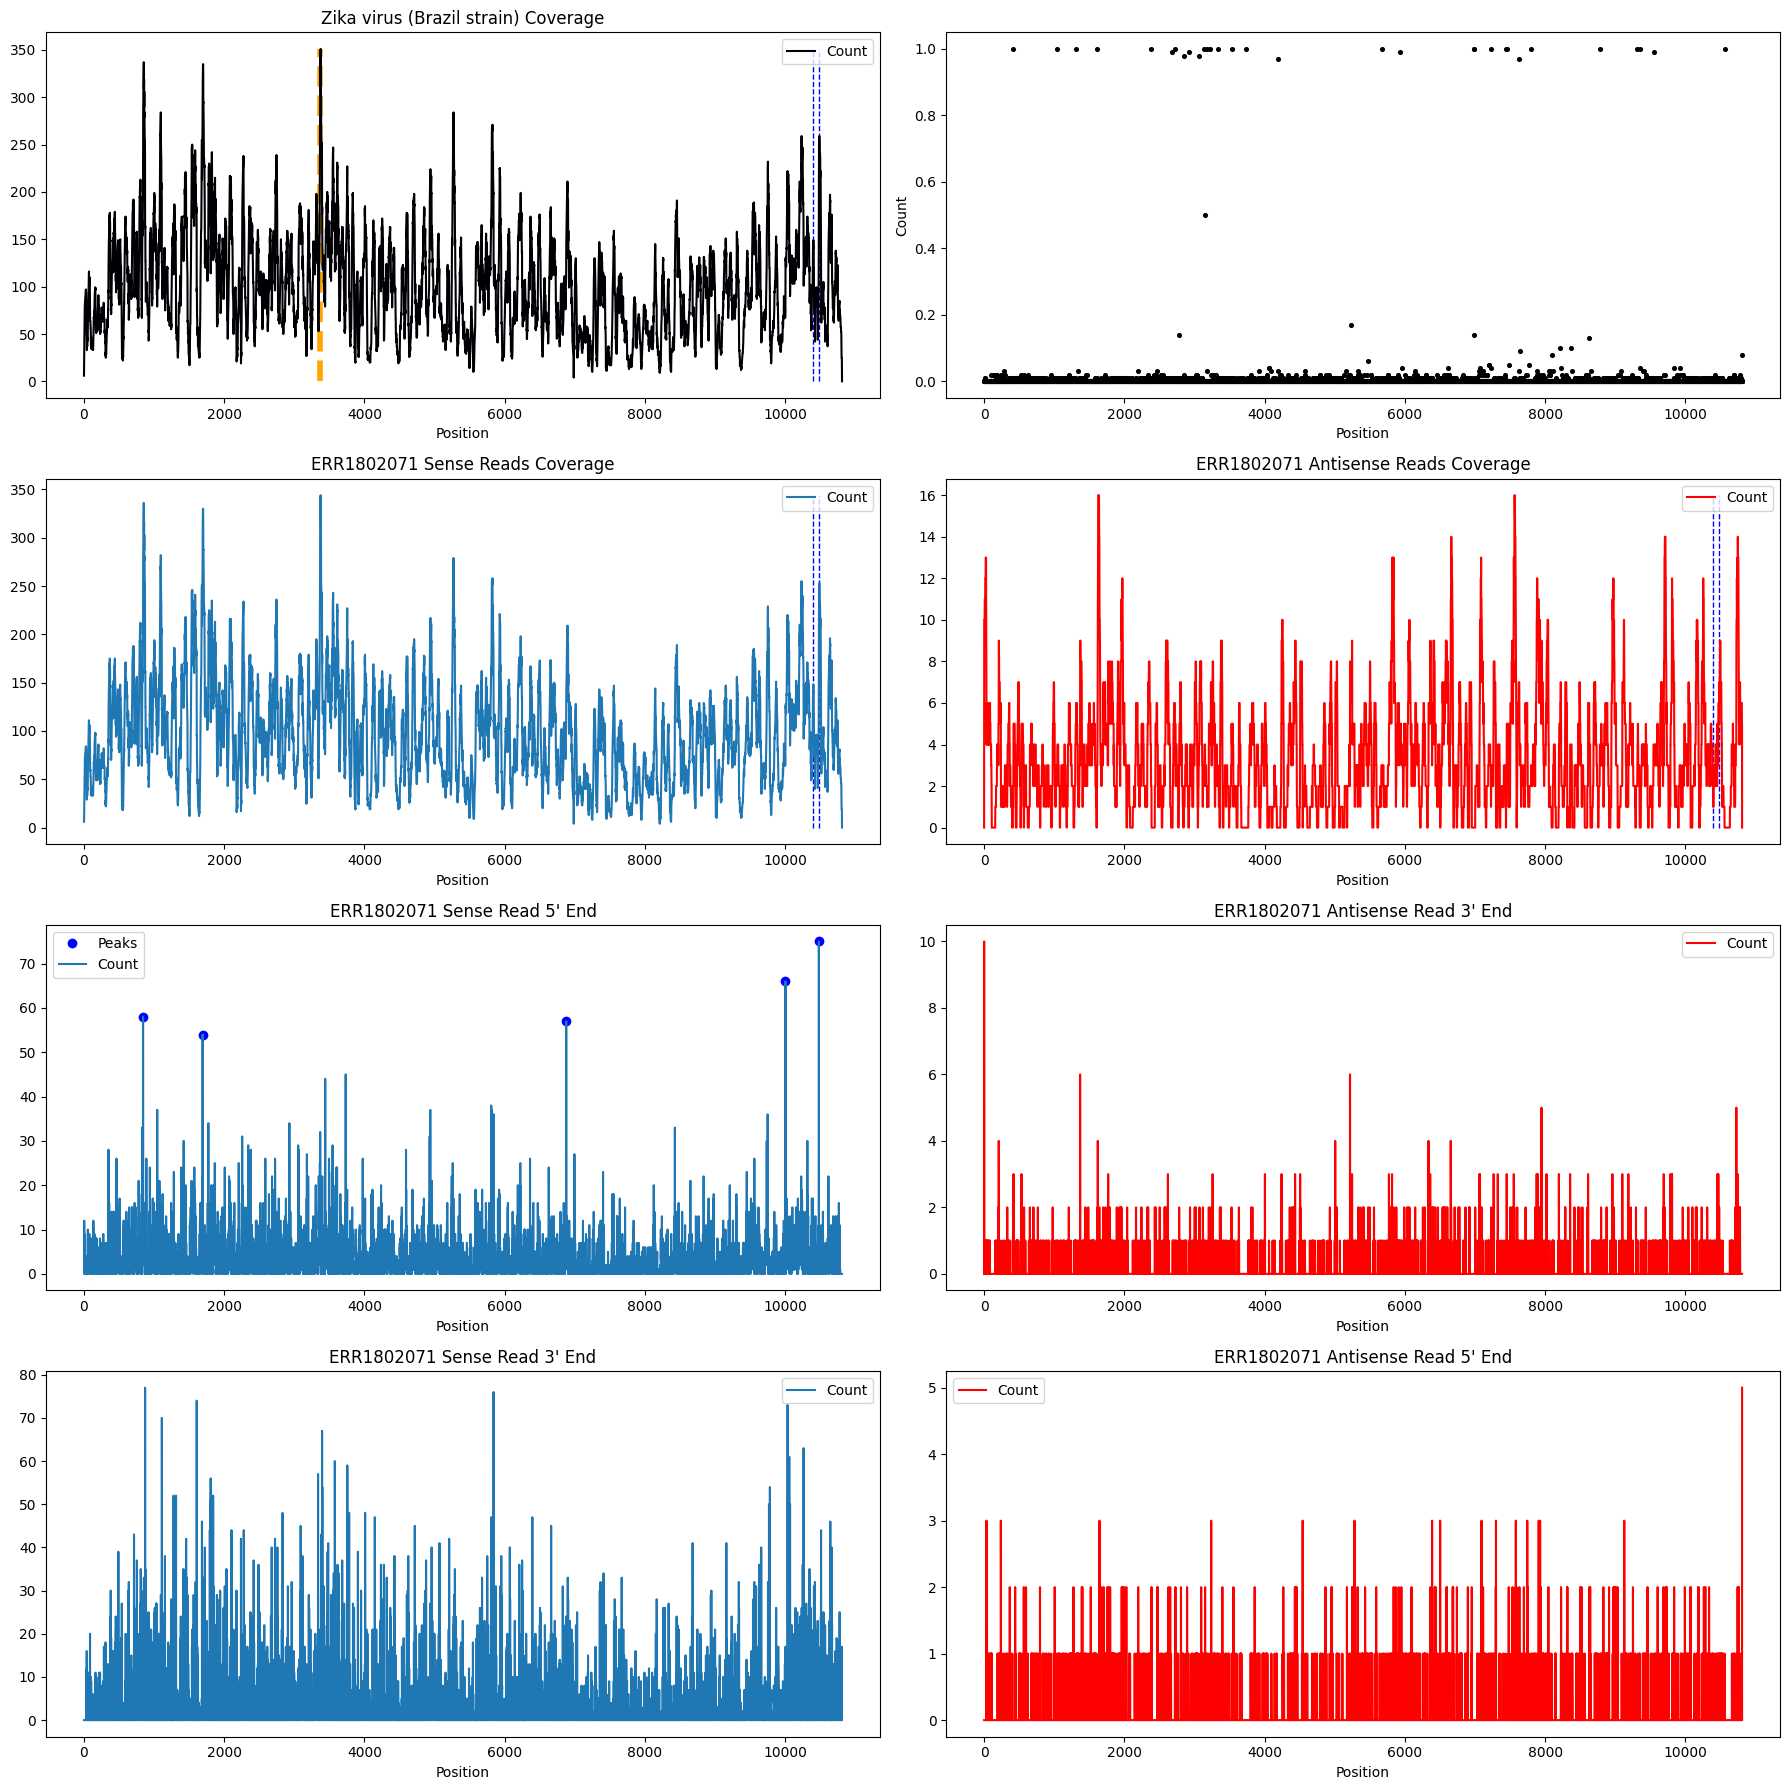

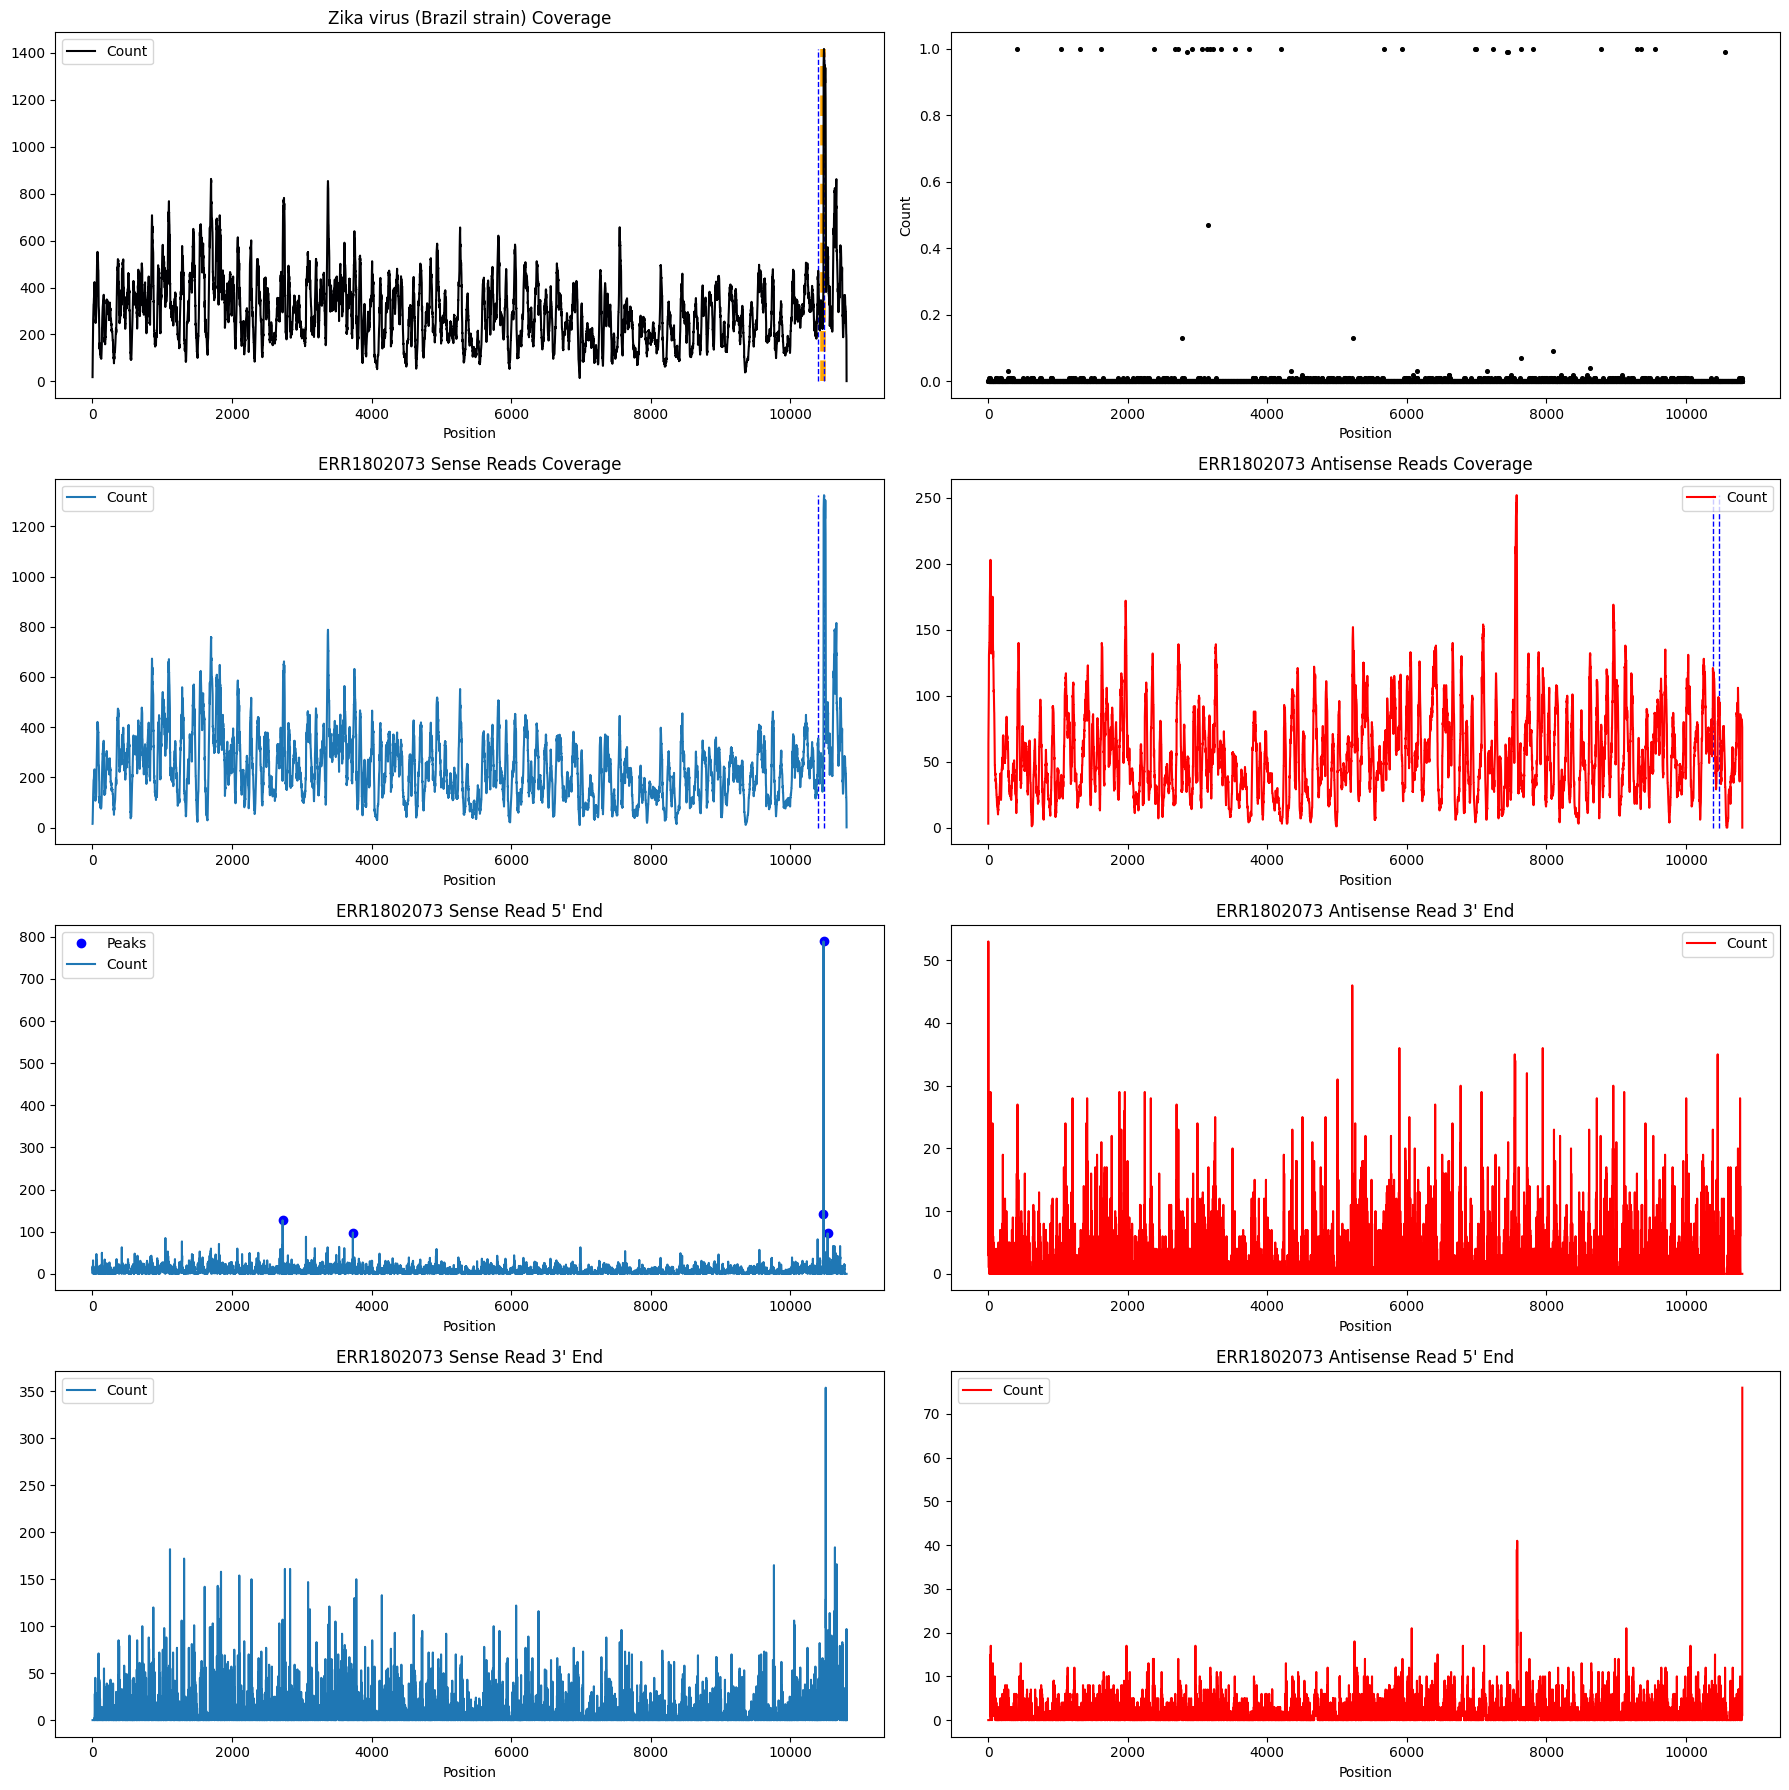

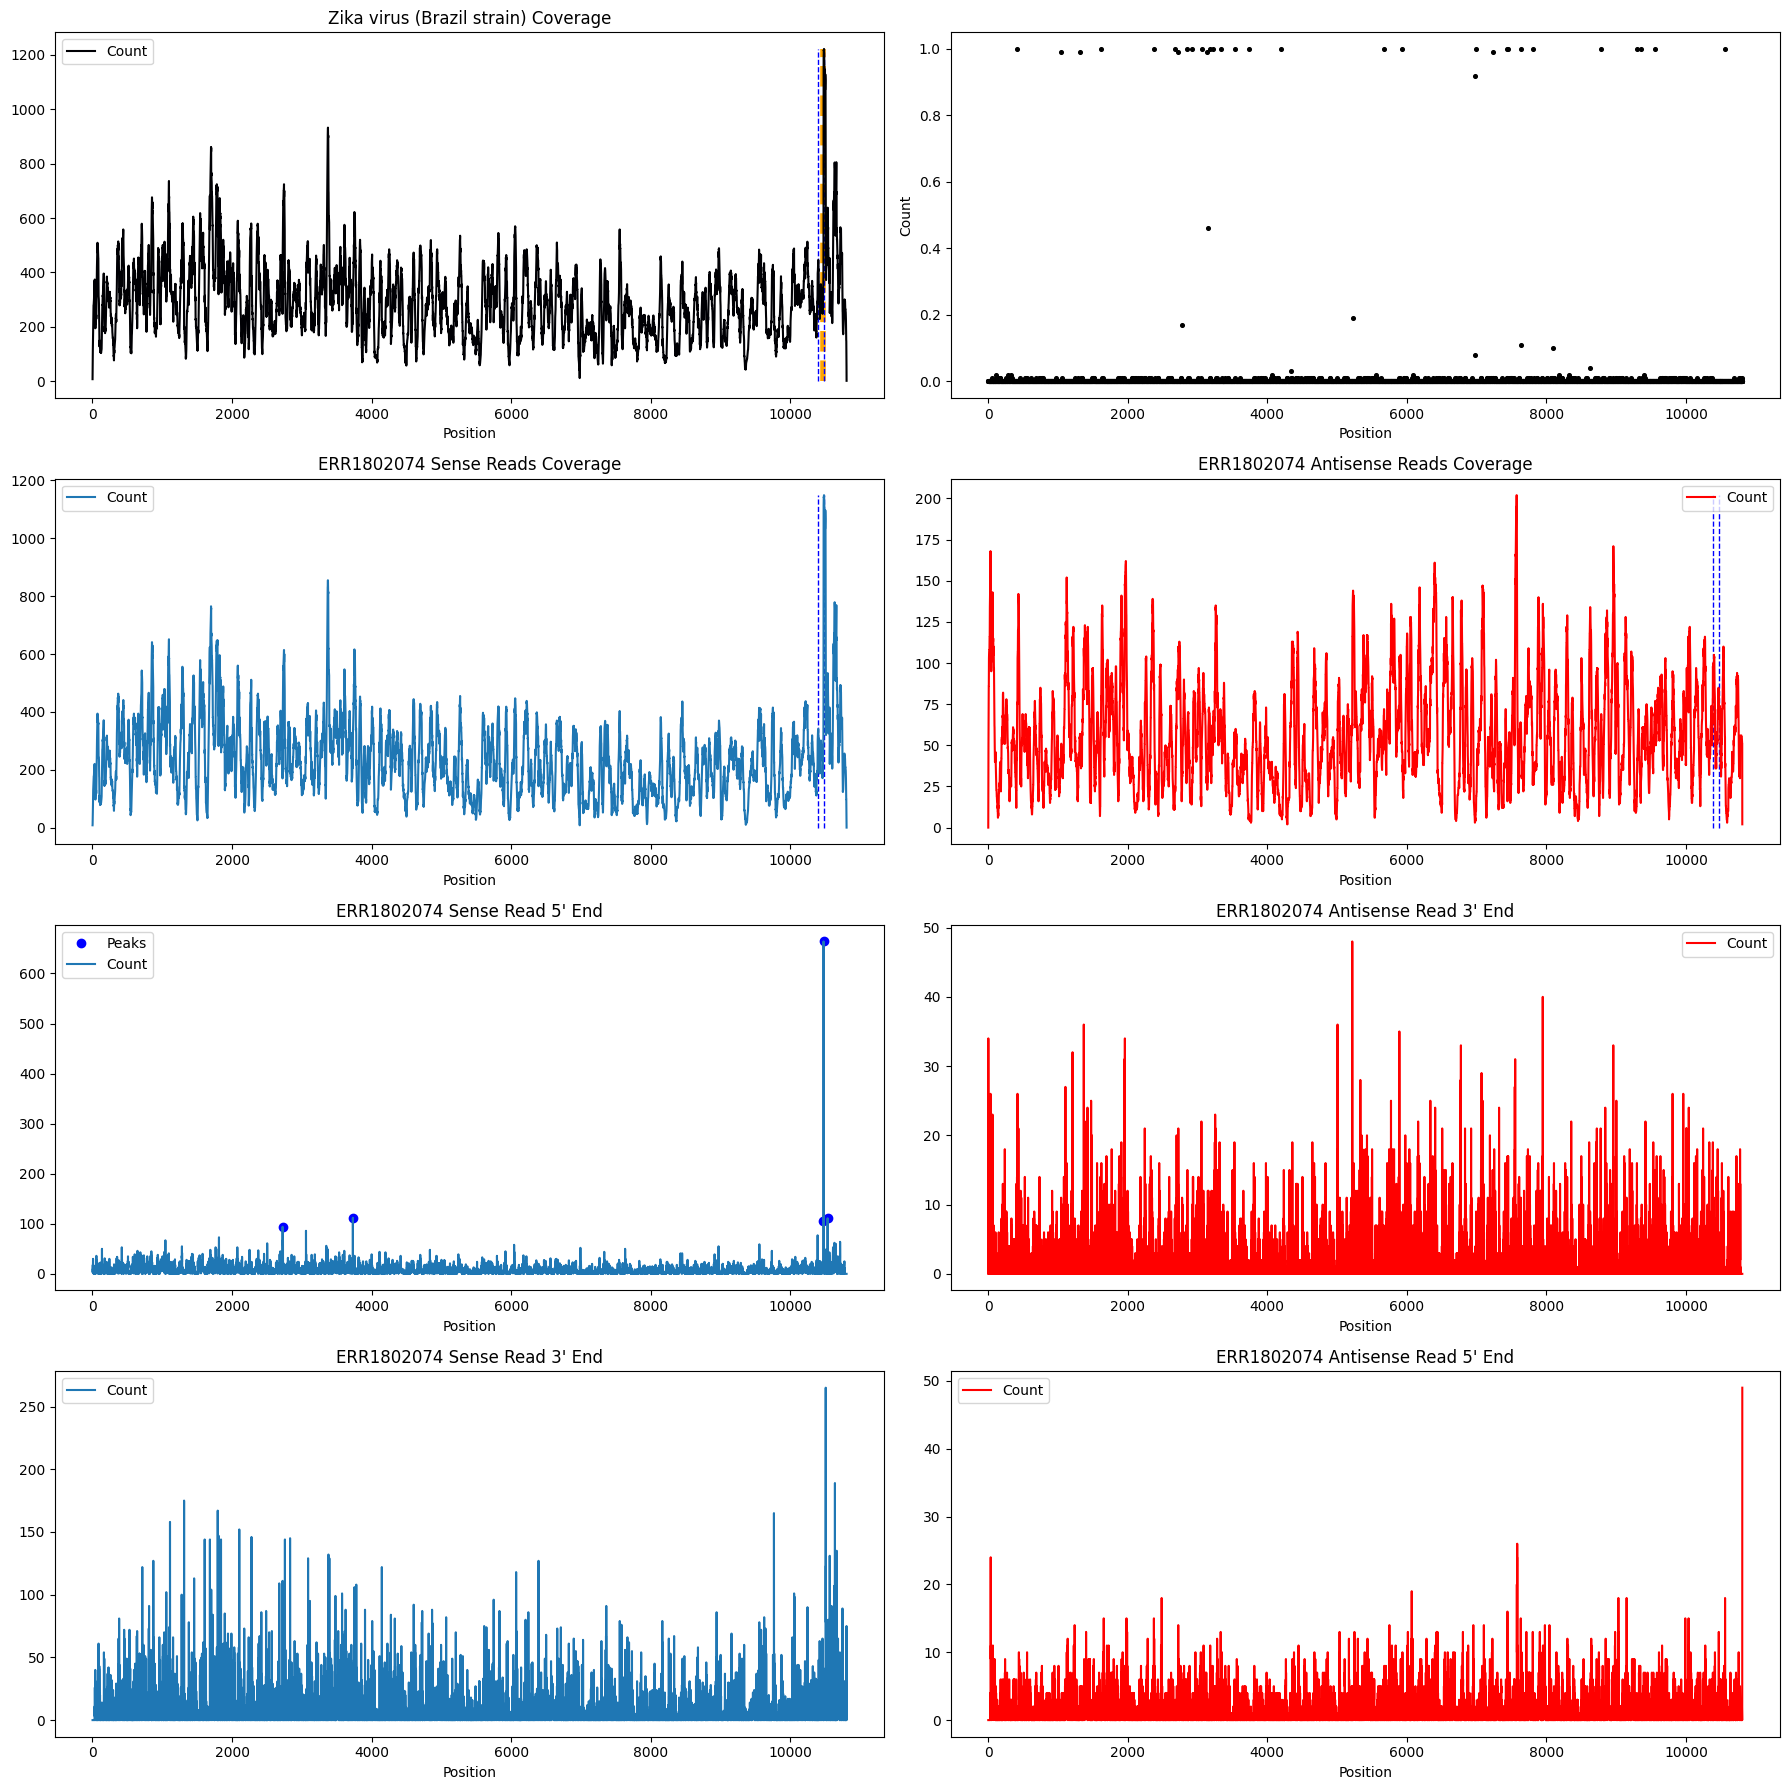

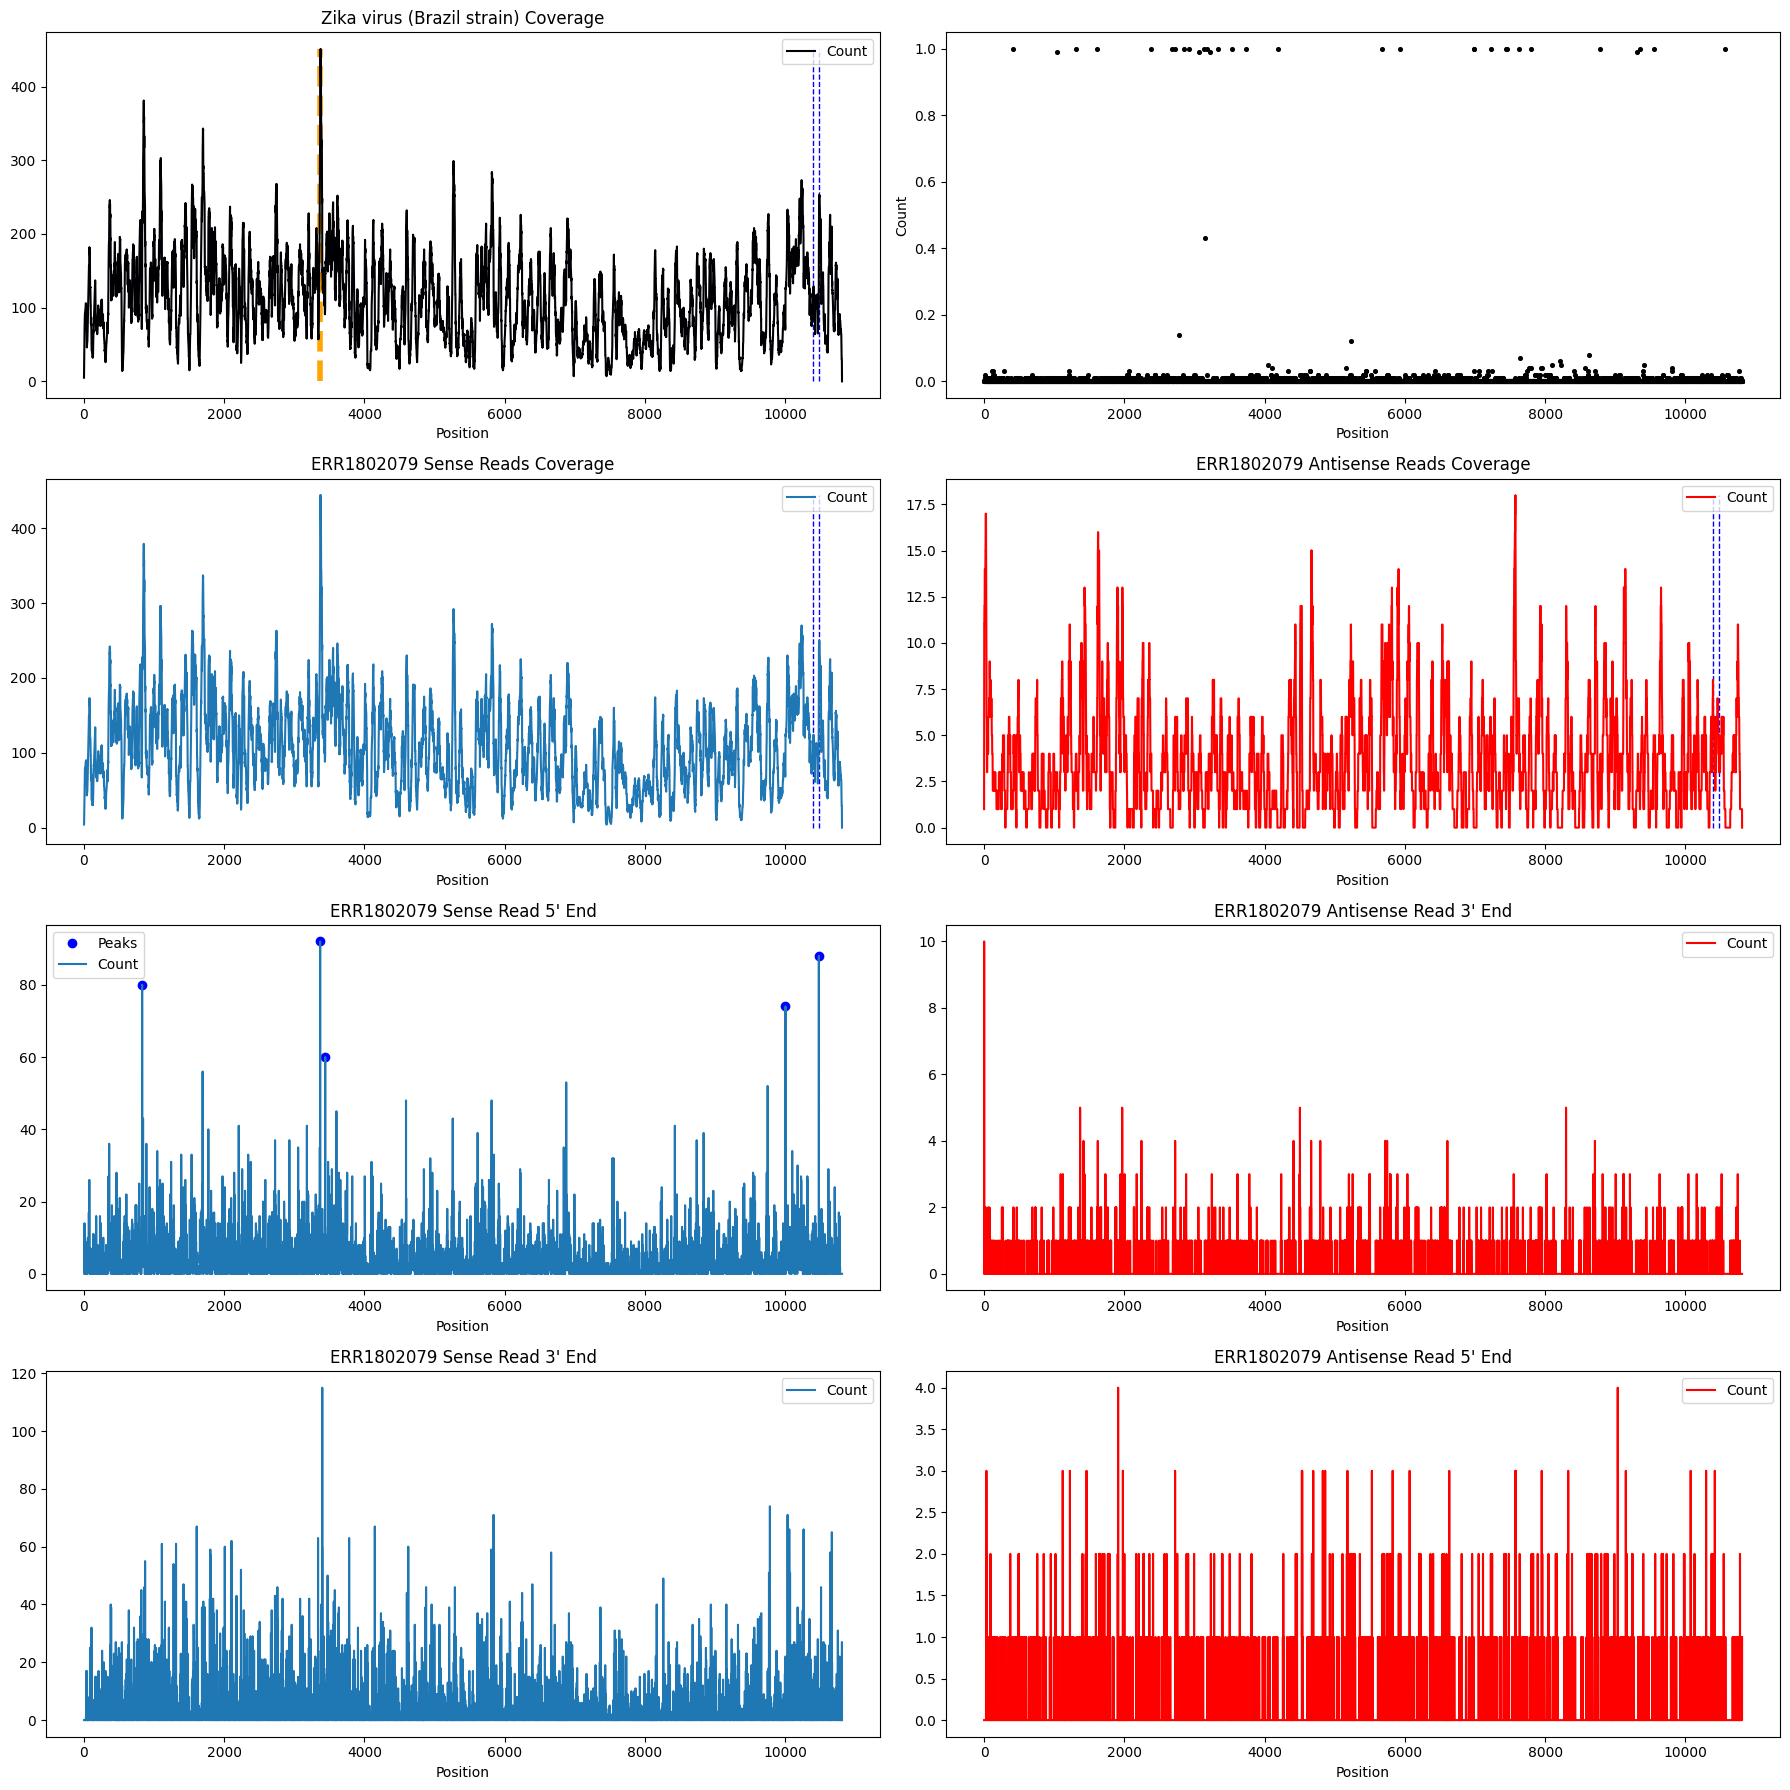

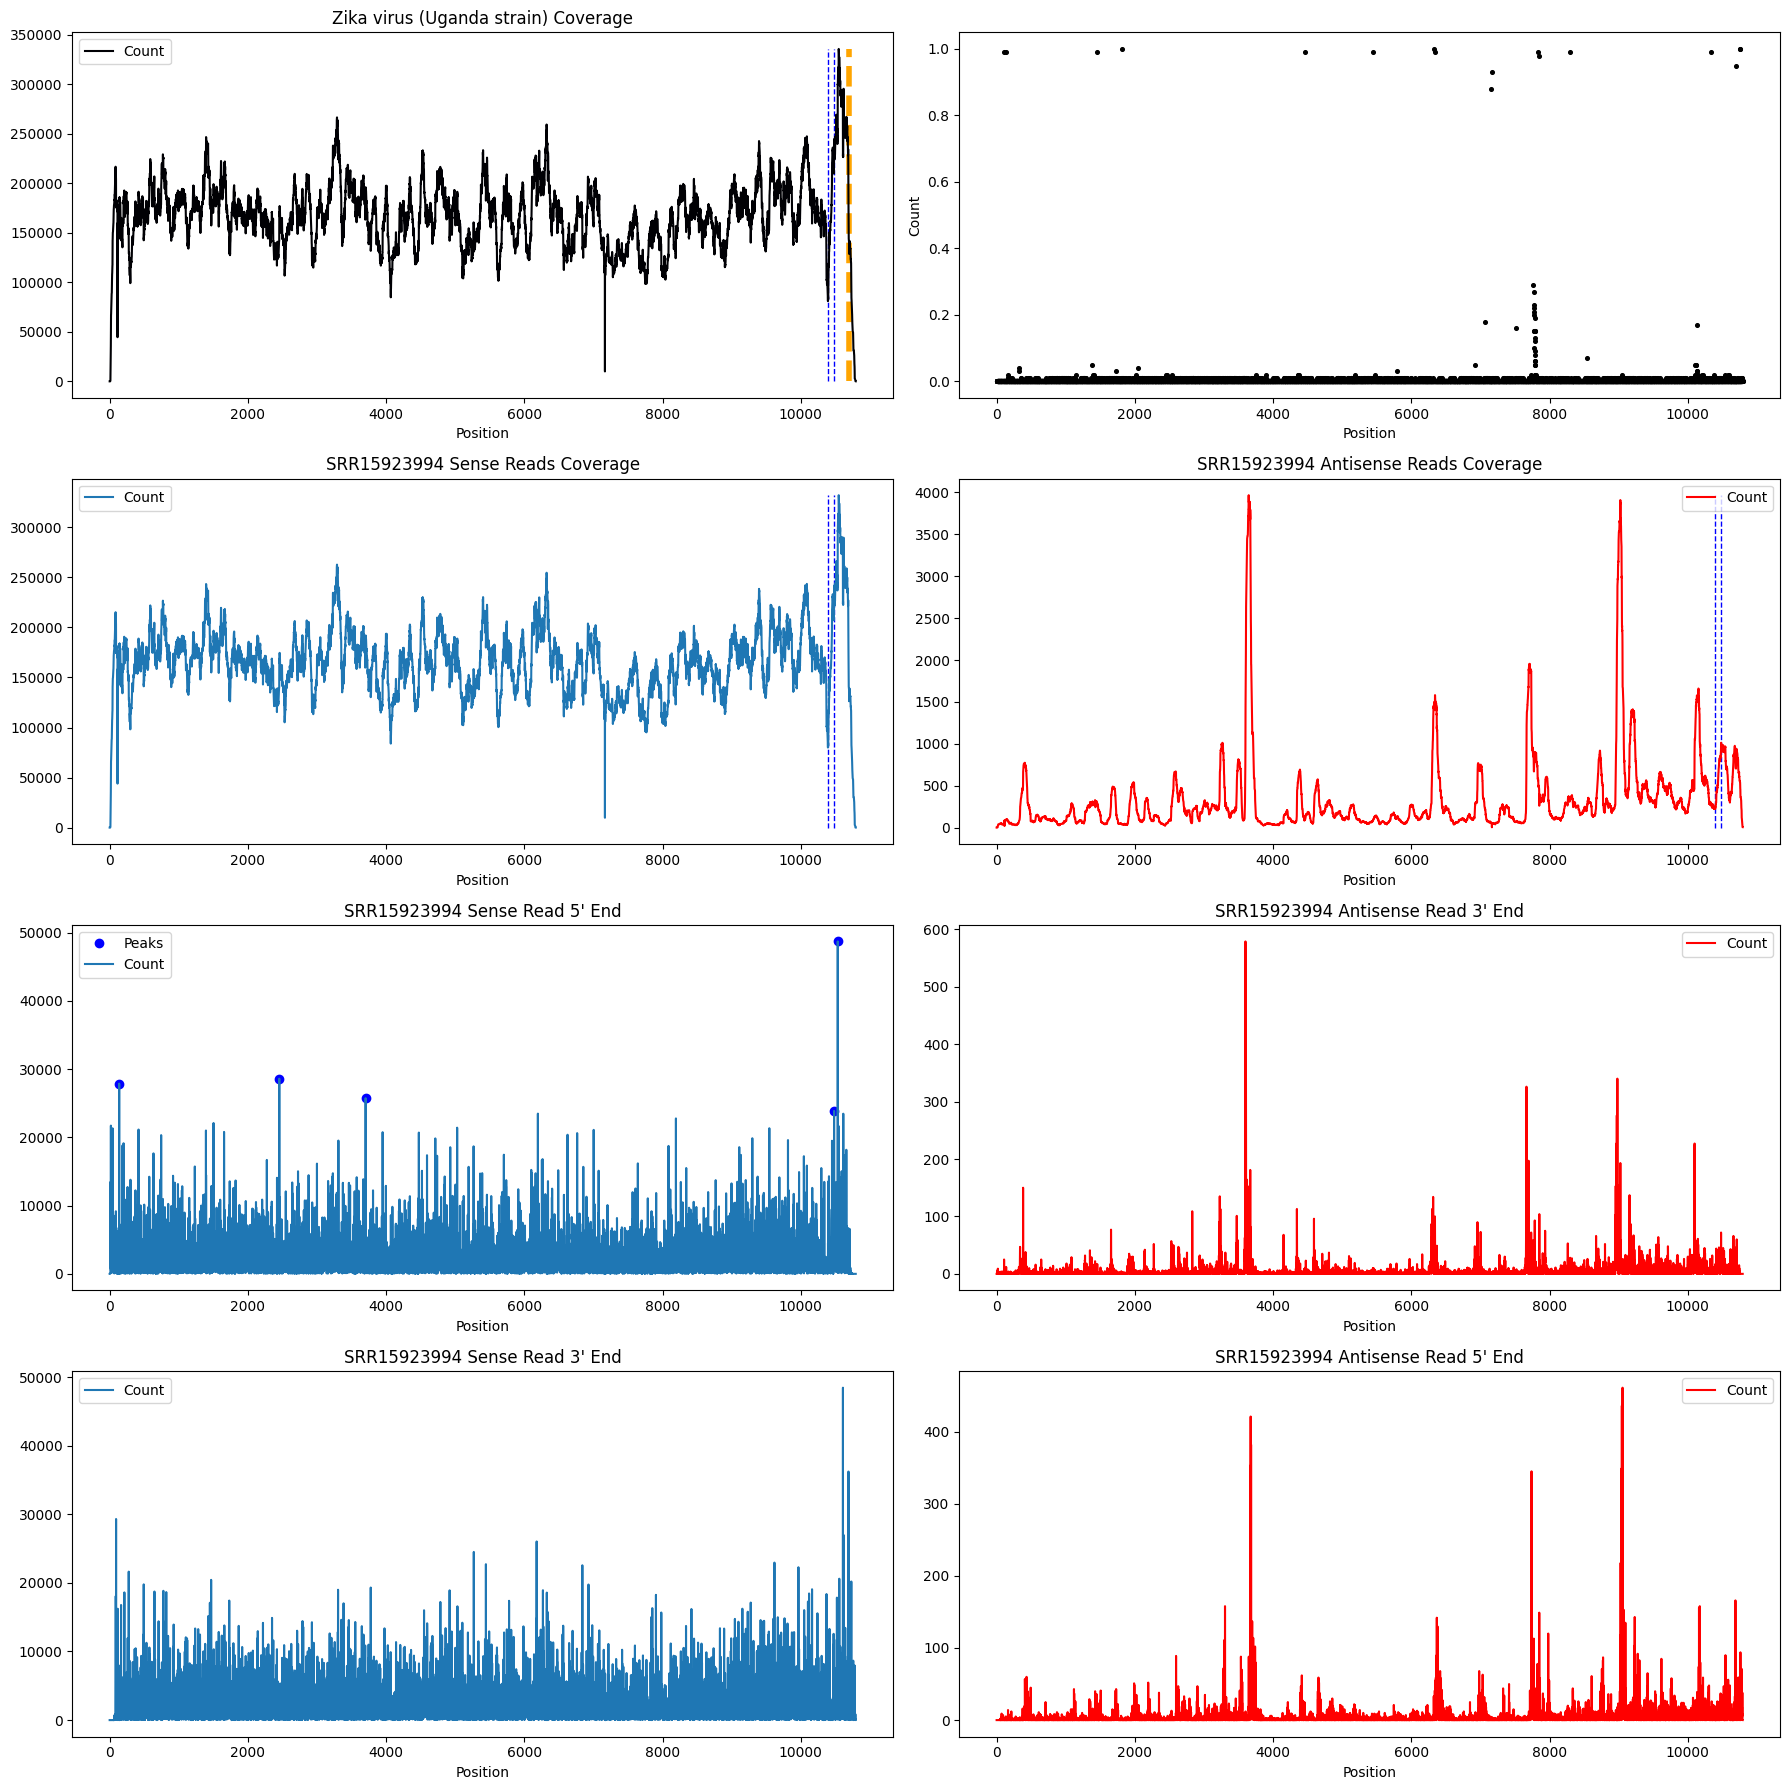

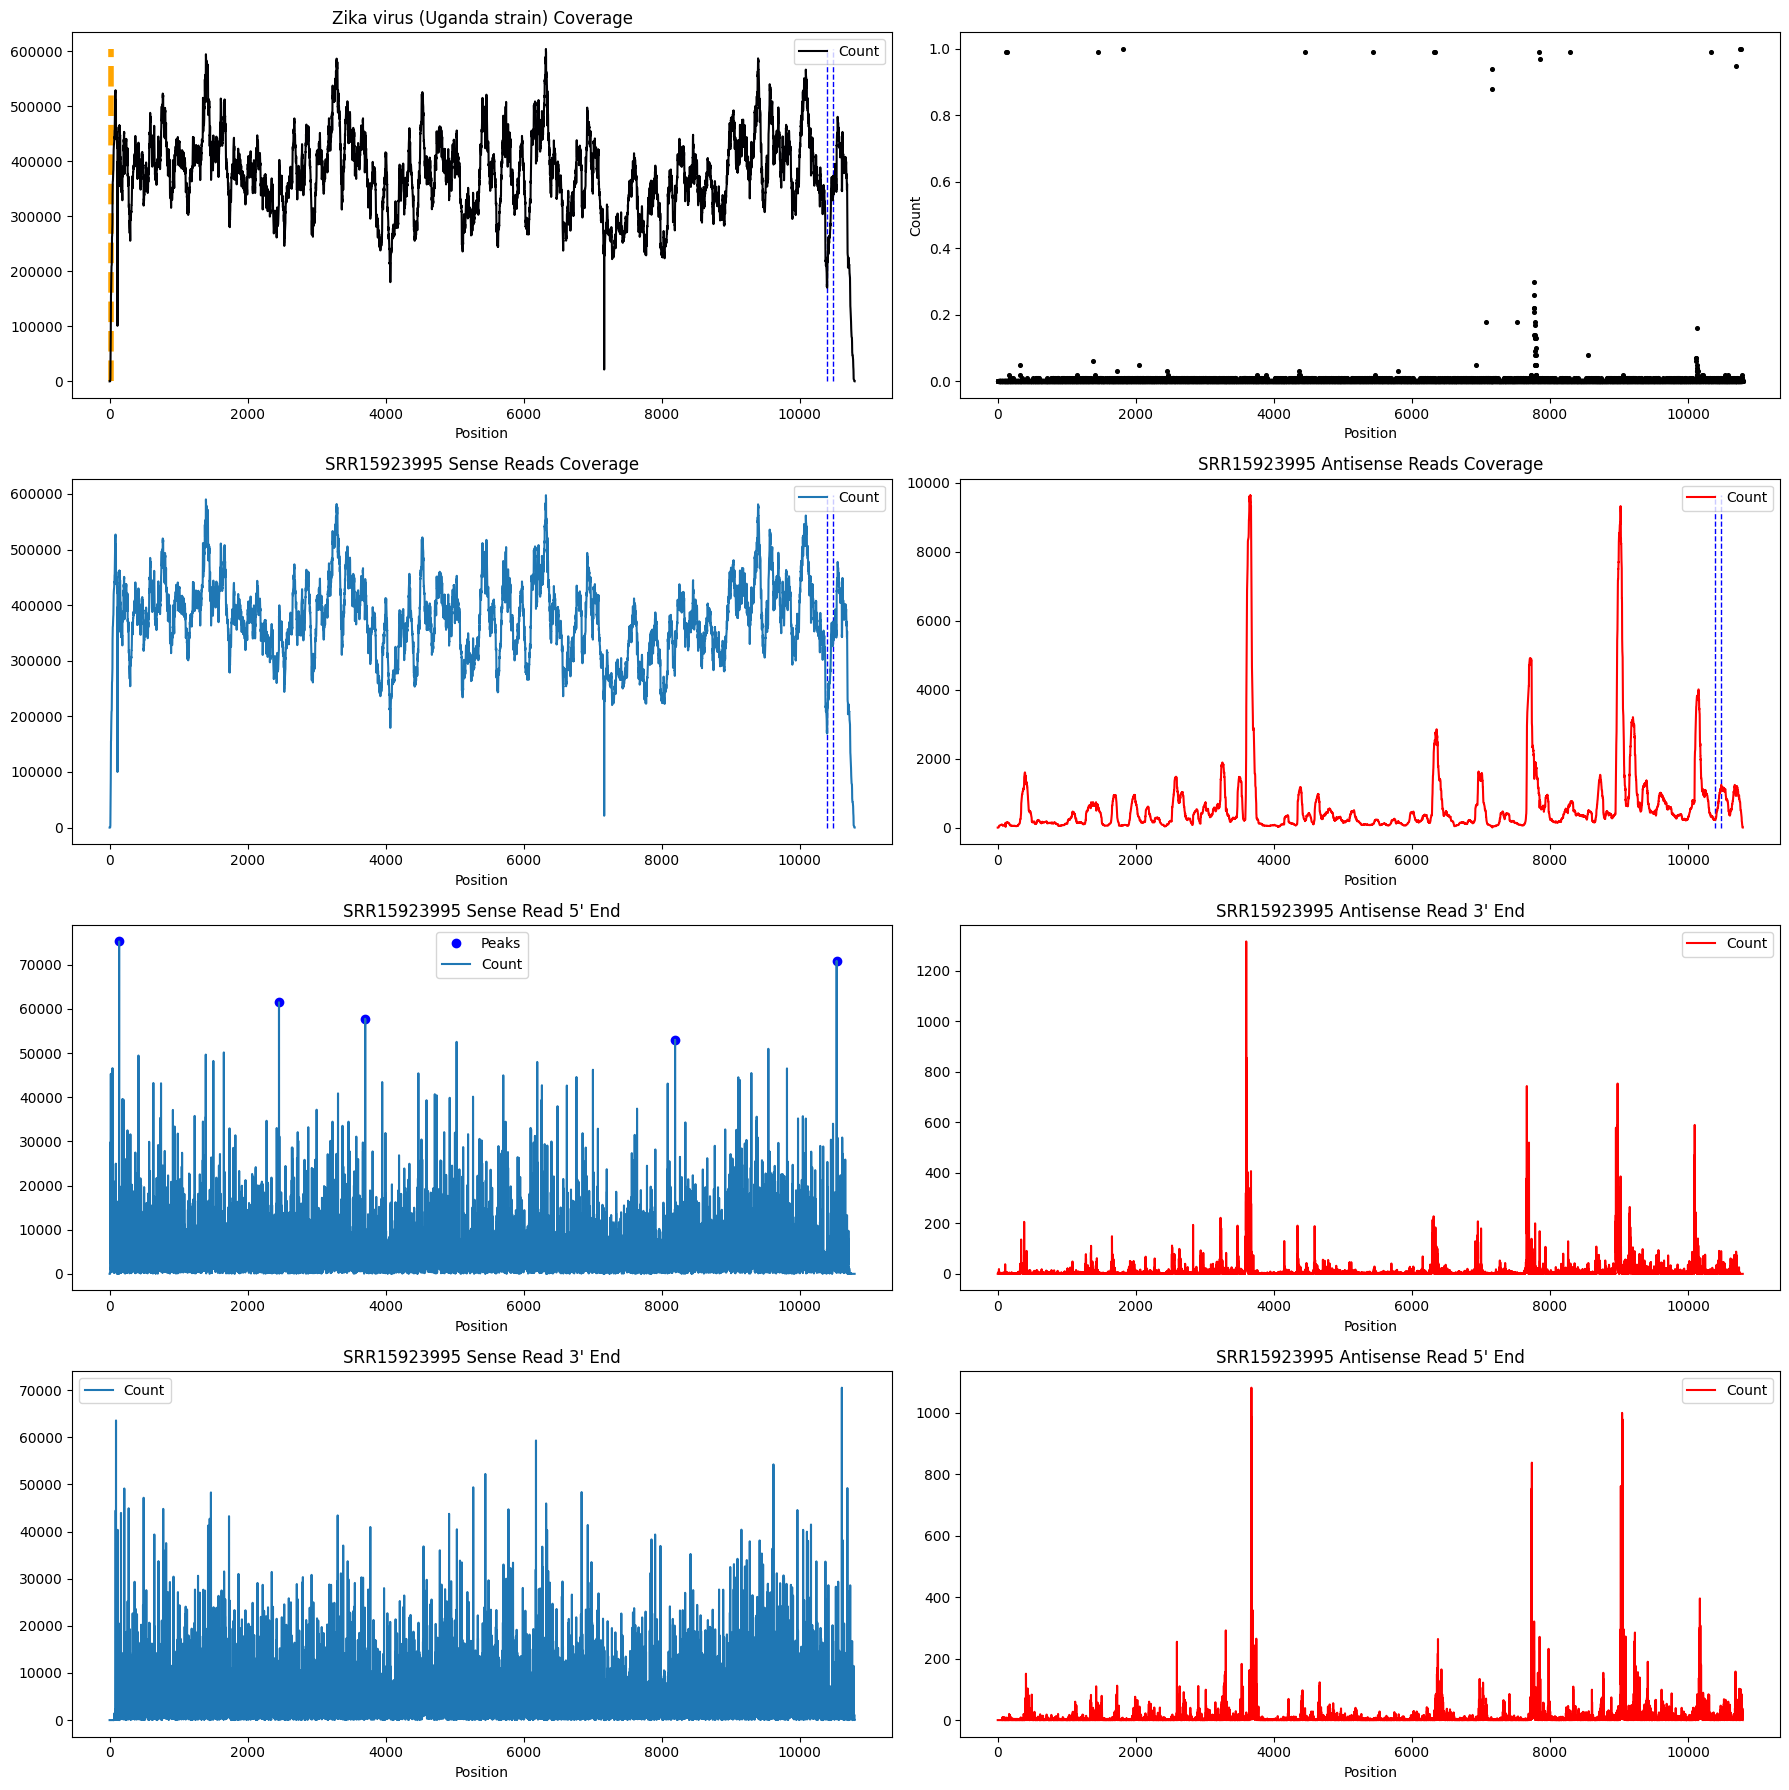

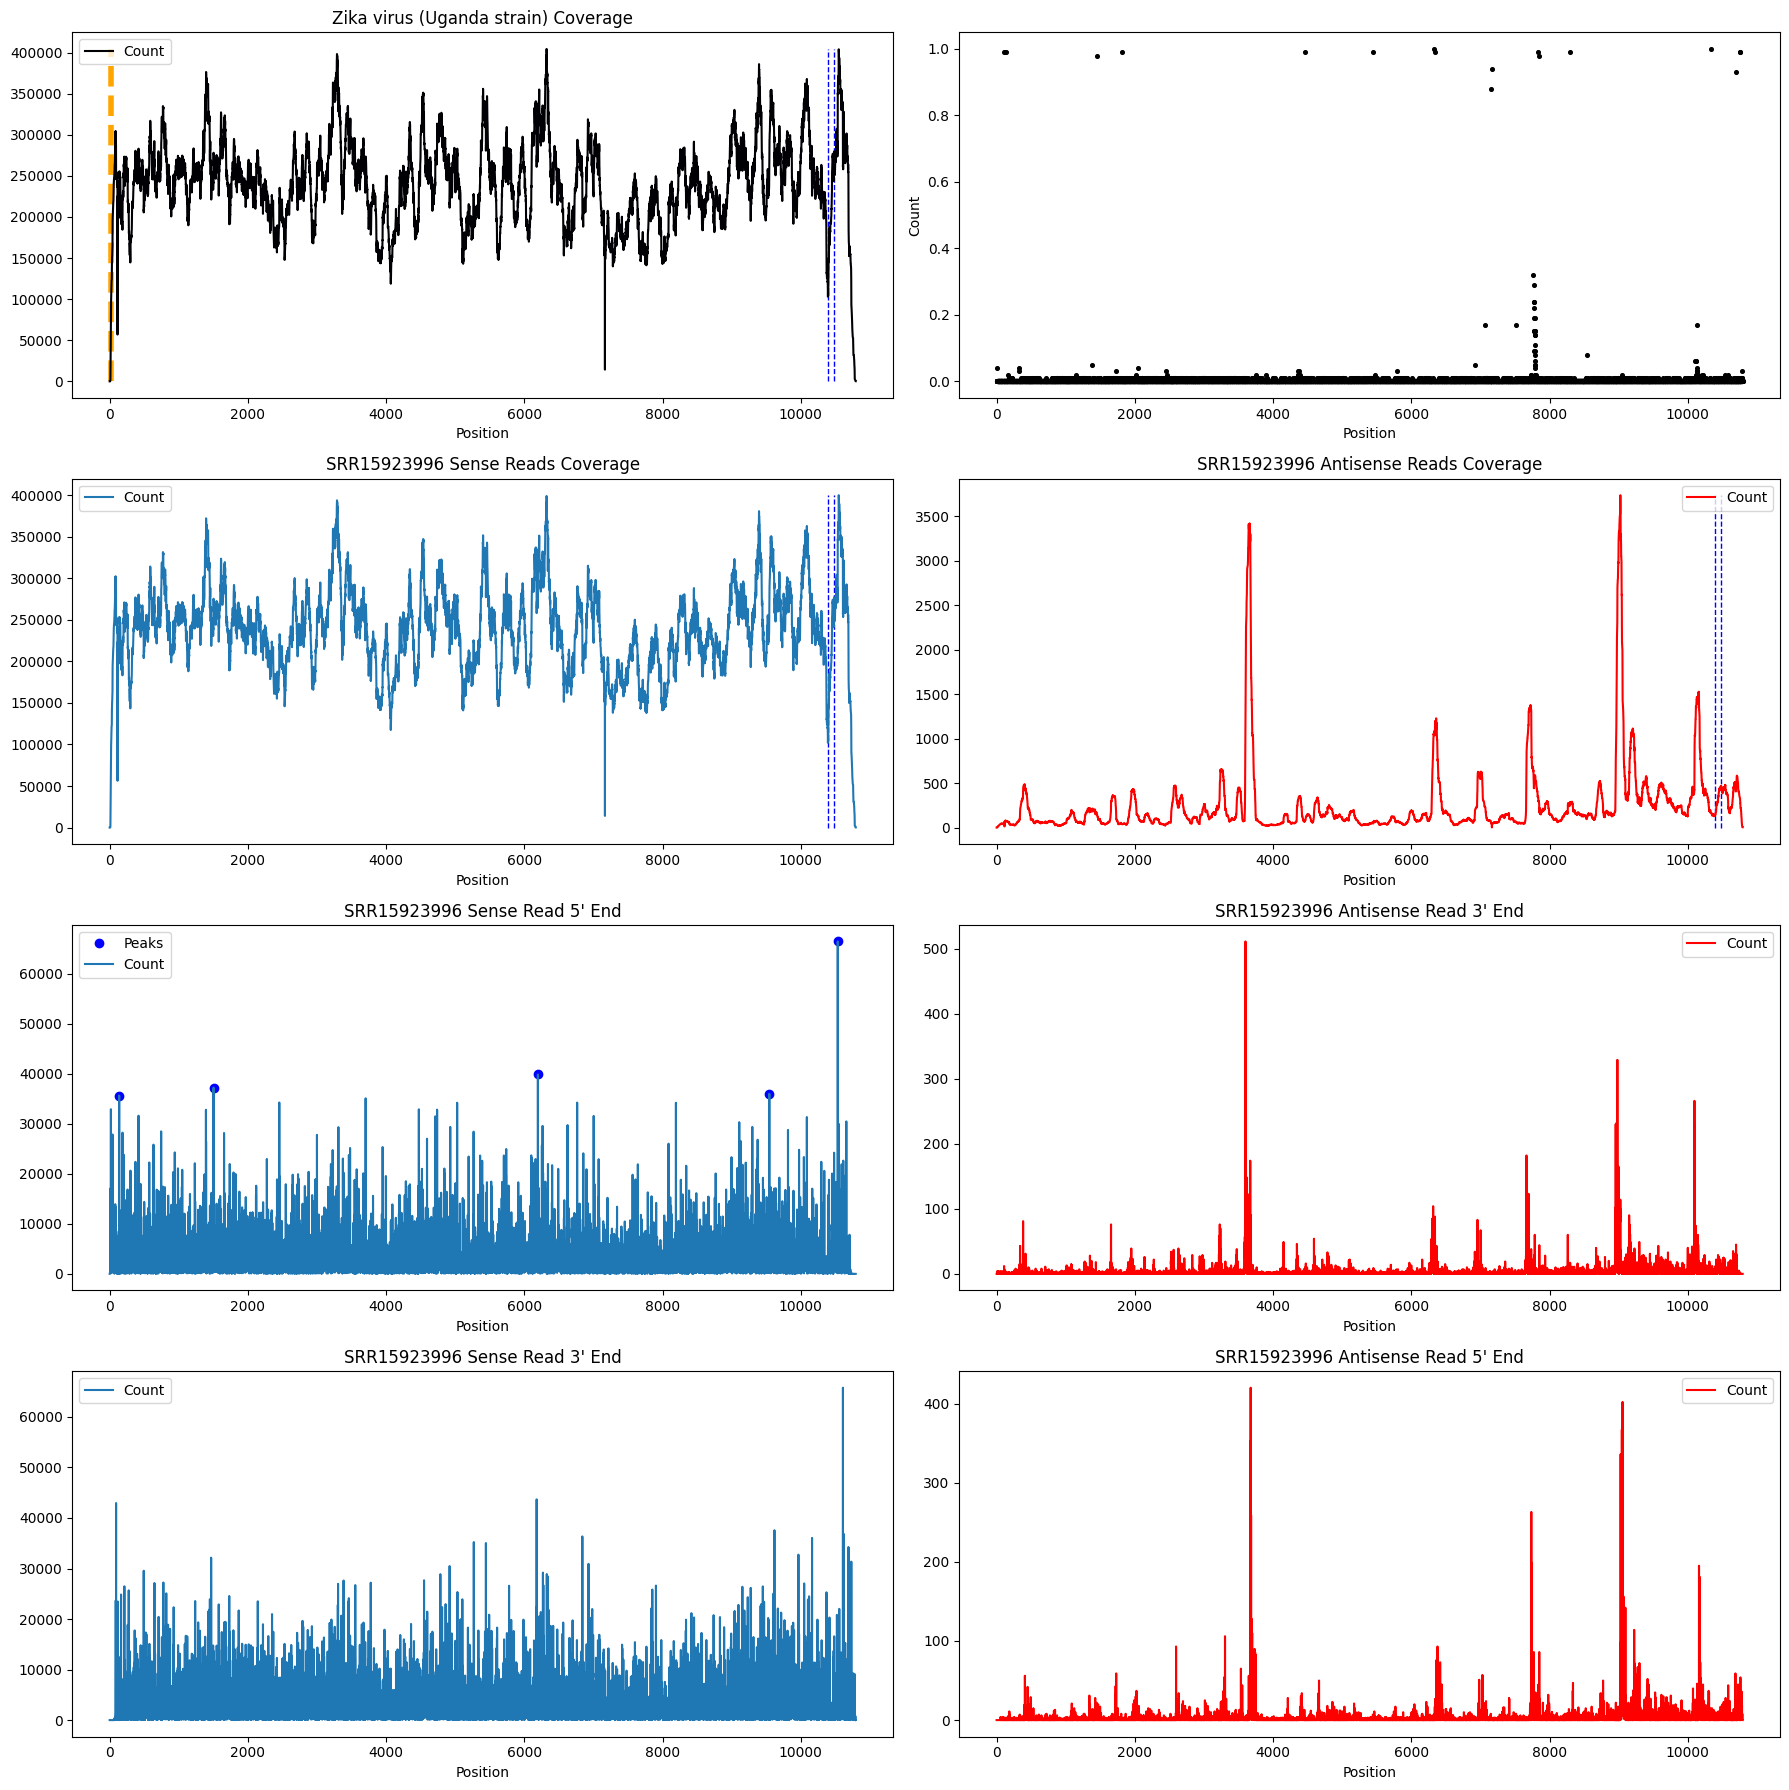

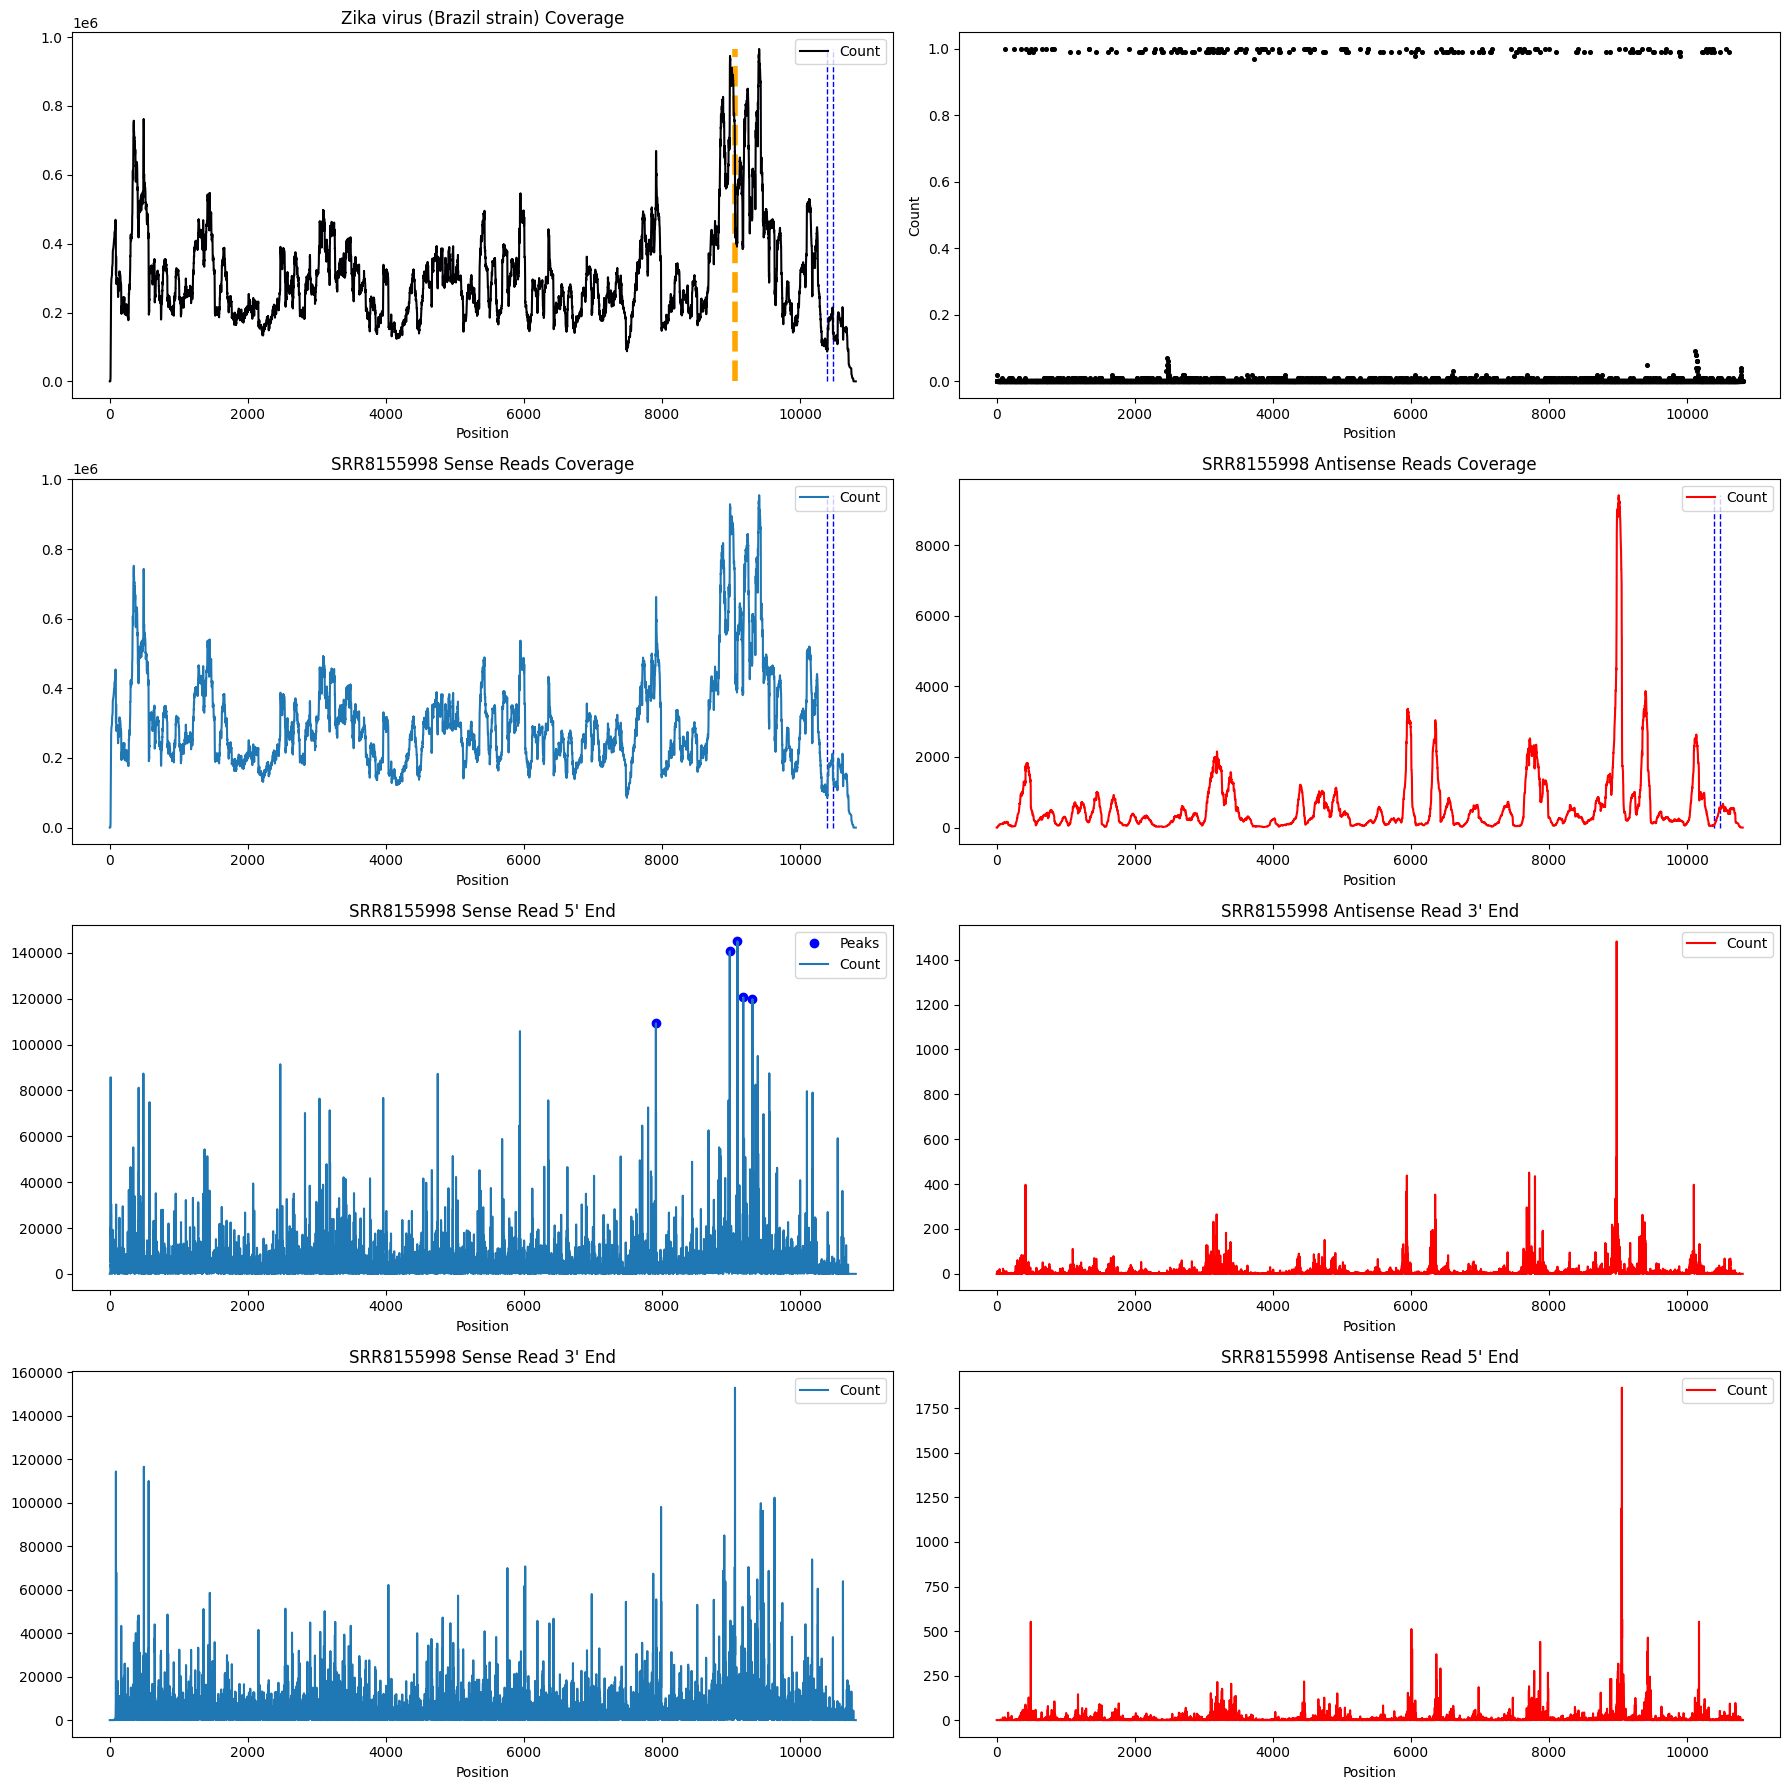

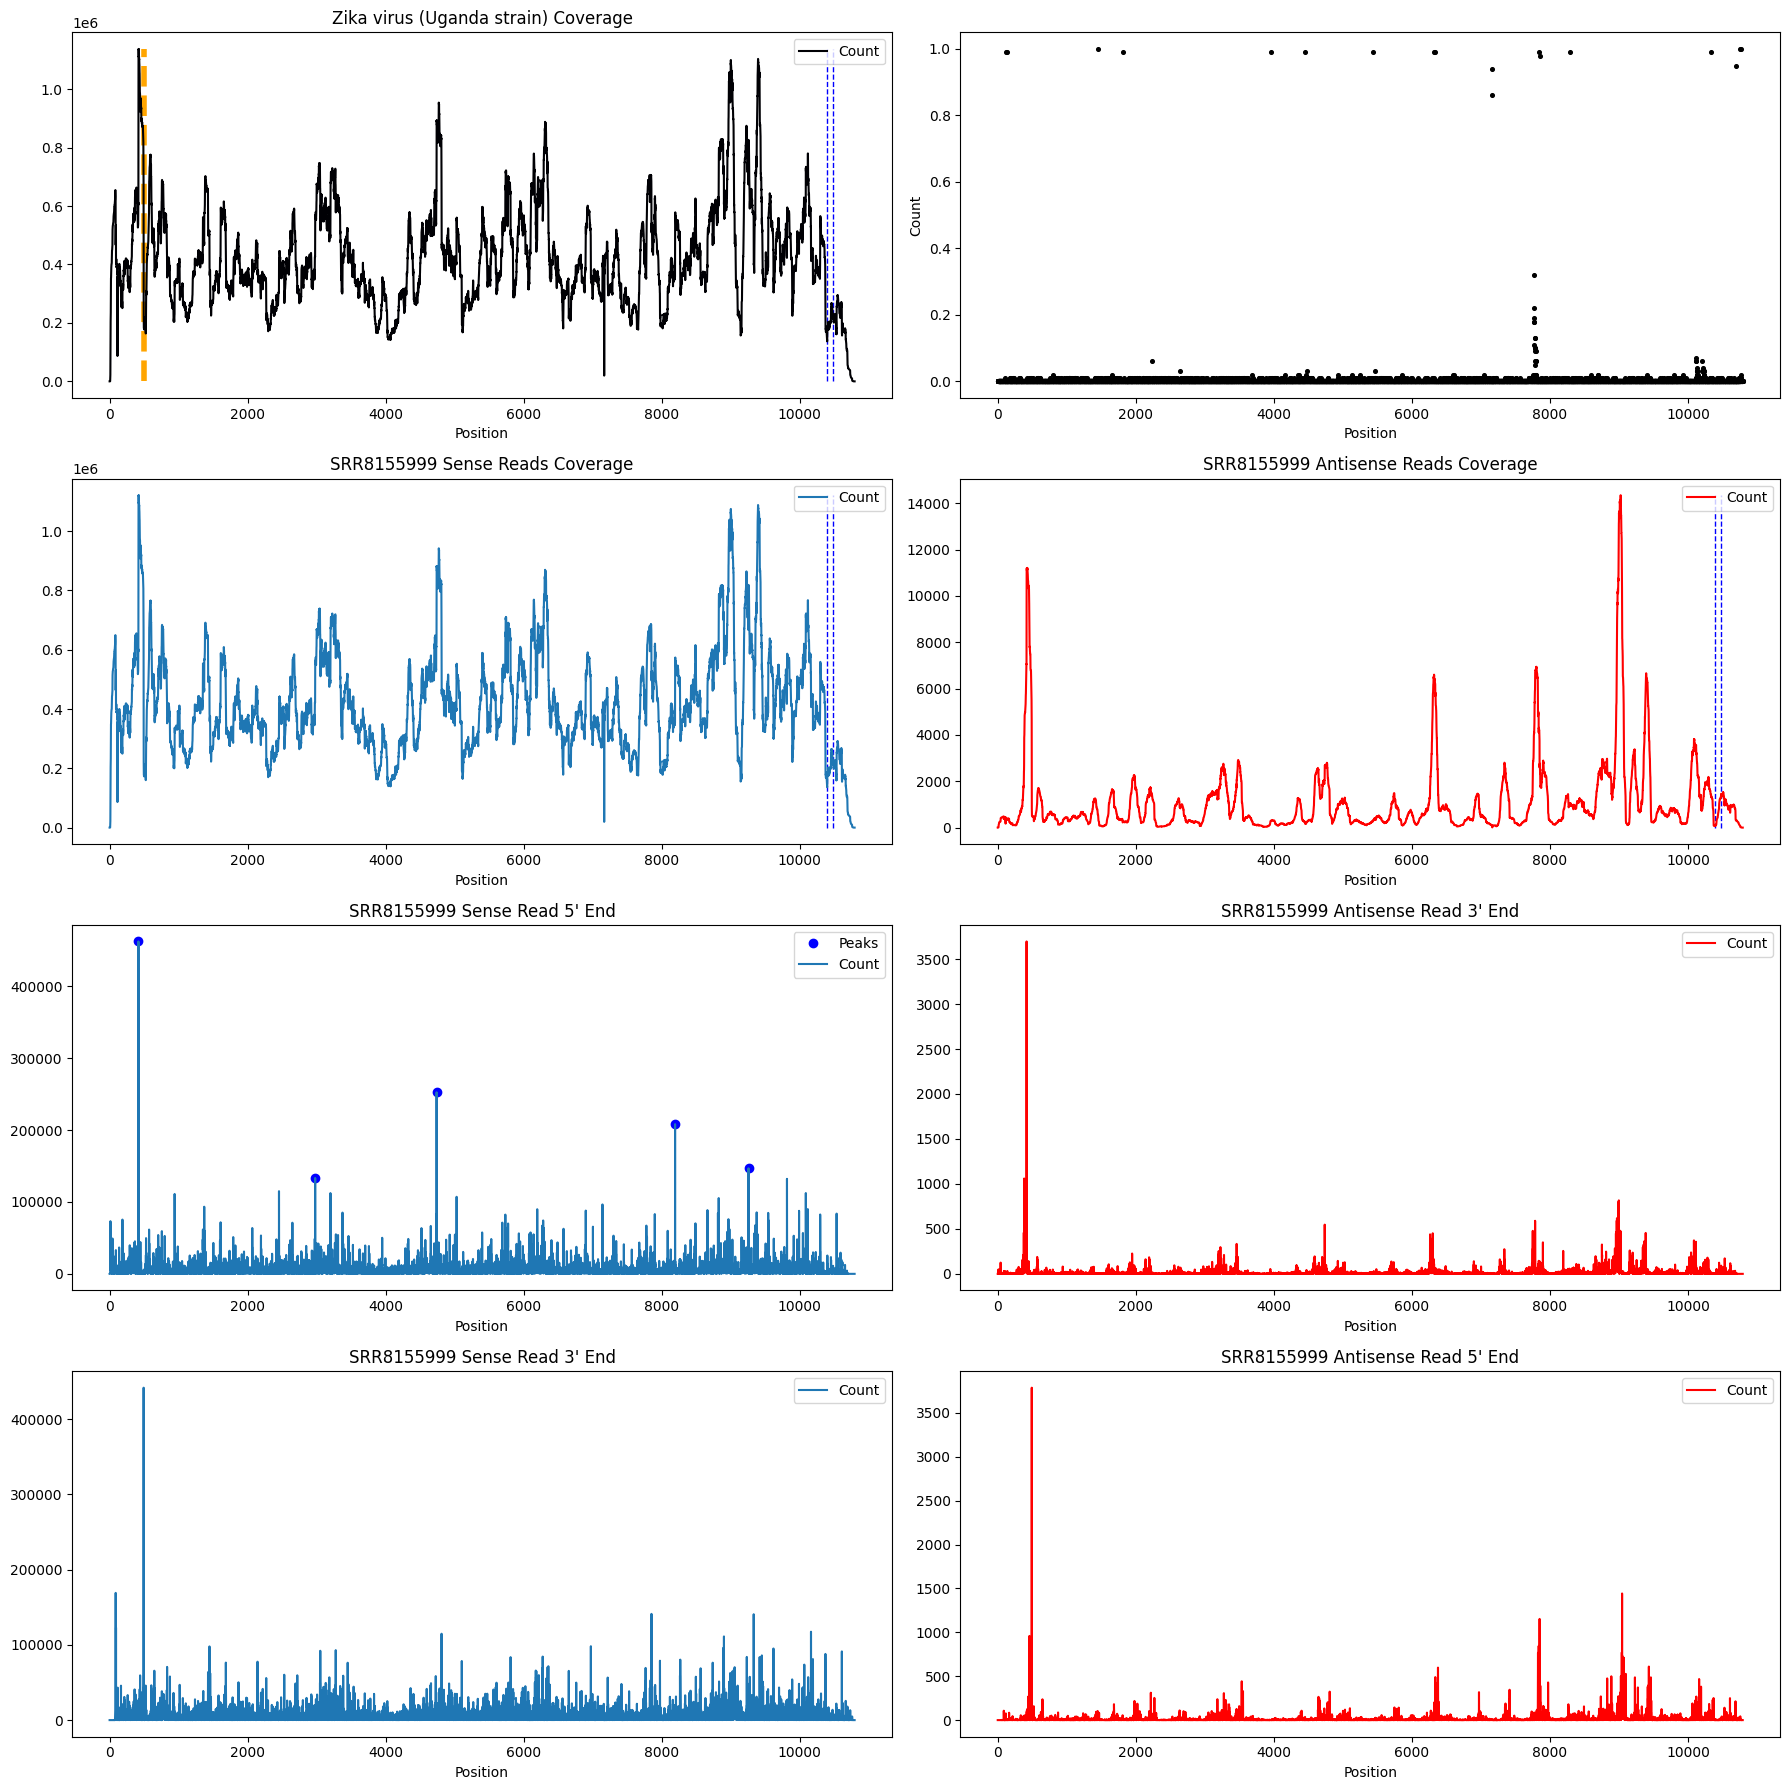

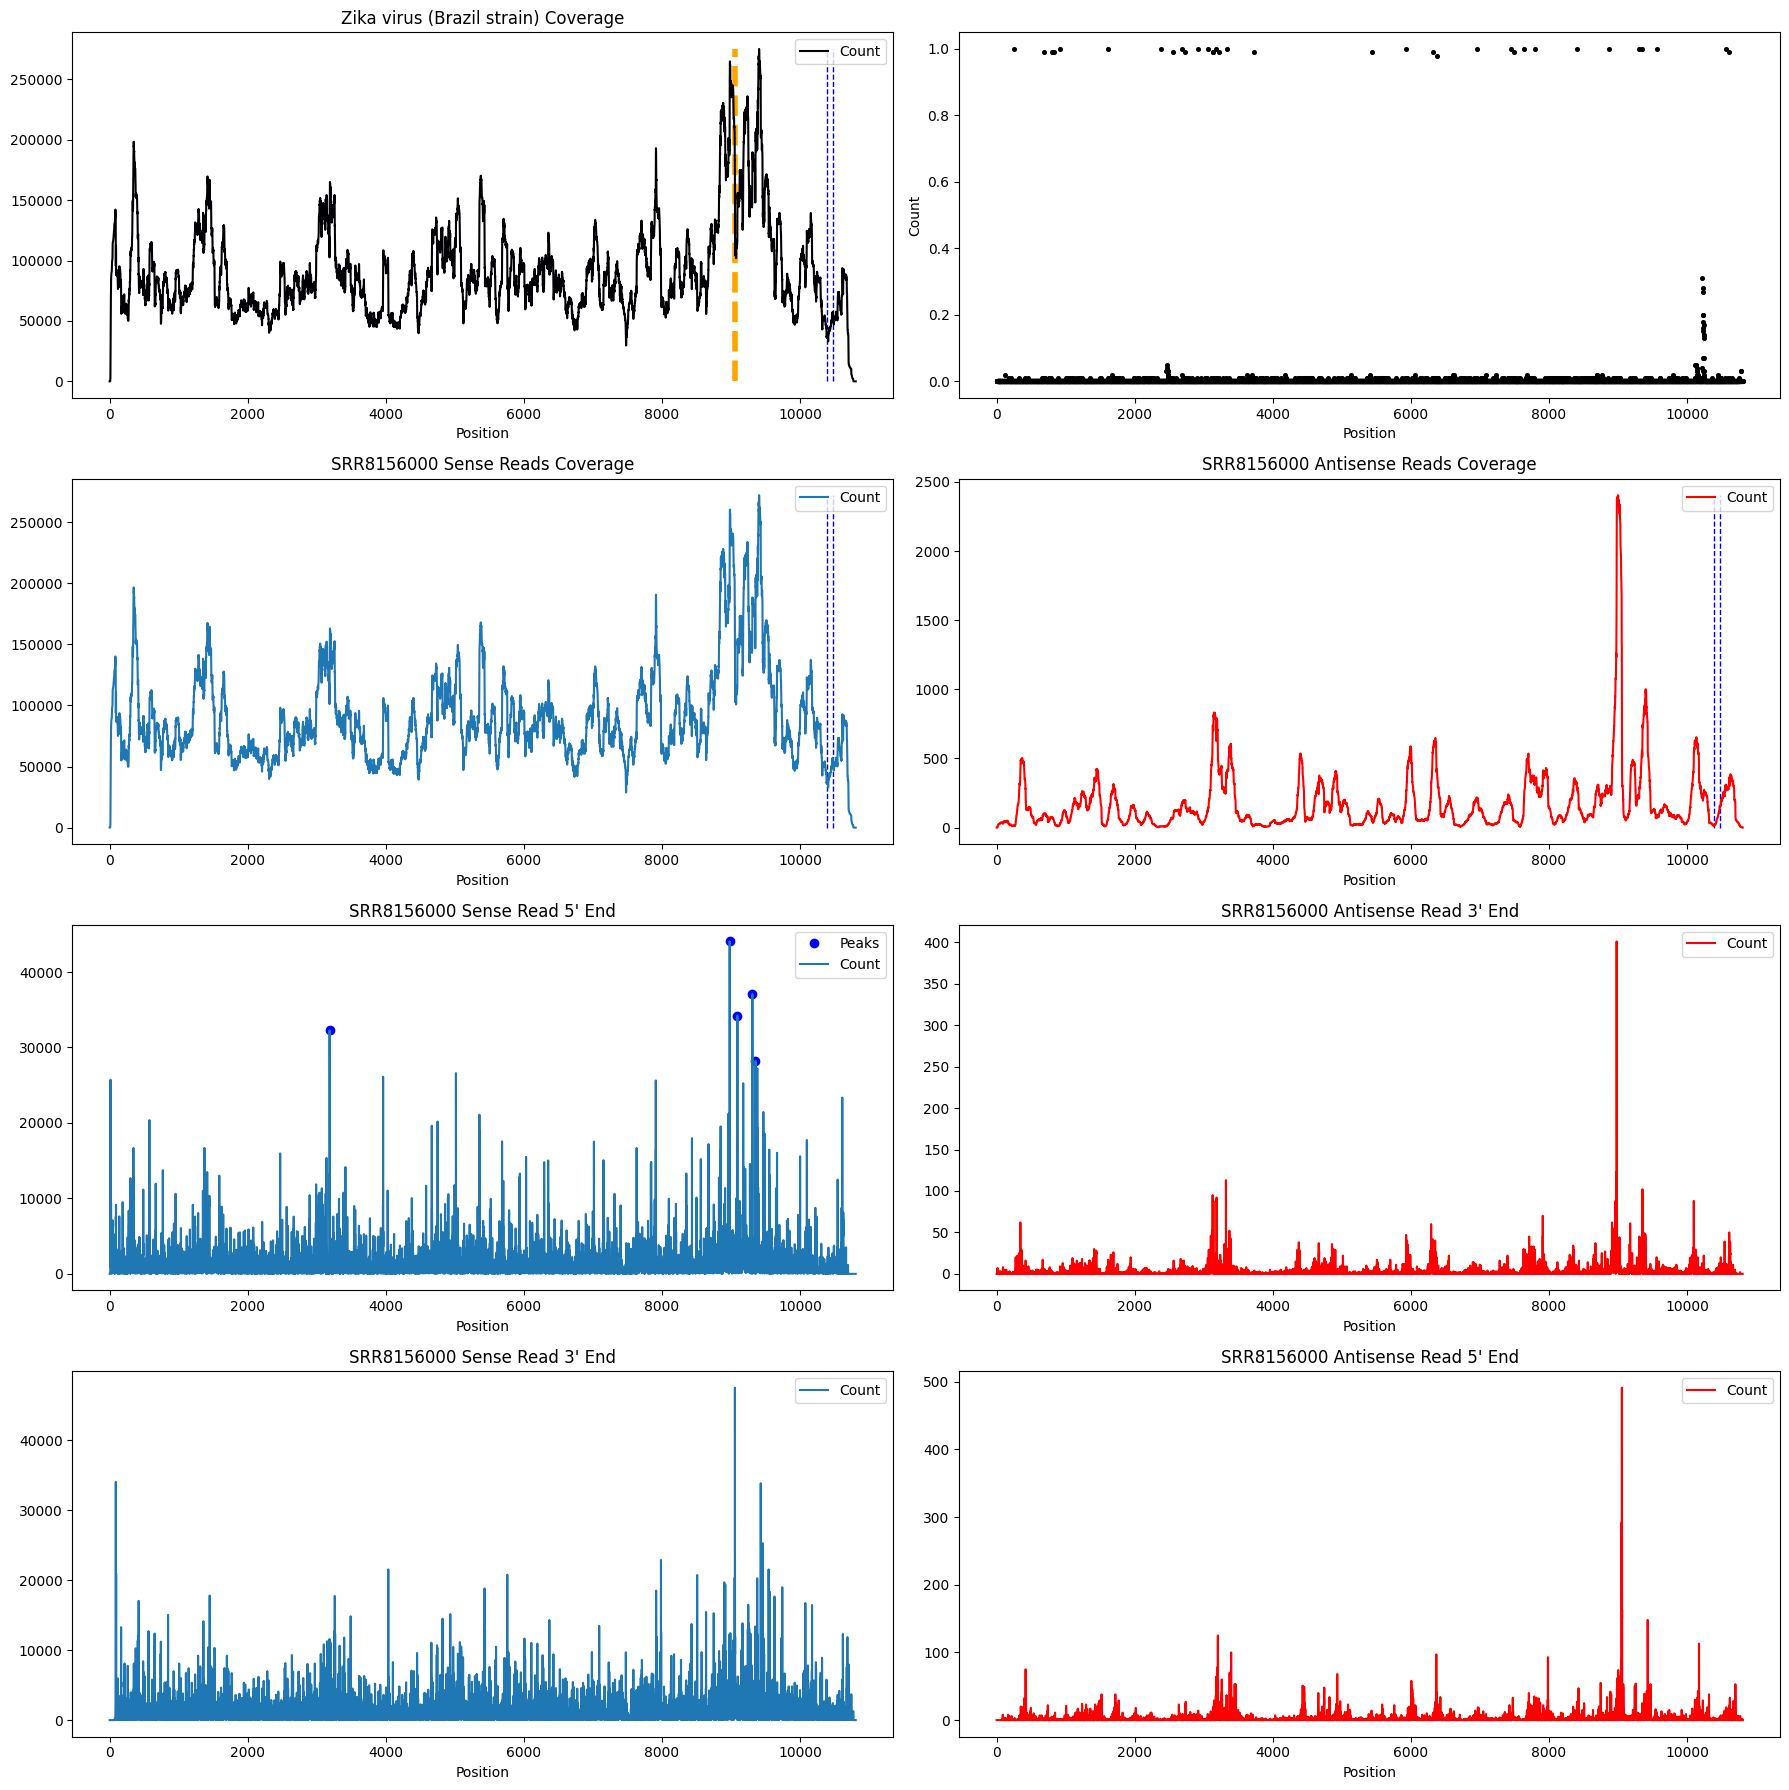

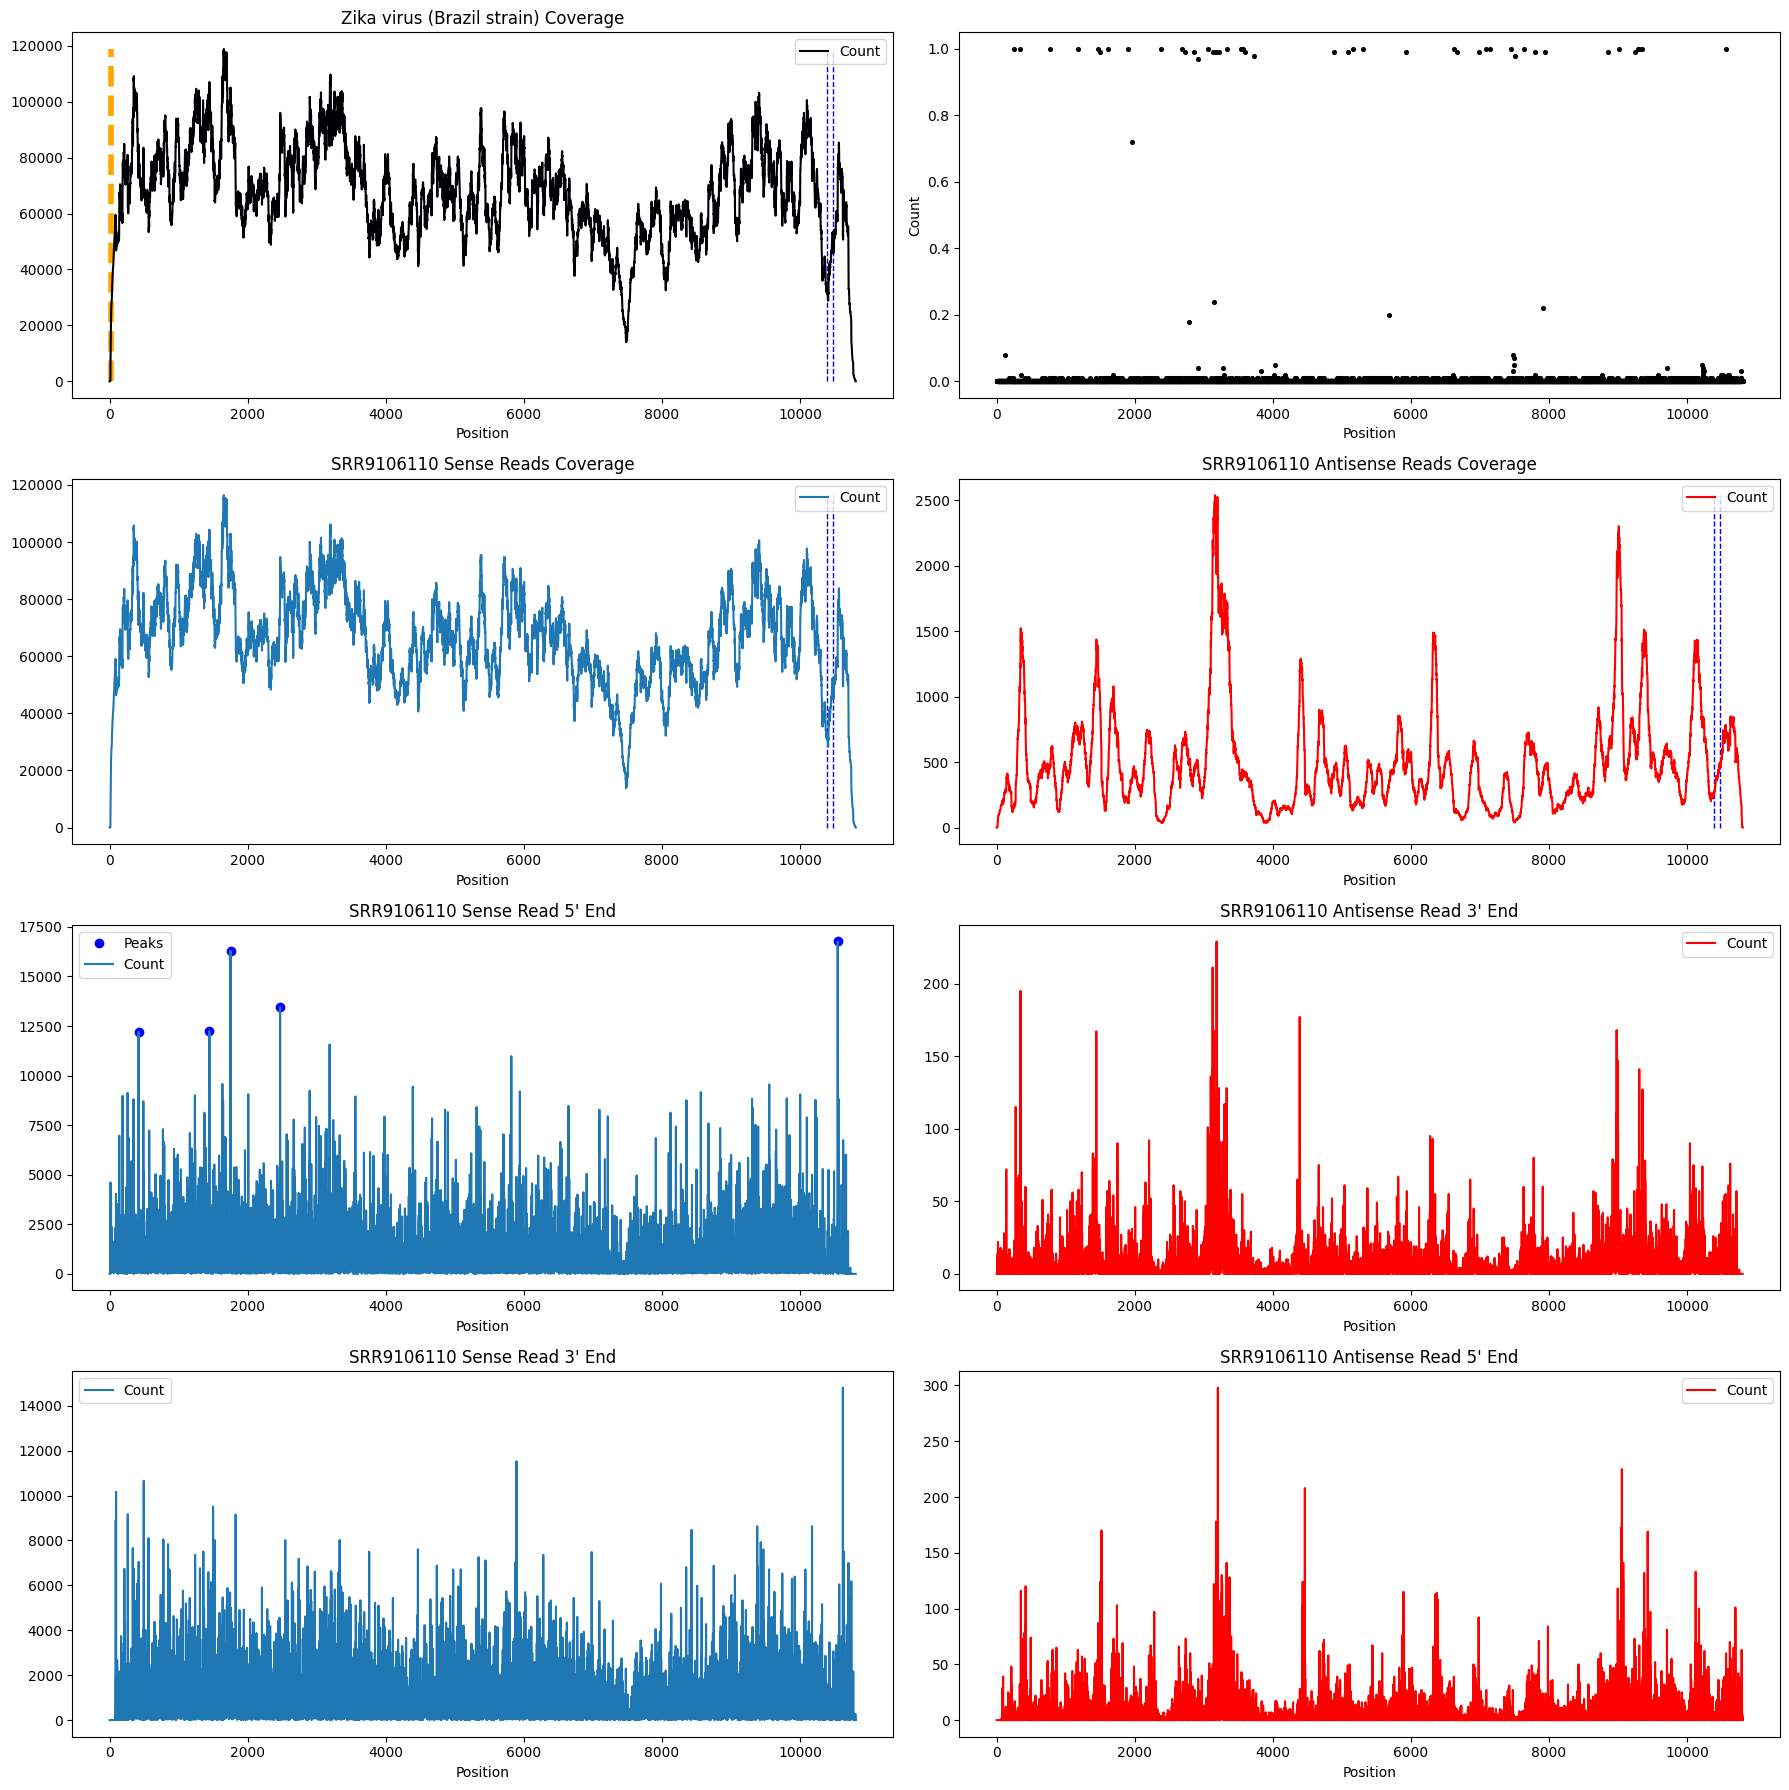

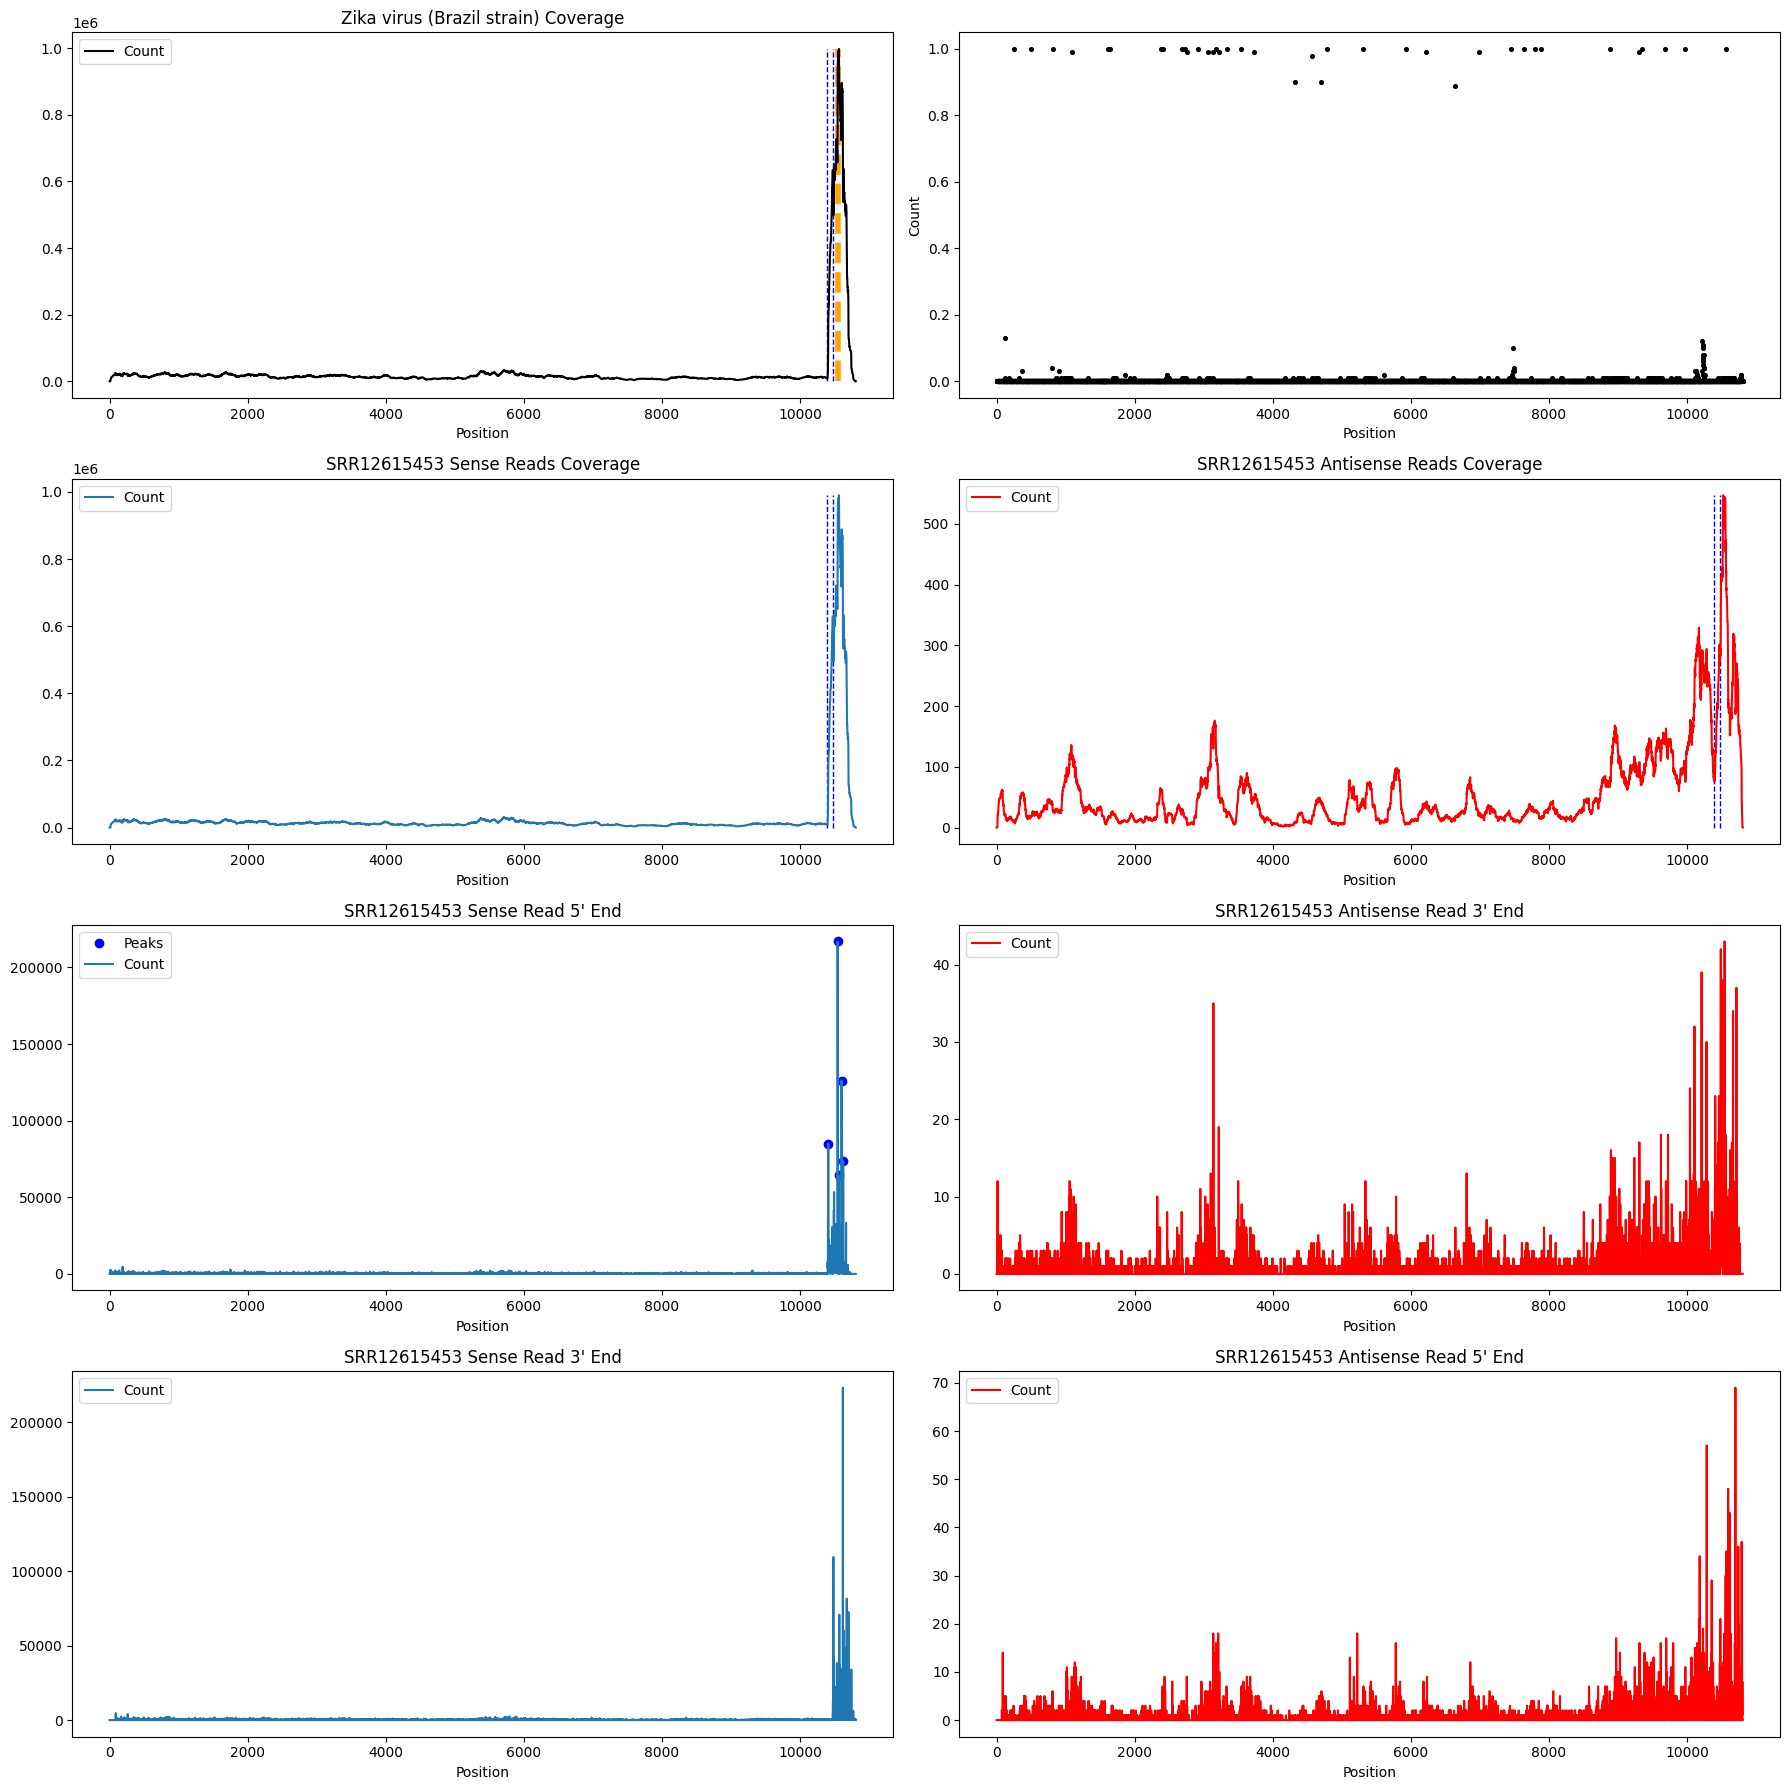

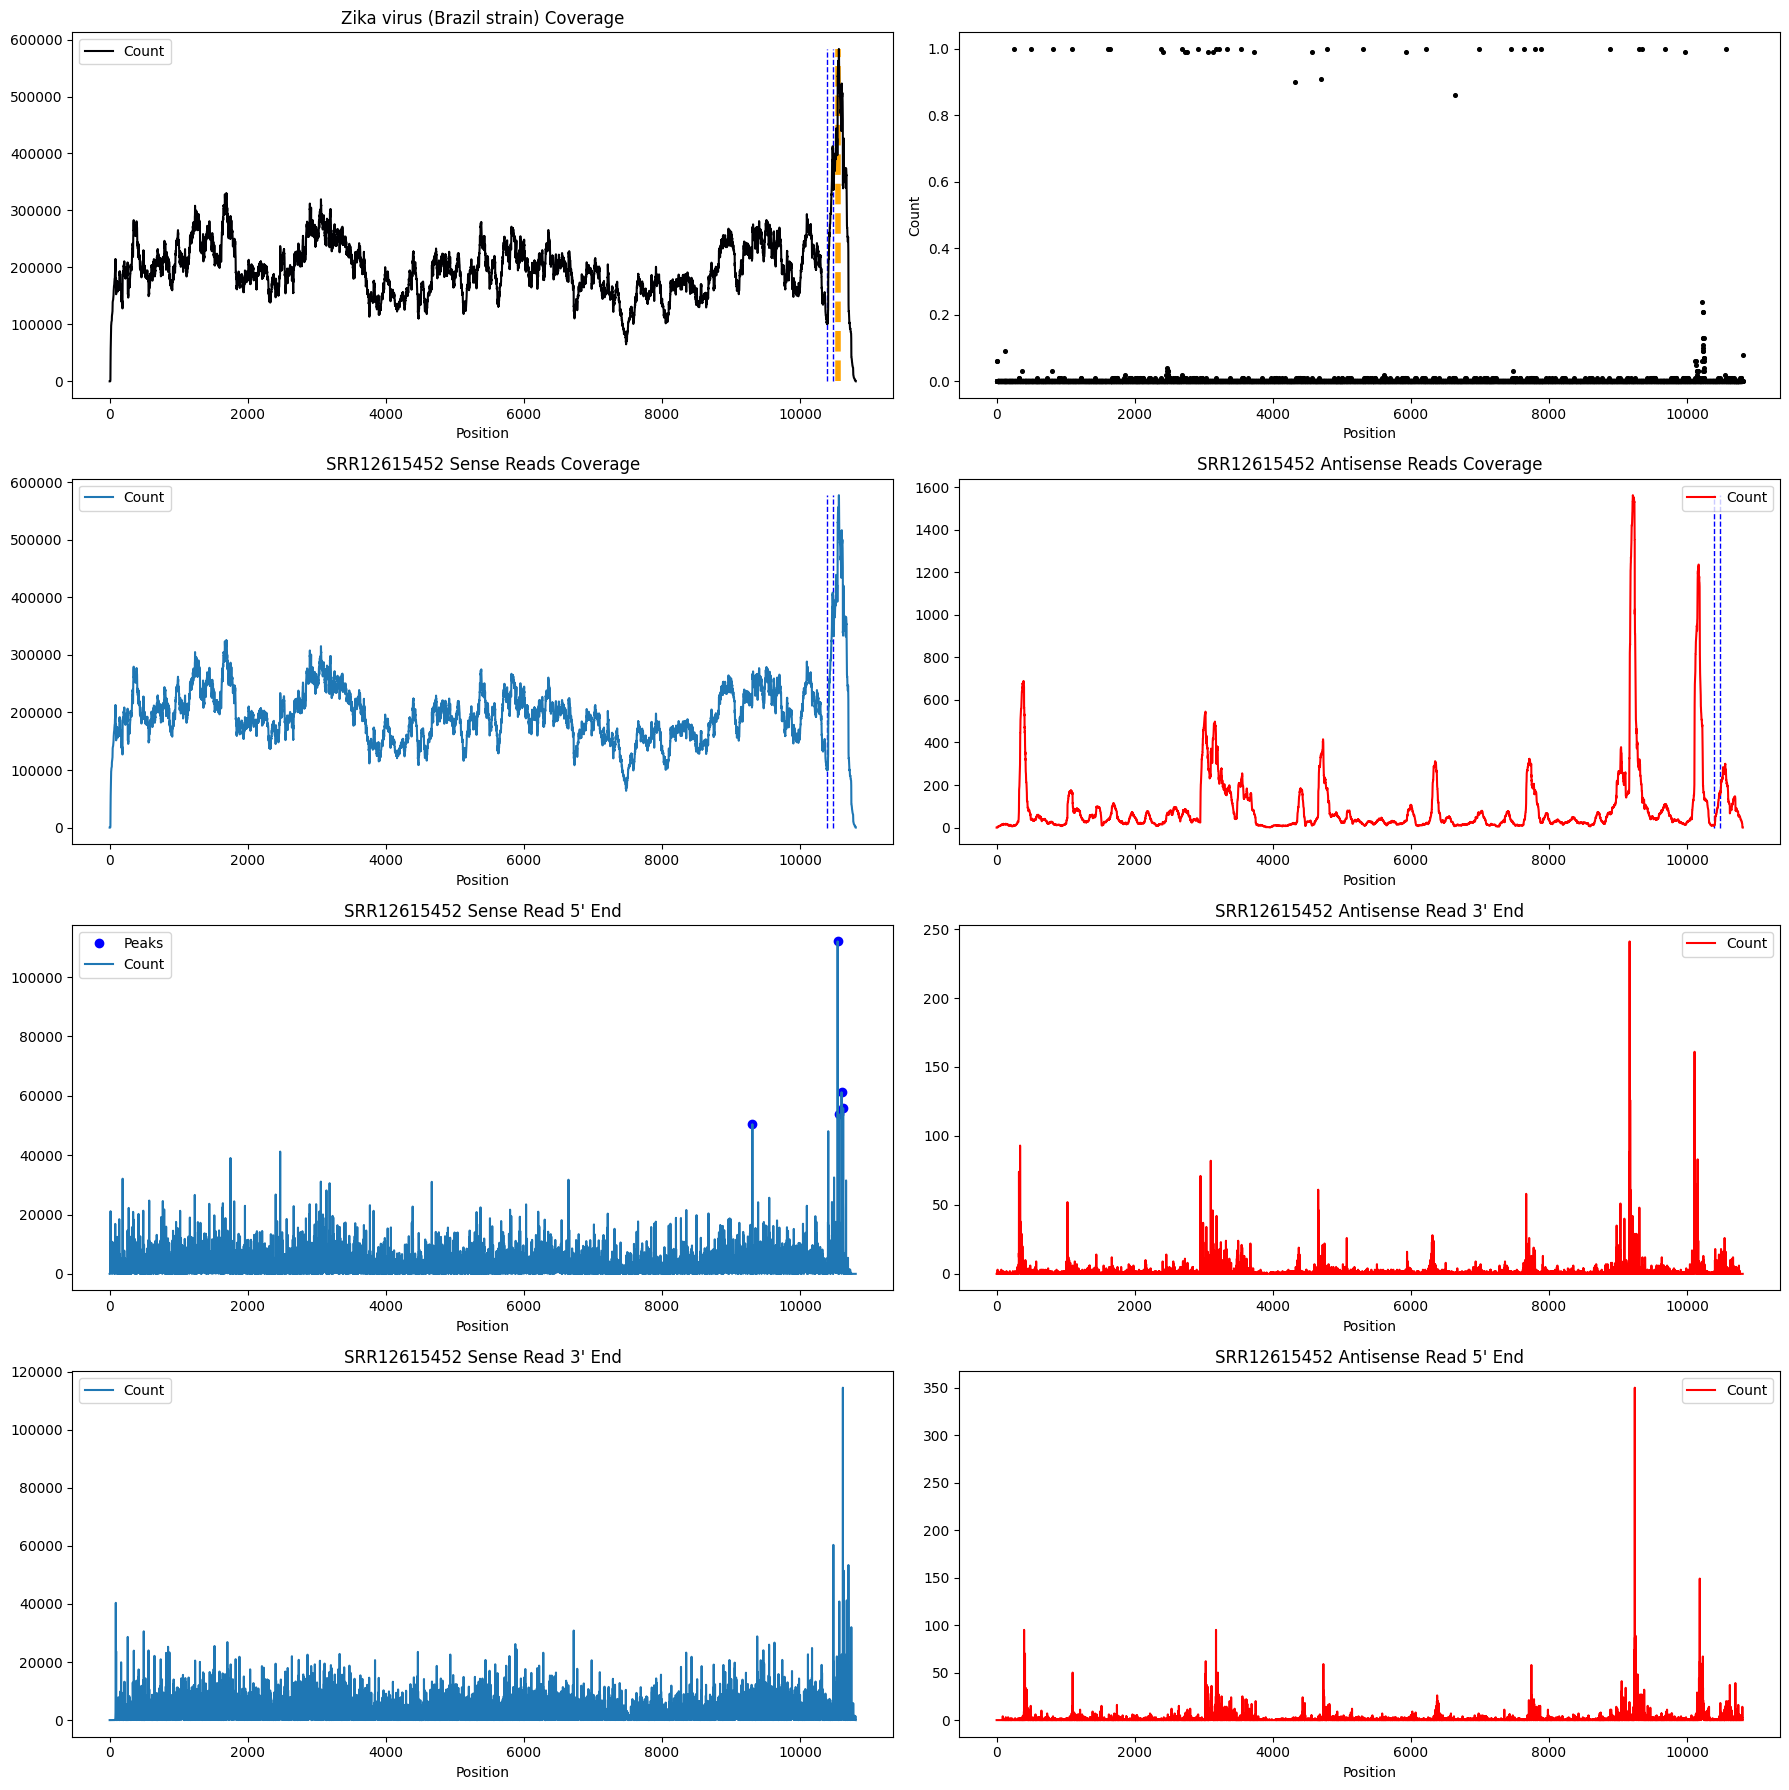

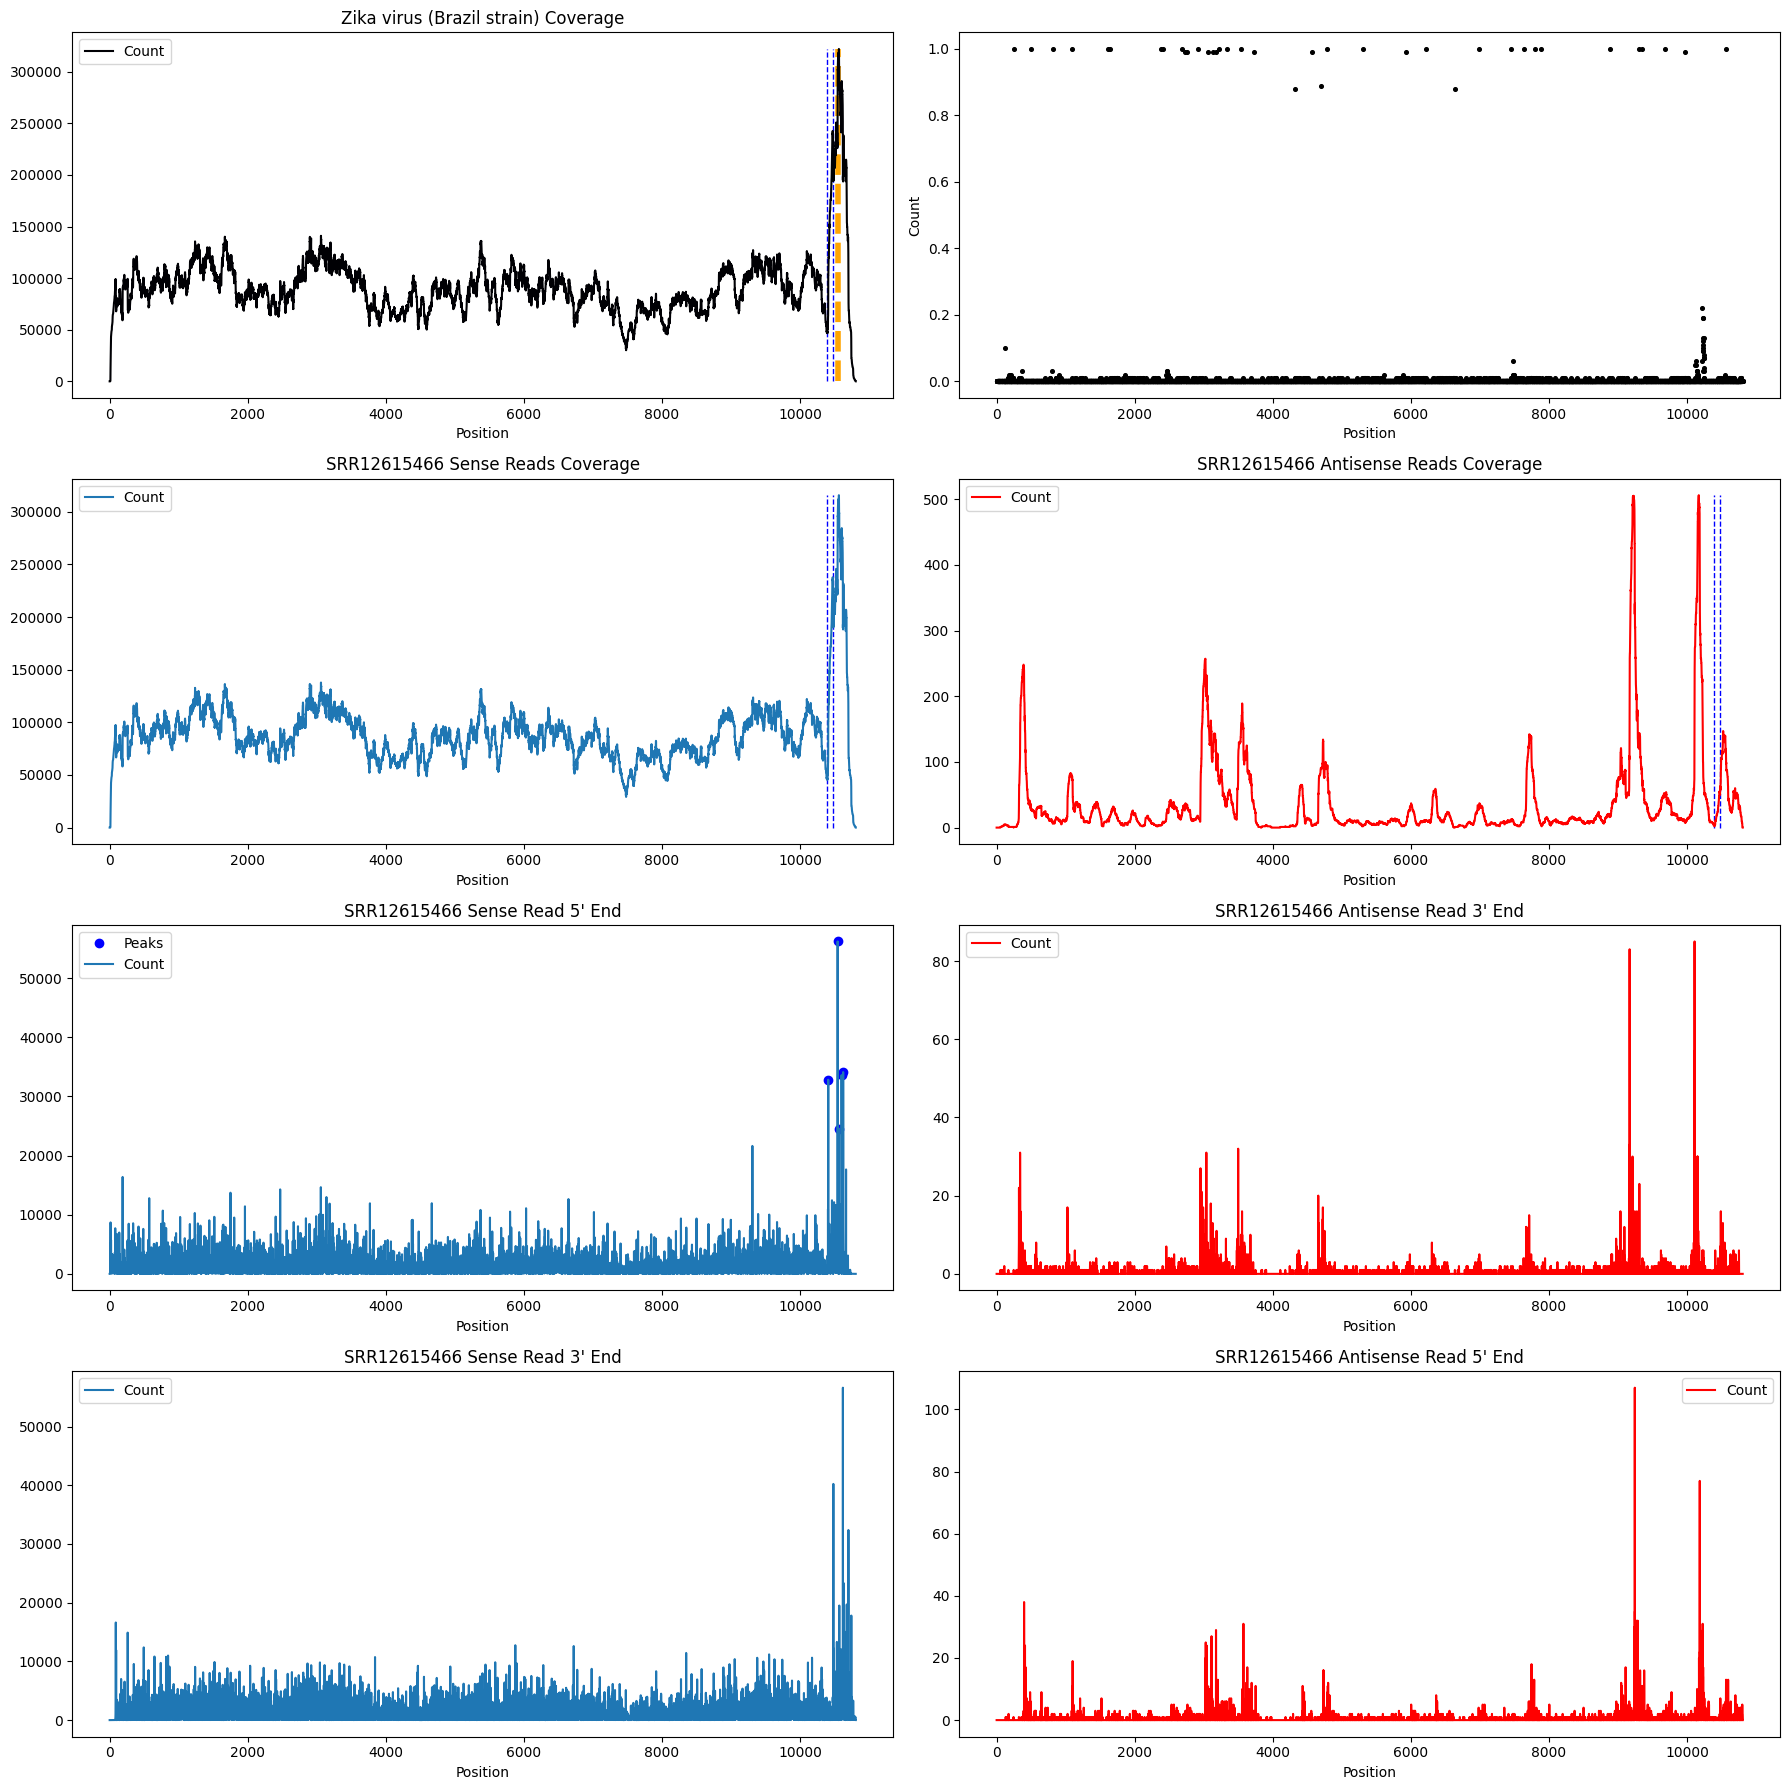

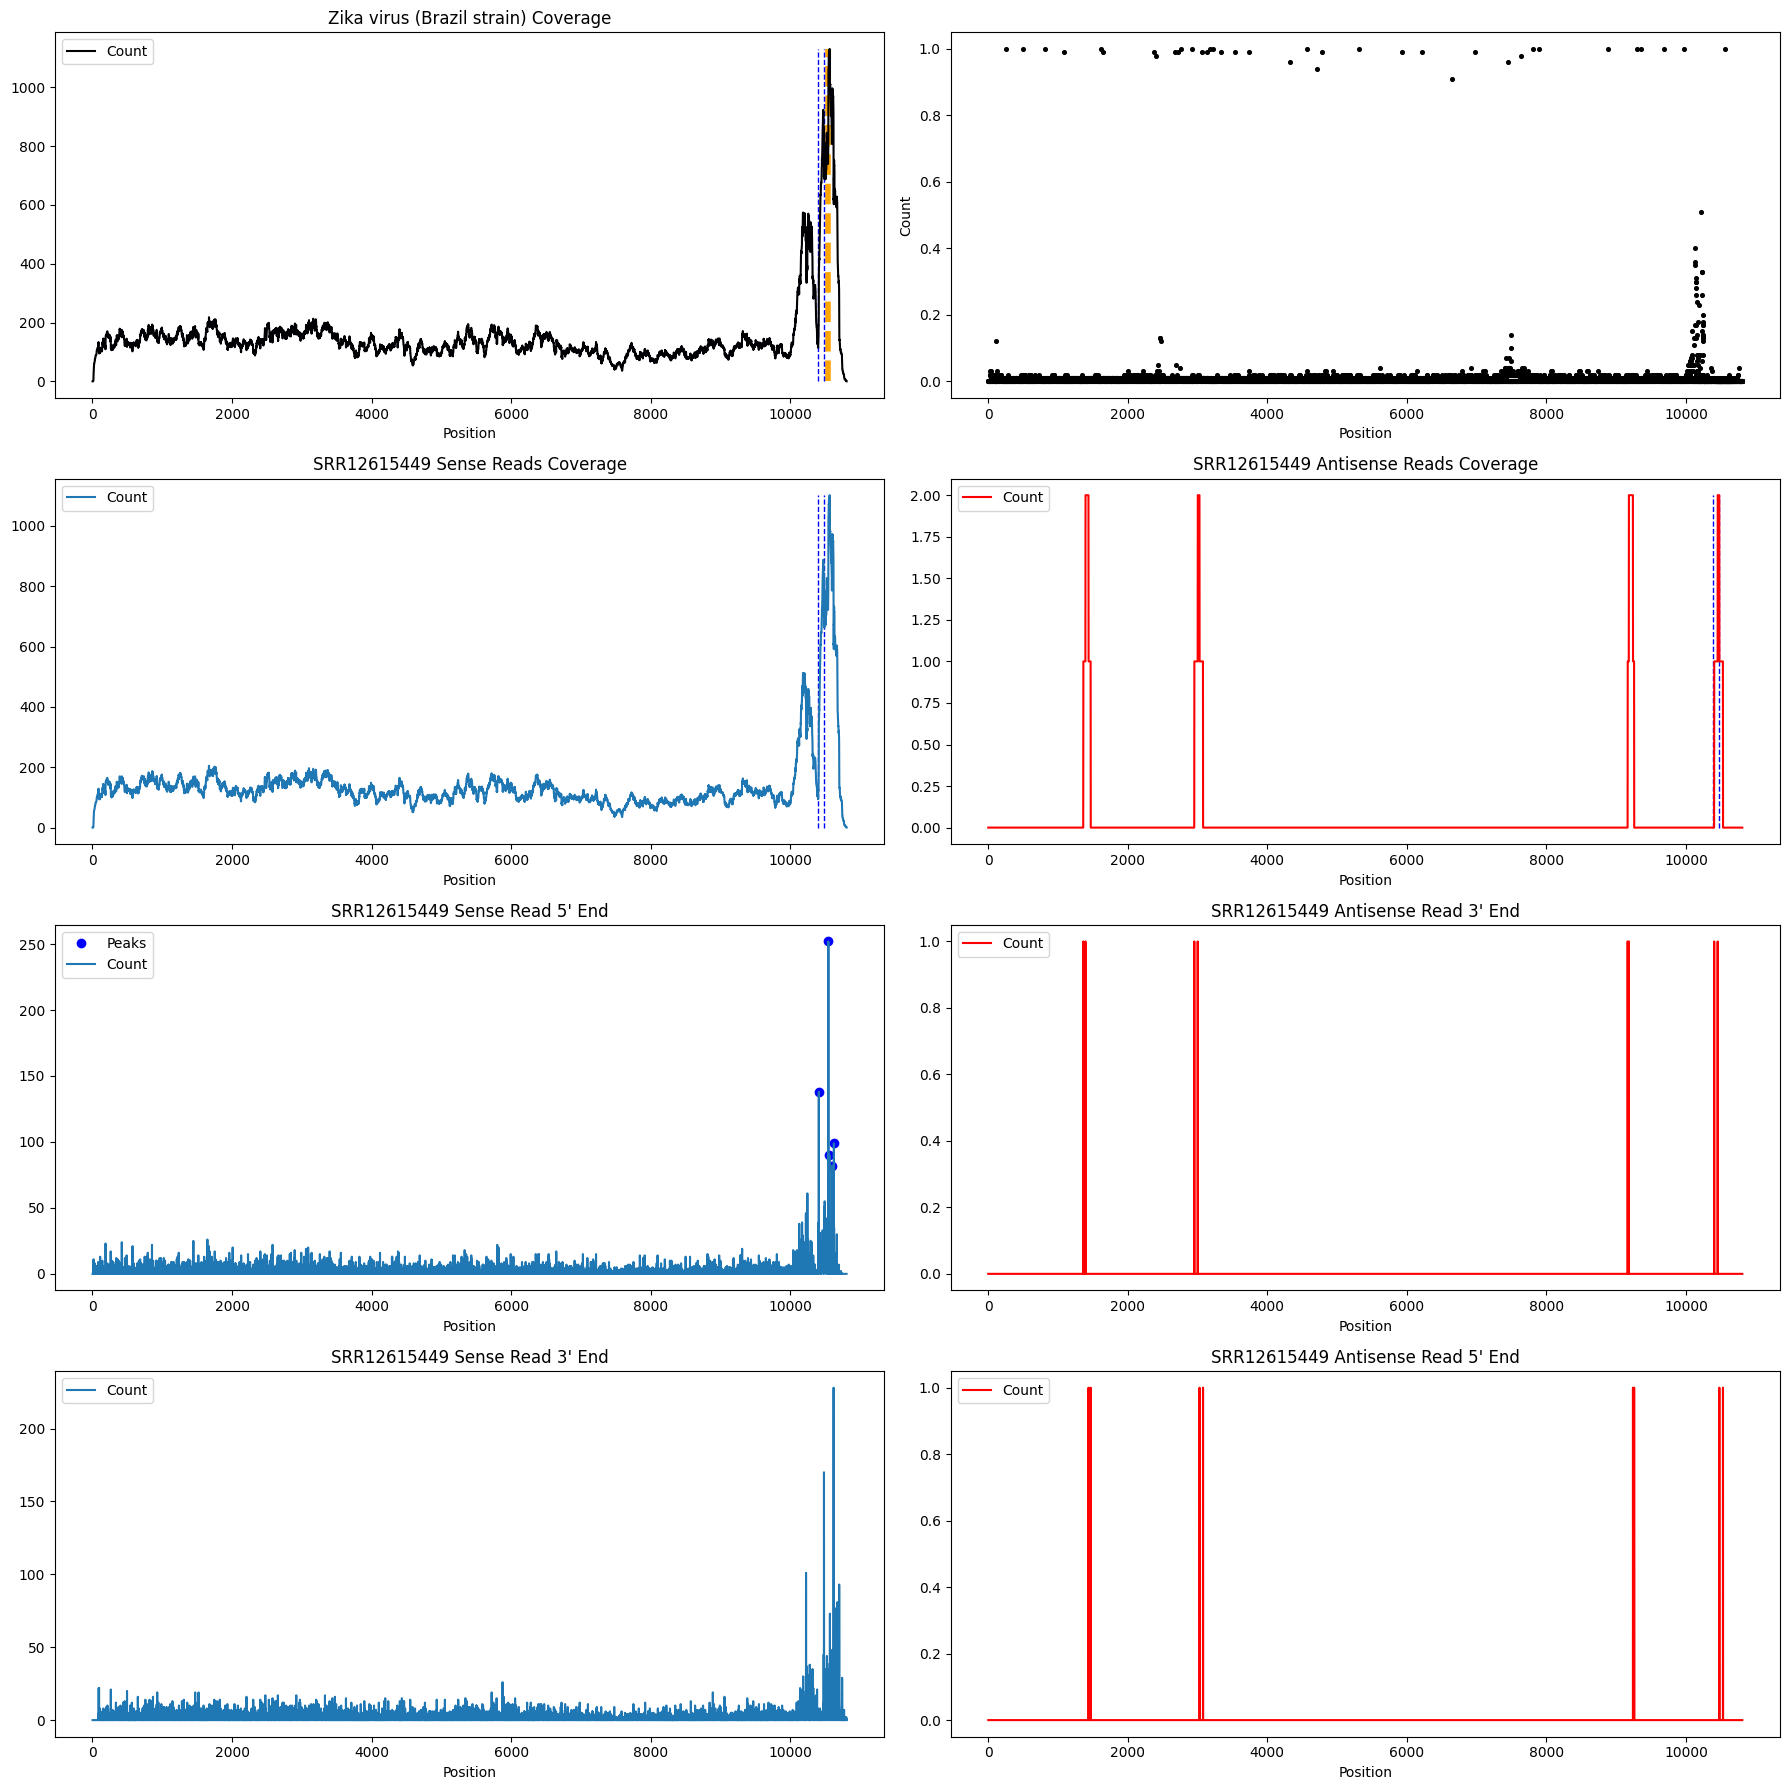

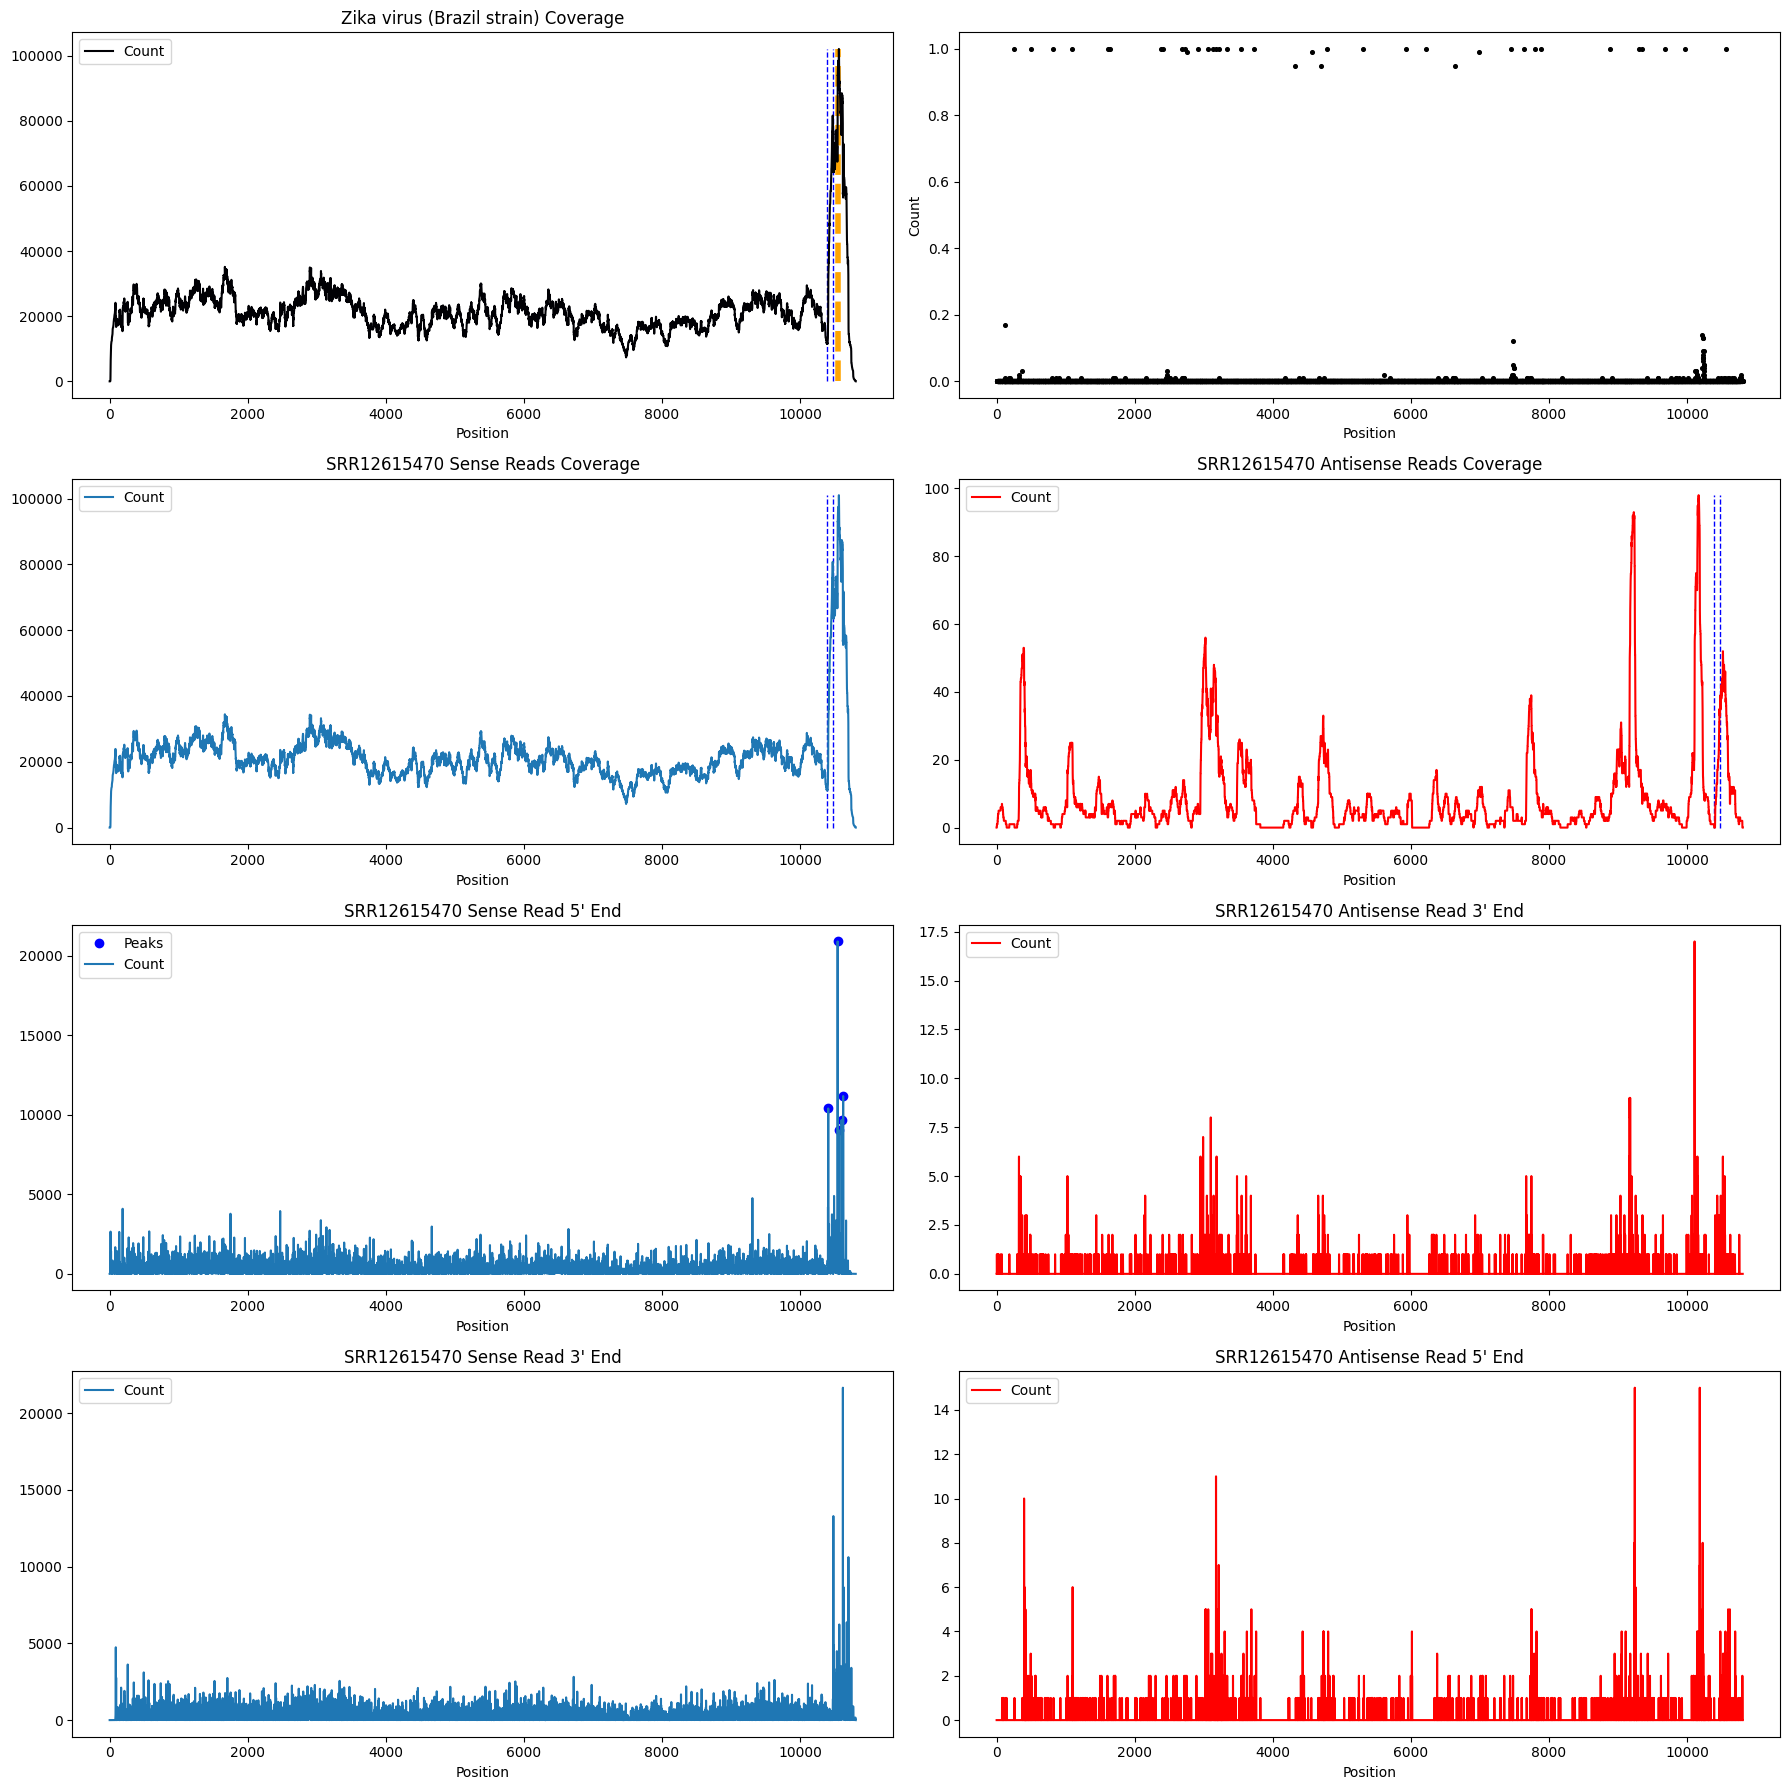

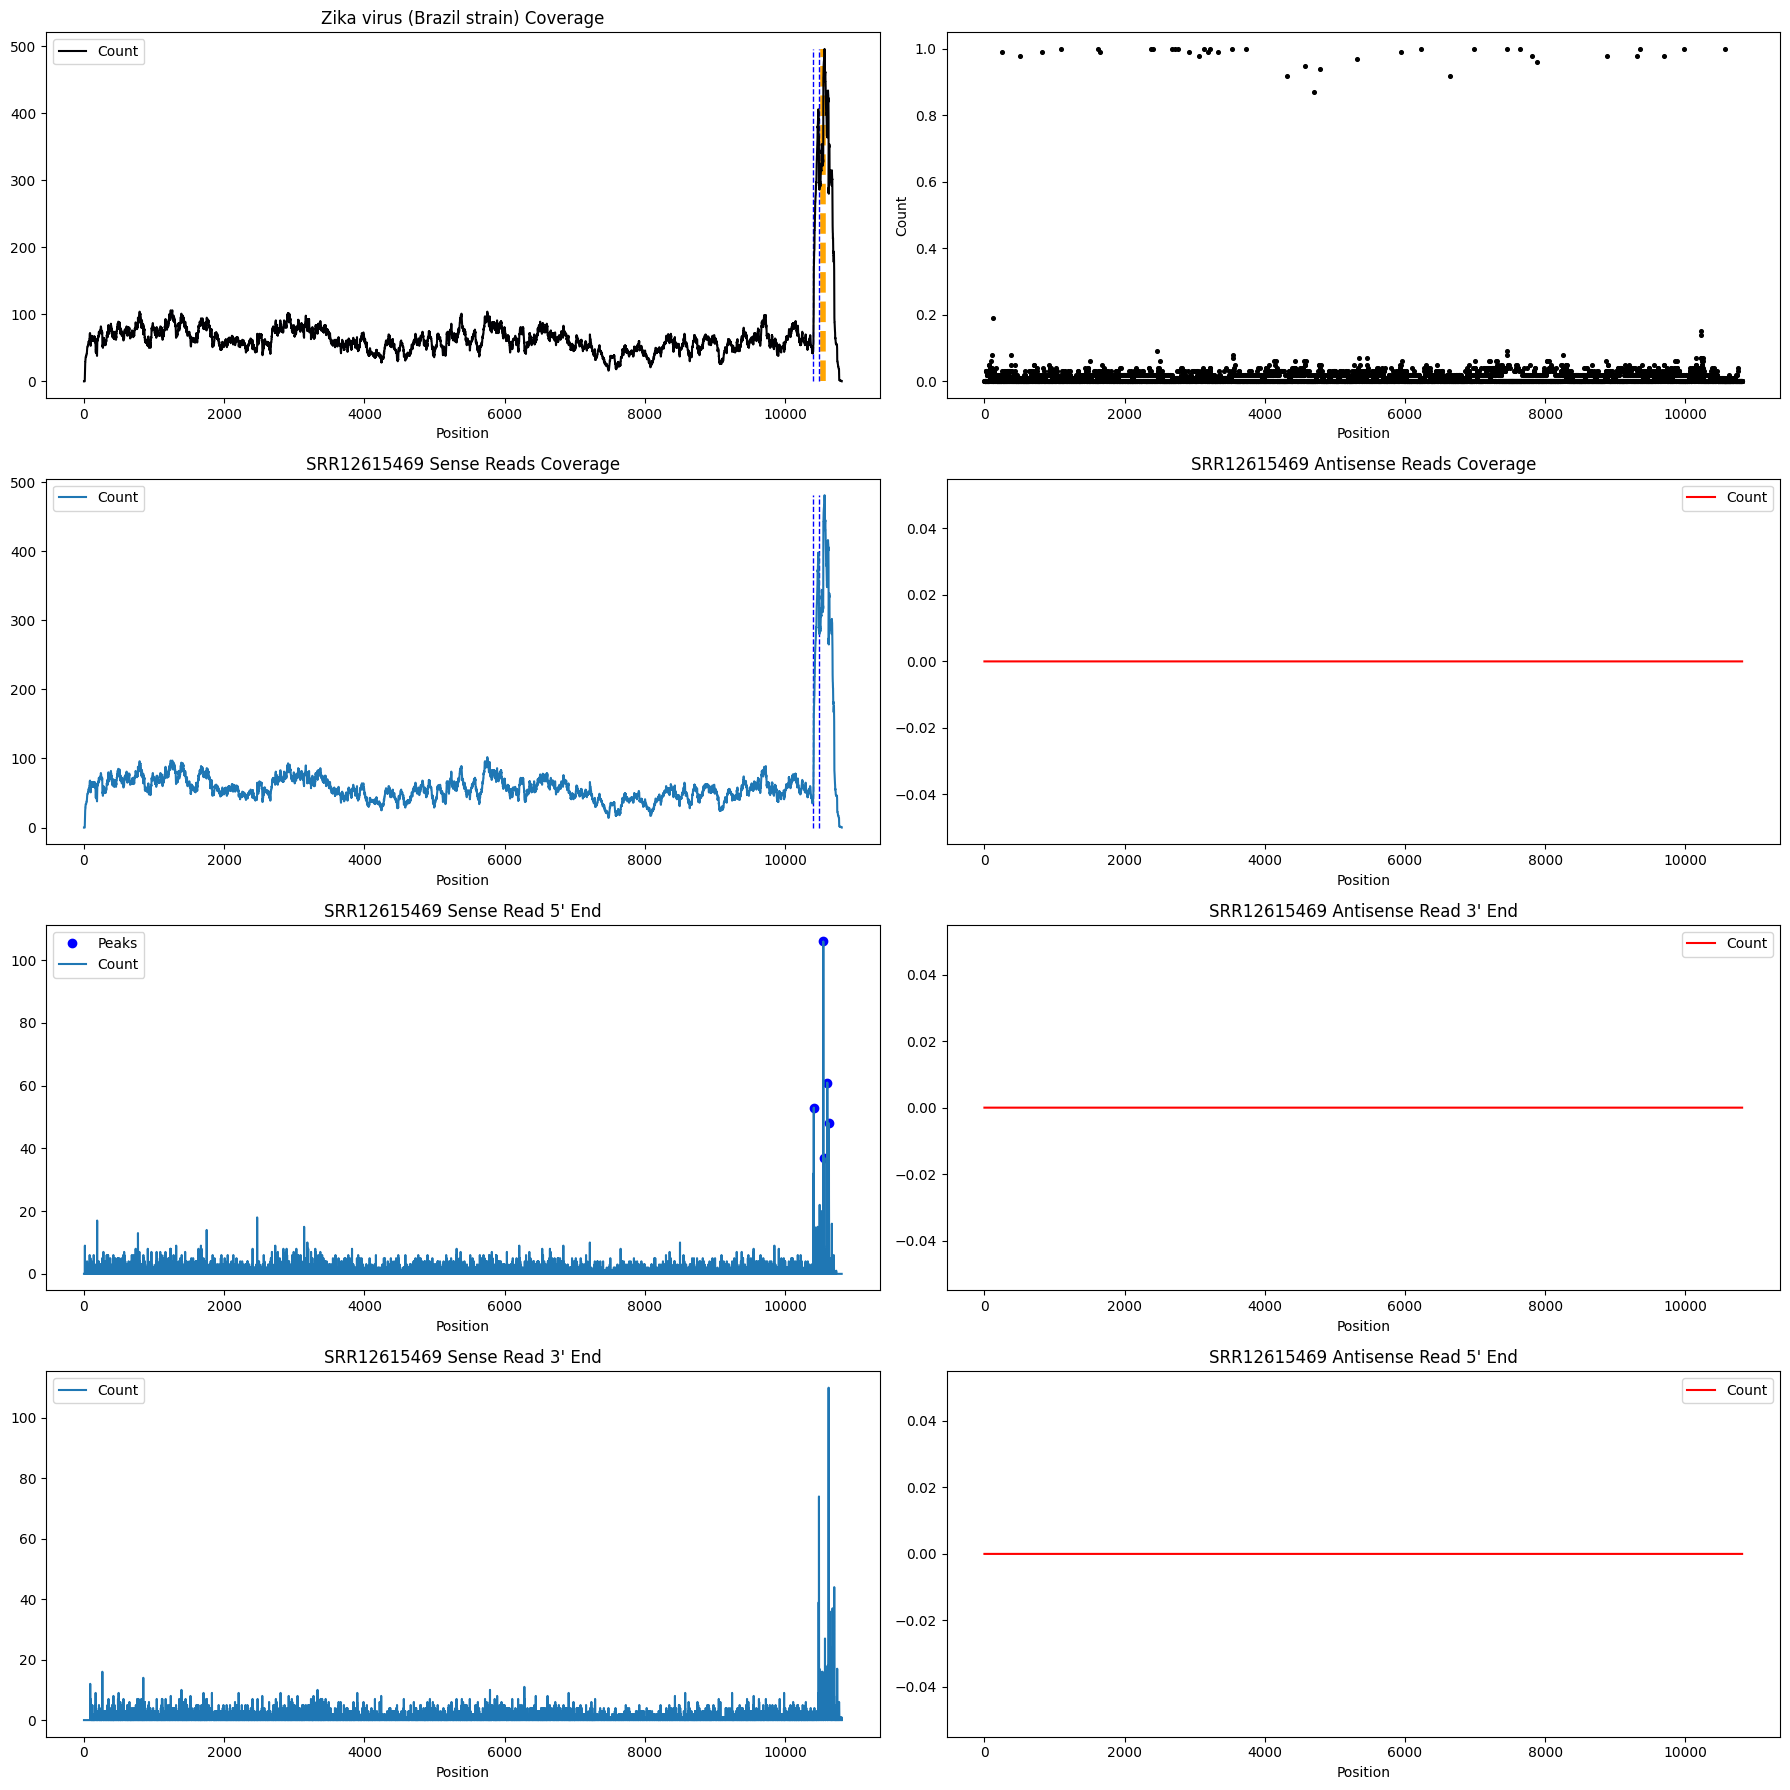

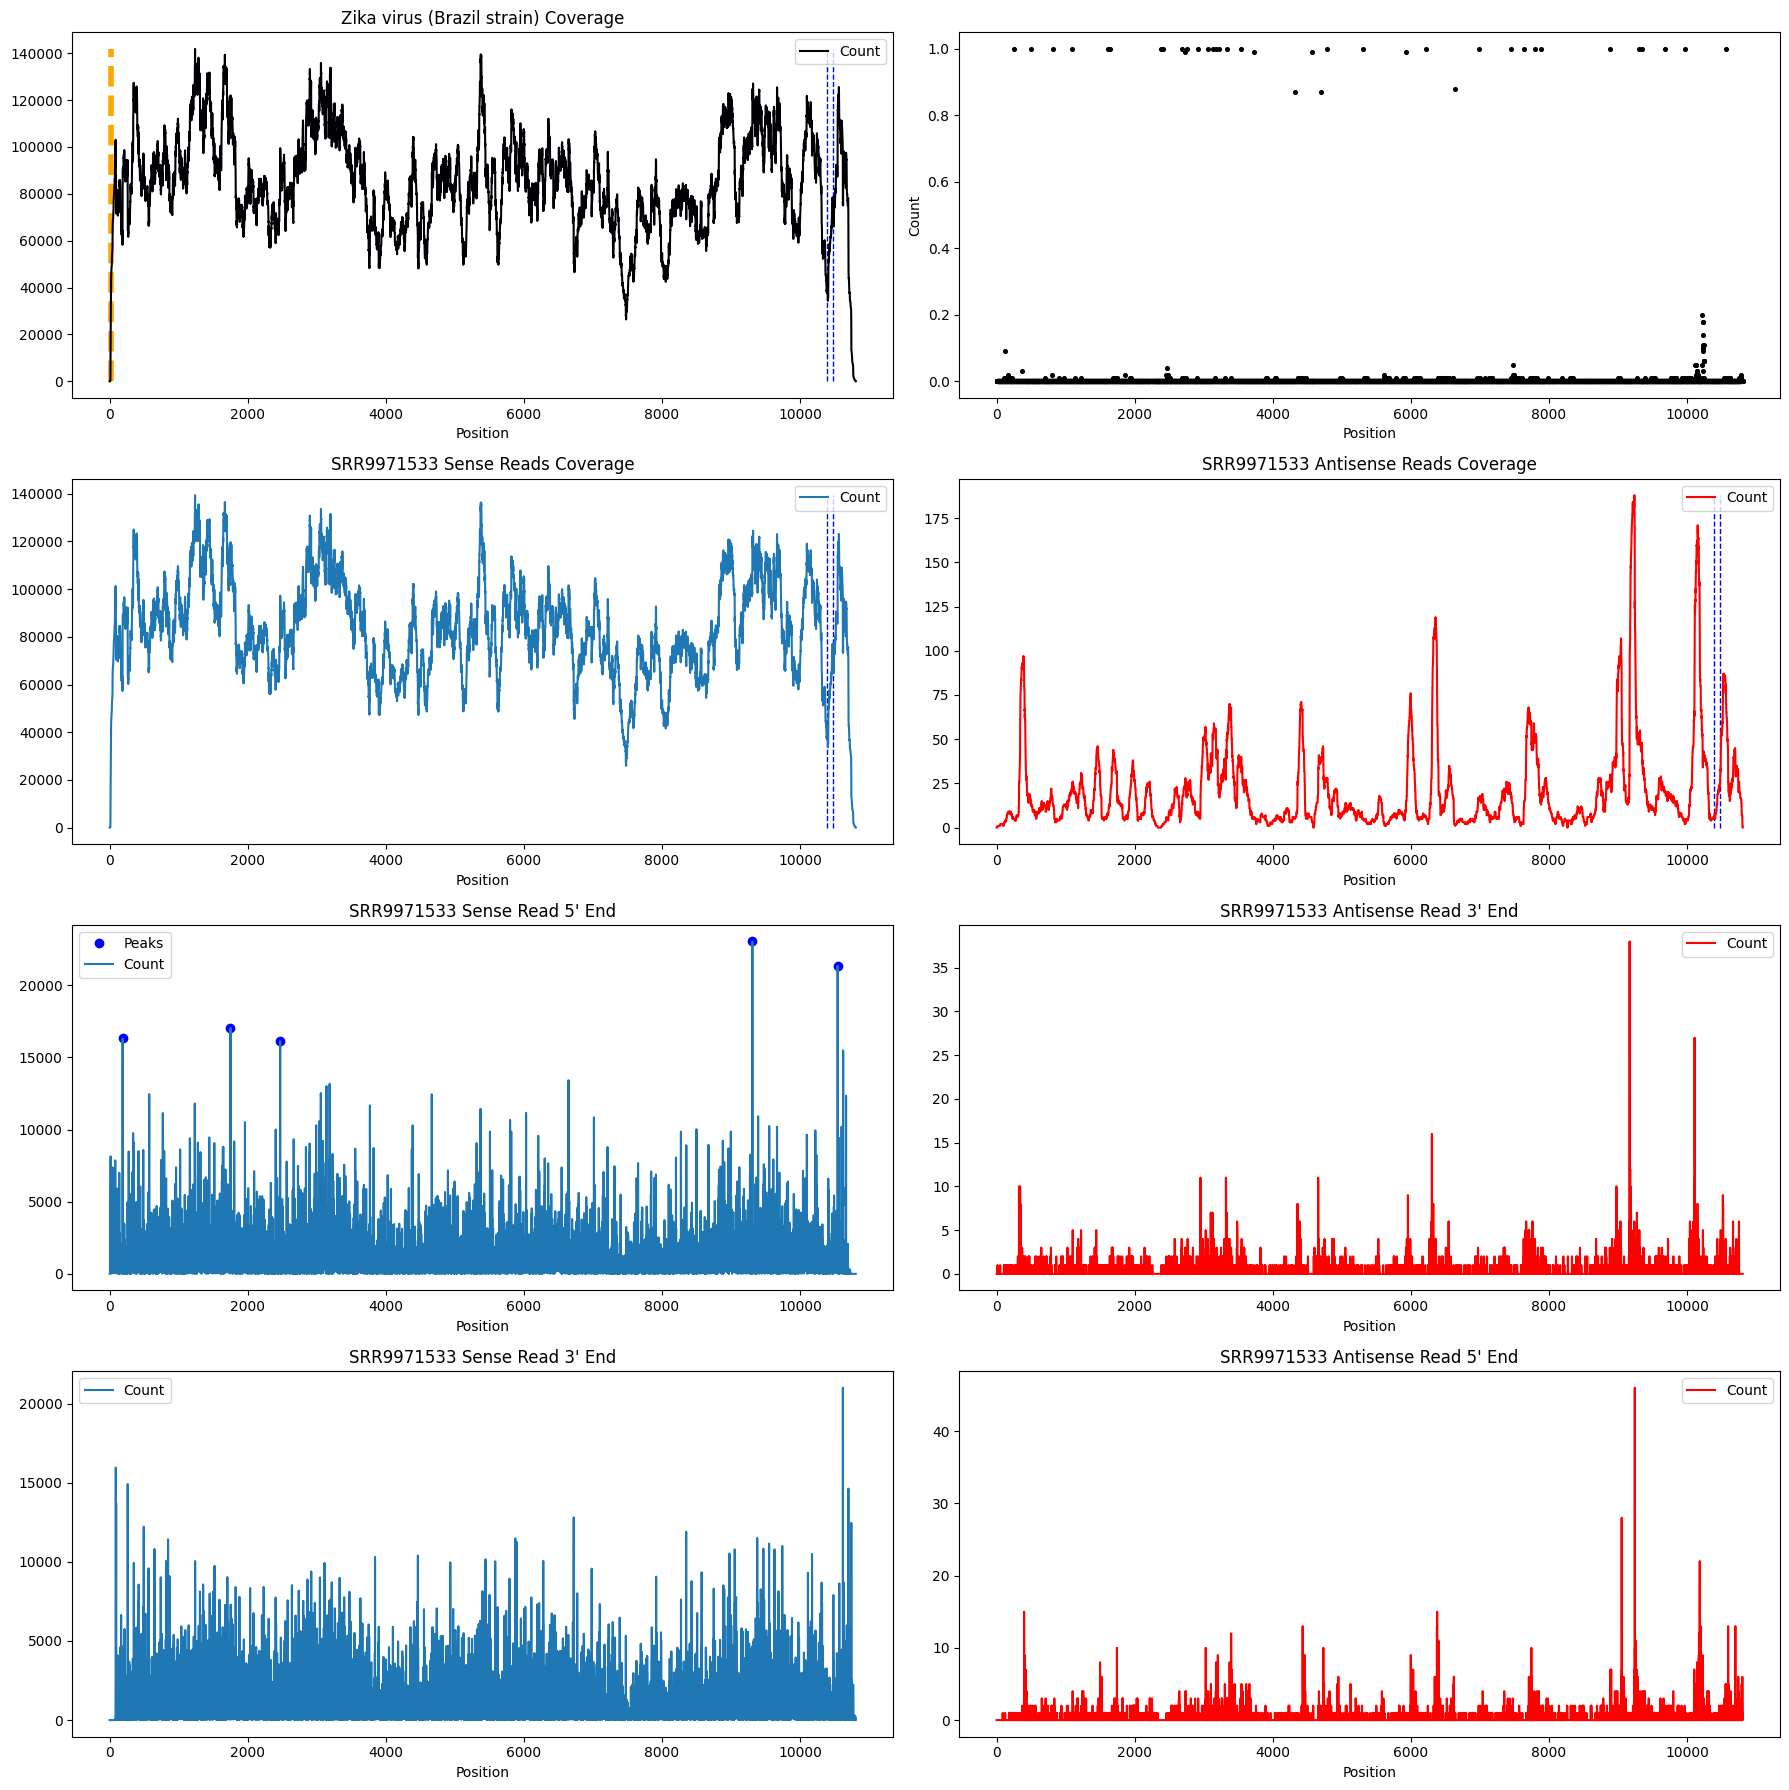

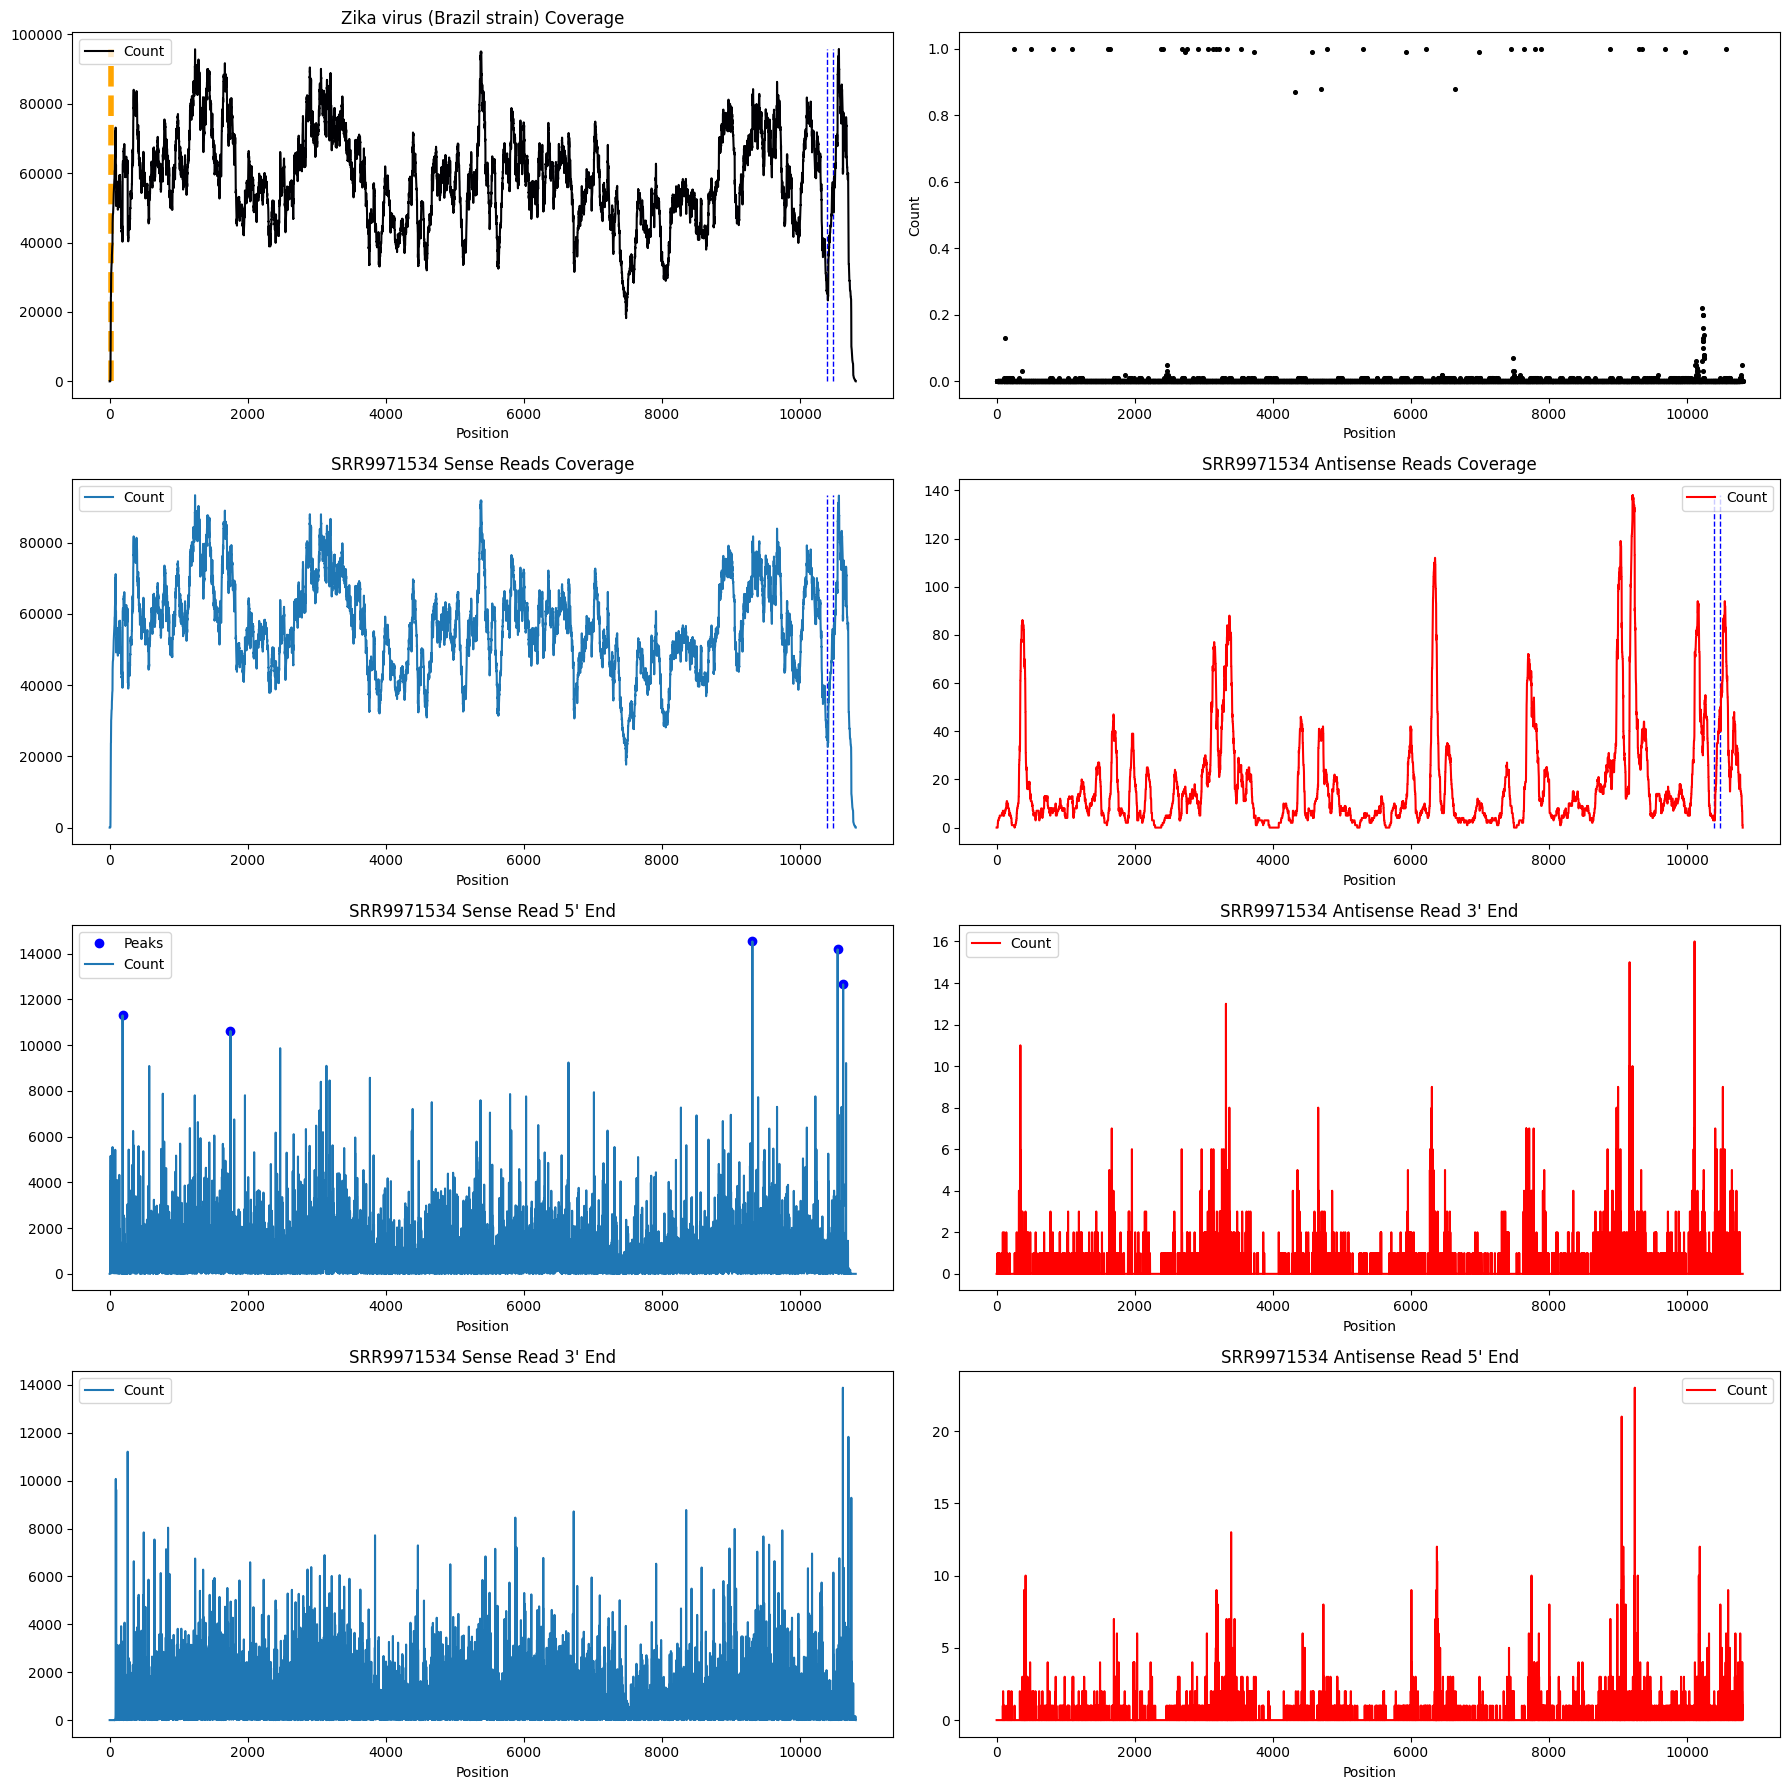

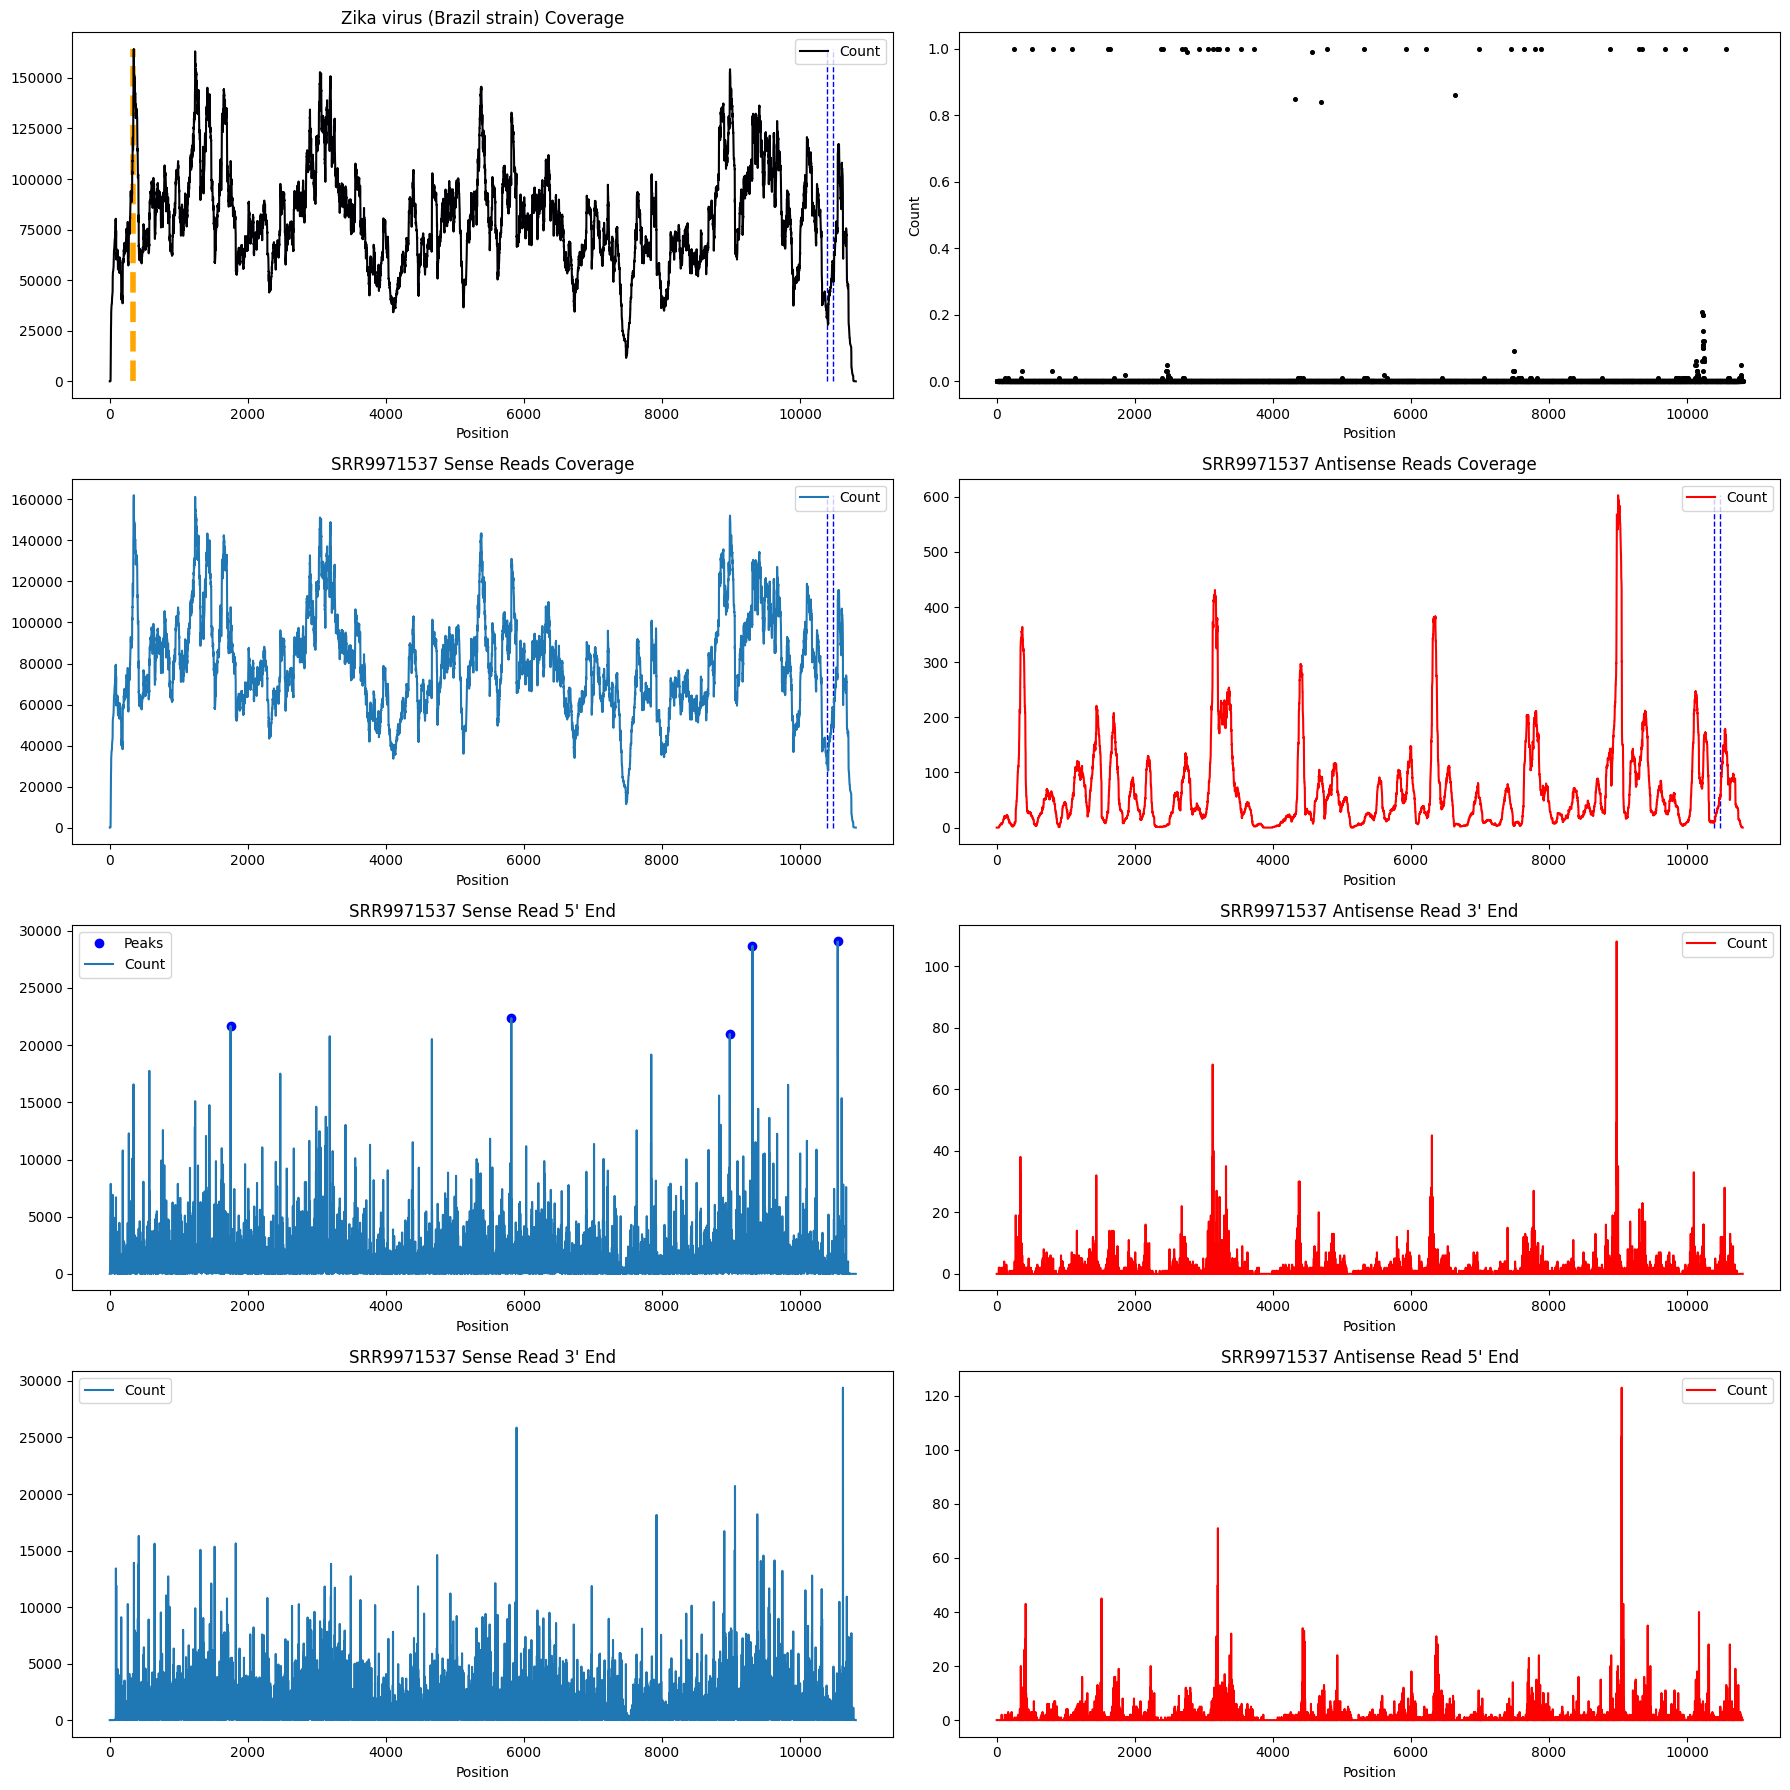

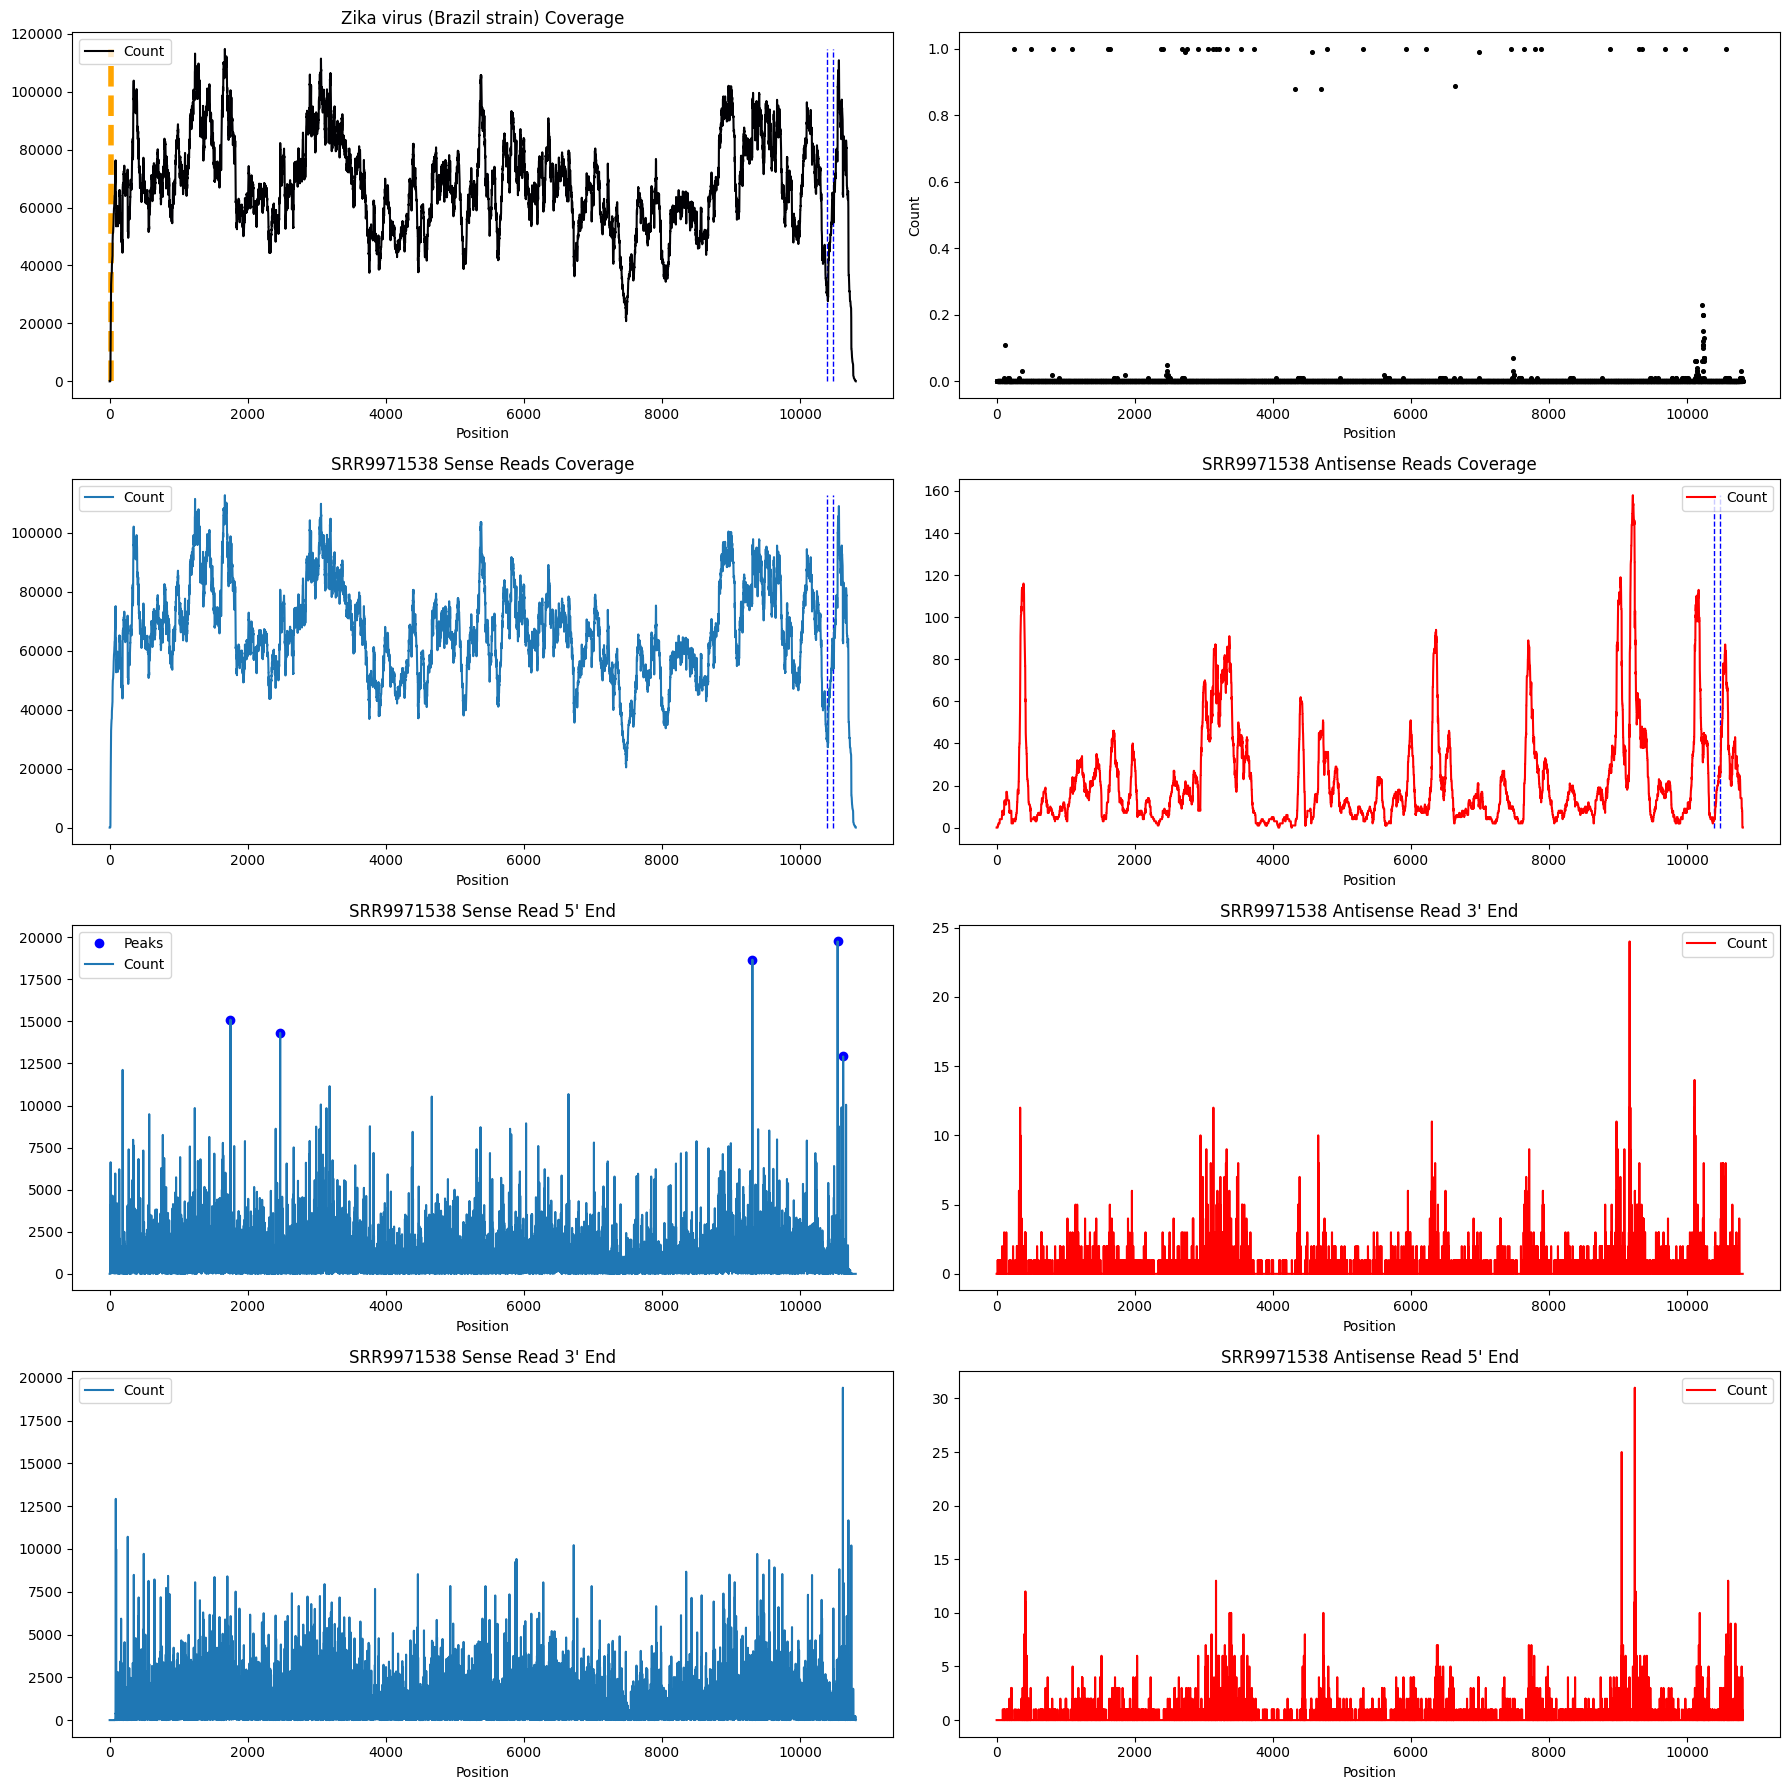

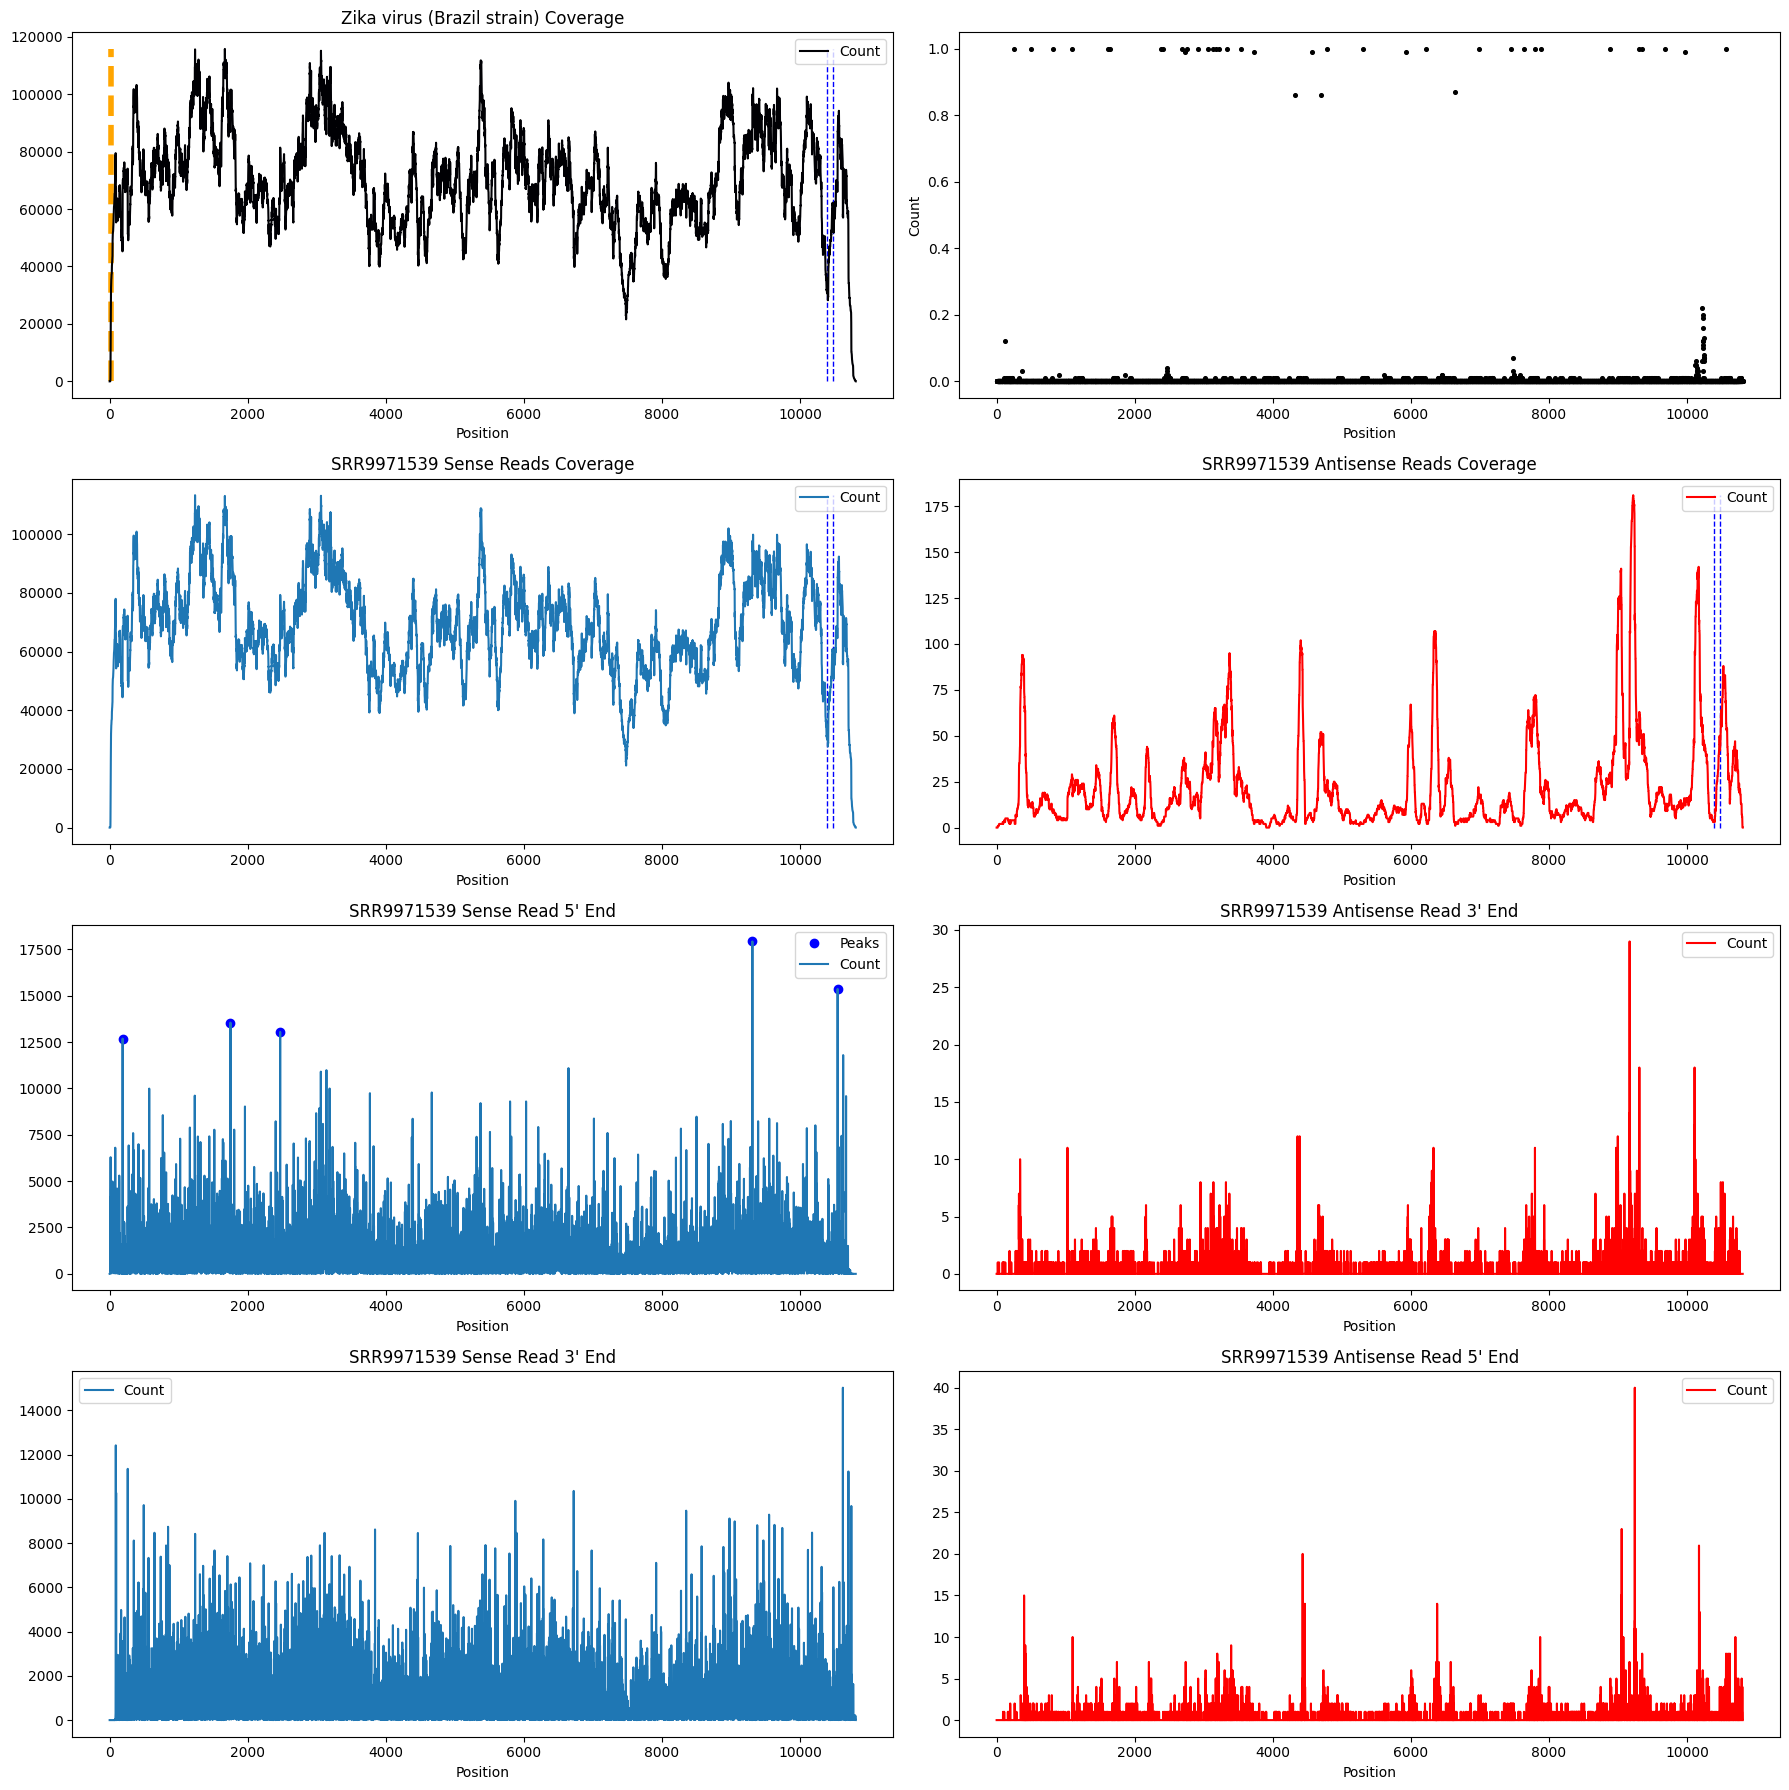

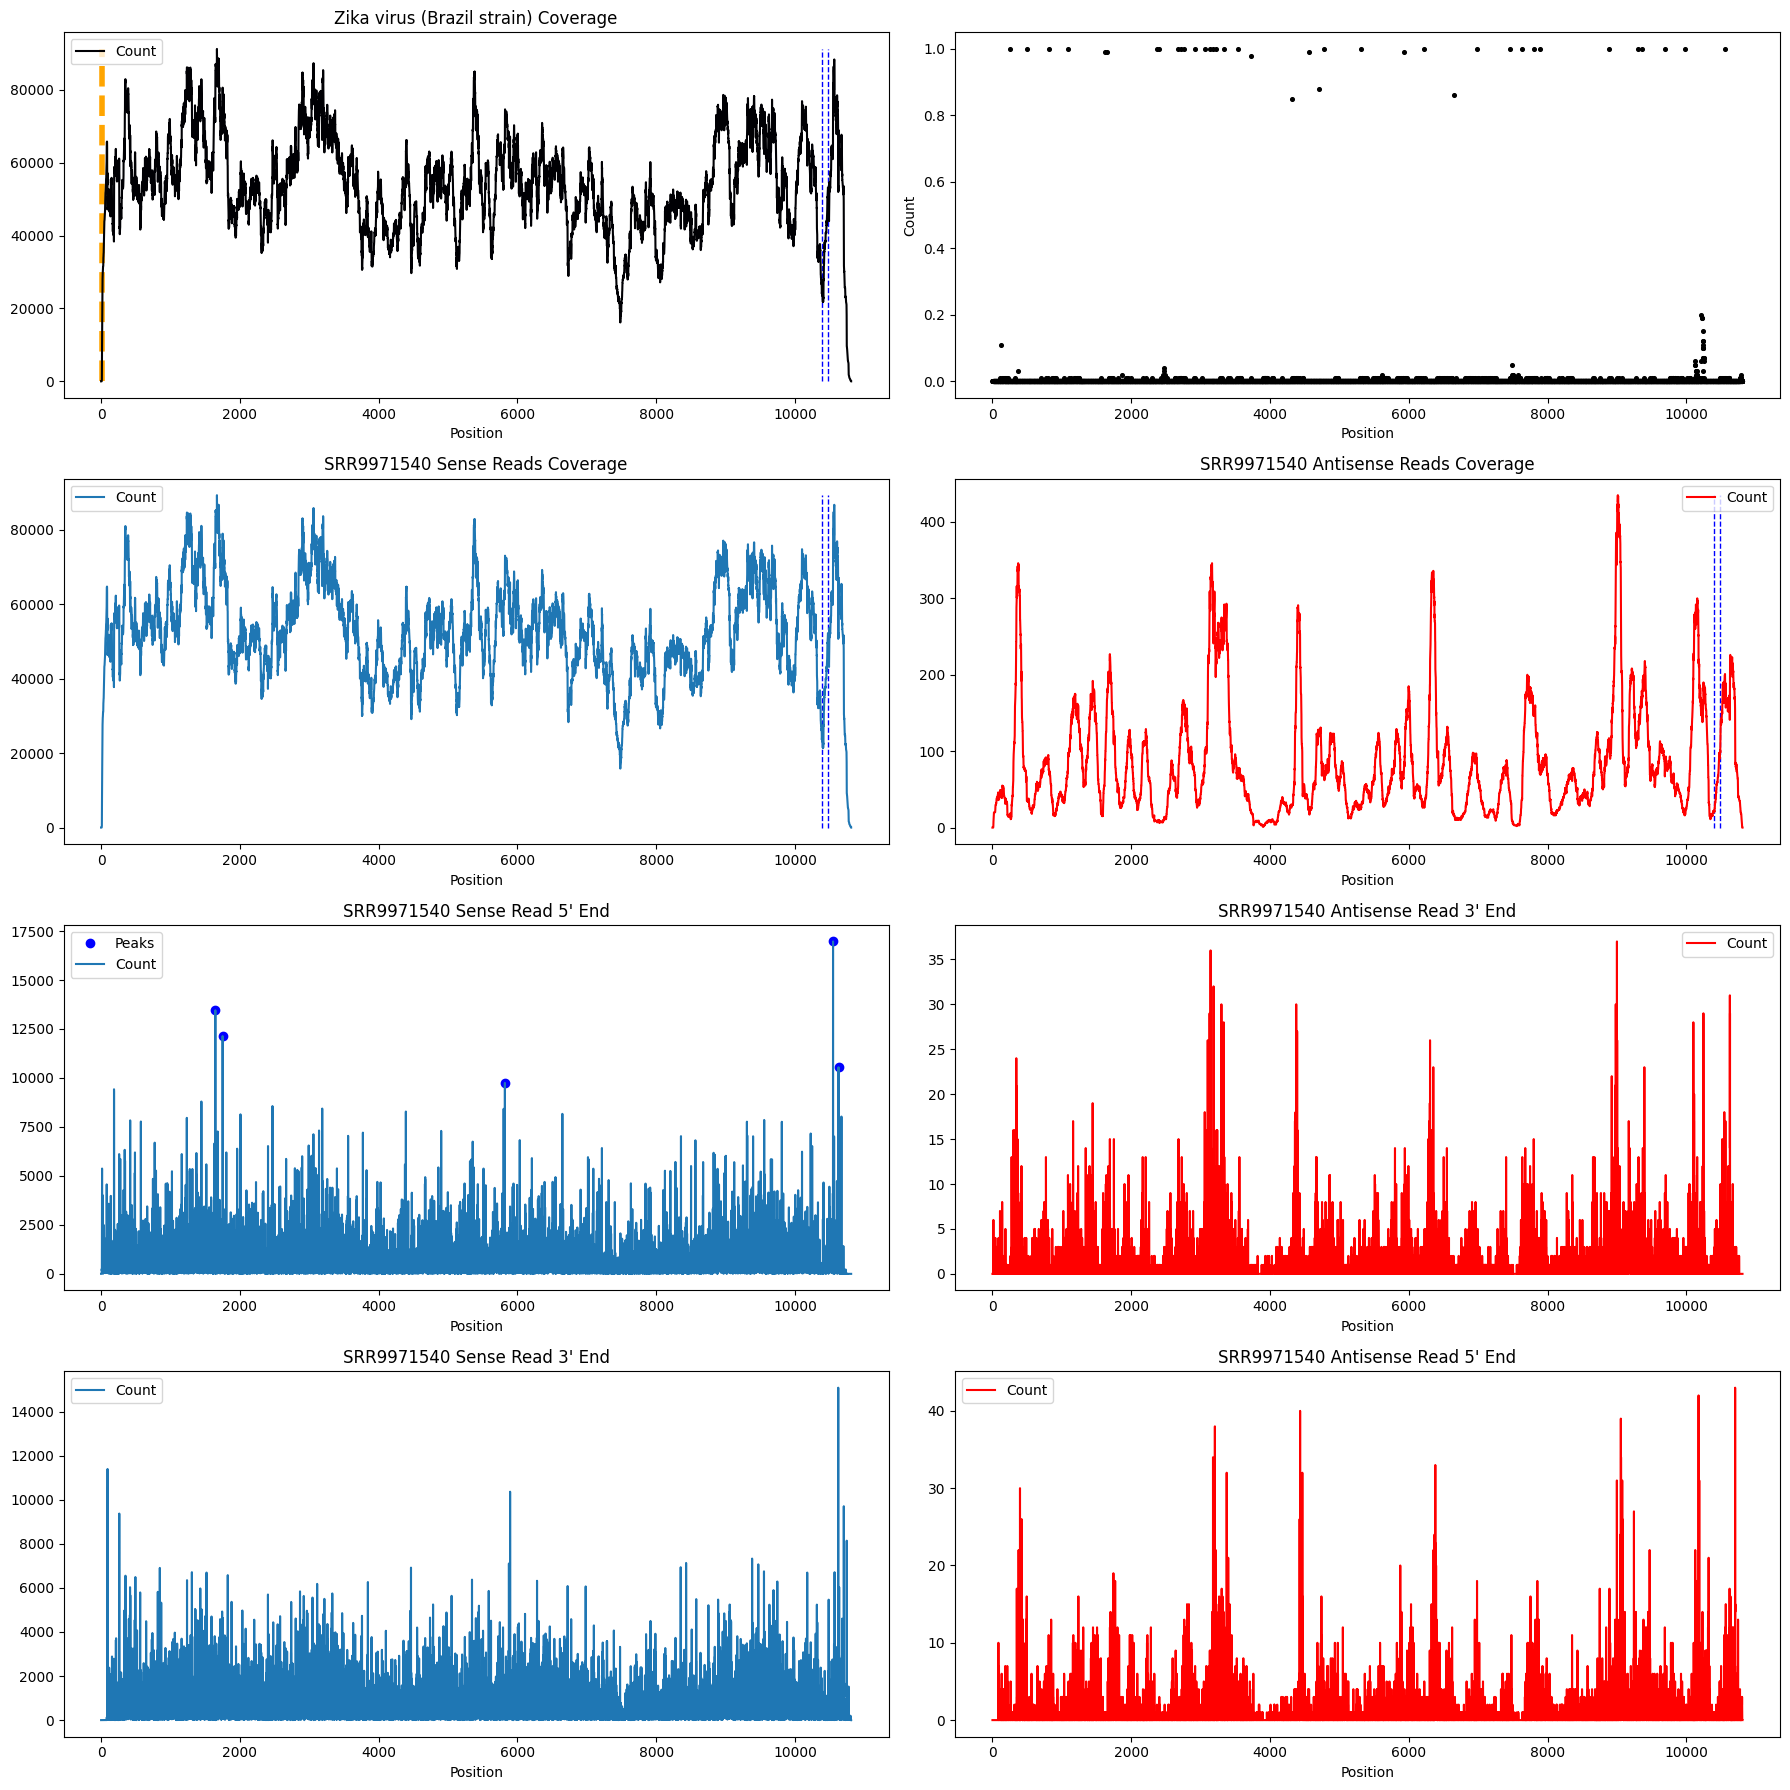

In [15]:
for acc in acc_list:
    
    original_depth = pd.read_csv("original_depth/" + acc + ".tsv", sep="\t", names=["Virus", "Position", "Count"])
    positive_depth = pd.read_csv("positive_depth/" + acc + ".tsv", sep="\t", names=["Virus", "Position", "Count"])
    negative_depth = pd.read_csv("negative_depth/" + acc + ".tsv", sep="\t", names=["Virus", "Position", "Count"])
    positive_start = pd.read_csv("positive_start/" + acc + ".tsv", sep="\t", names=["Position", "Count"])
    negative_start = pd.read_csv("negative_start/" + acc + ".tsv", sep="\t", names=["Position", "Count"])
    positive_end = pd.read_csv("positive_end/" + acc + ".tsv", sep="\t", names=["Position", "Count"])
    negative_end = pd.read_csv("negative_end/" + acc + ".tsv", sep="\t", names=["Position", "Count"])
    mismatch = pd.read_csv("mismatches/" + acc + ".tsv", sep="\t", names=["Position", "Count"])

    #5' start peak detection
    positive_start2 = pd.read_csv("positive_start/" + acc + ".tsv", sep="\t", names=["Position", "Count"])
    positive_start2 = positive_start2.sort_values(by=['Count'],ascending=False)
    top5peaks = positive_start2.head(5)
    top5peaks = top5peaks.to_numpy()


    #Read coverage Change Point Detection
    depth = pd.read_csv("positive_depth/" + acc + ".tsv", sep="\t", names=["Virus", "Position", "Count"])
    depth = depth.drop(columns=["Virus"])
    depth.set_index("Position", inplace=True)

    coverage = depth['Count'].values.reshape(-1,1)
    algo = rpt.Window(model="l2",width=30)
    algo.fit(coverage)
    result = algo.predict(n_bkps=1)
    
    # Create a list of the dataframes for easy iteration
    dataframes = [original_depth, mismatch,positive_depth, negative_depth, positive_start, negative_start, positive_end, negative_end]
    titles = [reference_virus[acc] + " Coverage","Percent Reads with a Mismatch vs "+reference_virus[acc]+" Position",
              acc + " Sense Reads Coverage",acc + " Antisense Reads Coverage",
              acc + " Sense Read 5\' End",acc + " Antisense Read 3\' End",
              acc + " Sense Read 3\' End", acc + " Antisense Read 5\' End"]
    
    colours = ["magma","black",None, "autumn",None,"autumn",None, "autumn"]
    
    
    
    # Create subplots: 4 rows and 2 columns, but only using the first slot for a single graph
    fig = plt.figure()
    axs = []
    gs = gridspec.GridSpec(4, 2)
    axs.append(plt.subplot(gs[0, 0]))
    axs.append(plt.subplot(gs[0, 1]))
    axs.append(plt.subplot(gs[1, 0]))
    axs.append(plt.subplot(gs[1, 1]))
    axs.append(plt.subplot(gs[2, 0]))
    axs.append(plt.subplot(gs[2, 1]))
    axs.append(plt.subplot(gs[3, 0]))
    axs.append(plt.subplot(gs[3, 1]))


    # Plot each DataFrame on its corresponding subplot
    for i, df in enumerate(dataframes):
        ax = axs[i]
        if i==1:
            df.plot.scatter("Position", "Count",ax=ax, c=colours[i], figsize=(18, 18), s=7)
        else:
                
            if i==4:
                ax.plot(top5peaks[0][0],top5peaks[0][1], "ob")
                ax.plot(top5peaks[1][0],top5peaks[1][1], "ob")
                ax.plot(top5peaks[2][0],top5peaks[2][1], "ob")
                ax.plot(top5peaks[3][0],top5peaks[3][1], "ob")
                ax.plot(top5peaks[4][0],top5peaks[4][1], "ob")
                ax.legend(['Peaks'])
            if i==0:
                ax.vlines(result[0],ymin=0,ymax=df['Count'].max(), color='orange', linestyles='dashed', linewidth = 4)
    
            if i==0 or i==2 or i==3:
                # predicted 5′ end of RNA “stem-loop 2” (SL2)
                ax.vlines(10478,ymin=0,ymax=df['Count'].max(), color='blue', linestyles='dashed', linewidth = 1)
    
                # predicted 5′ end of RNA “stem-loop 1” (SL1)
                ax.vlines(10394,ymin=0,ymax=df['Count'].max(), color='blue', linestyles='dashed', linewidth = 1)
                
    
                #position from Andrew's paper: https://www.biorxiv.org/content/10.1101/112904v1.full
                
            df.plot("Position", "Count", ax=ax, colormap=colours[i], figsize=(18, 18))
            ax.set_title(titles[i])

    # axs[7].annotate("Genome Map", (0.22,0.45), fontsize=50, bbox=dict(boxstyle="round", fc="0.8"))
    
    # Adjust layout for better spacing
    plt.tight_layout()
    
    # Show the plot
    plt.show()
    fig.savefig('/mnt/Zika_subgenomic_plotting/final_plots/' + acc + '.png')